# DM - CA3 - Mohamad Taha Fakharian

In this computer assignment, we are going to explore a dataset related to diabetic patients for clinics and hospitals in America, do some preprocessing and apply two clustering methods on it. 

So let's start!

First let's import necessary libraries:



In [ ]:
# Data manipulation
import numpy as np
import pandas as pd

from scipy.stats import zscore

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# SKLearn modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
values = pd.read_csv('drive/My Drive/Uni/Term6/DM/dataset_diabetes/diabetic_data.csv')
labels = pd.read_csv('drive/My Drive/Uni/Term6/DM/dataset_diabetes/IDs_mapping.csv')

## A

In [ ]:
values.isna().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [ ]:
labels.isna().sum()

admission_type_id    2
description          5
dtype: int64

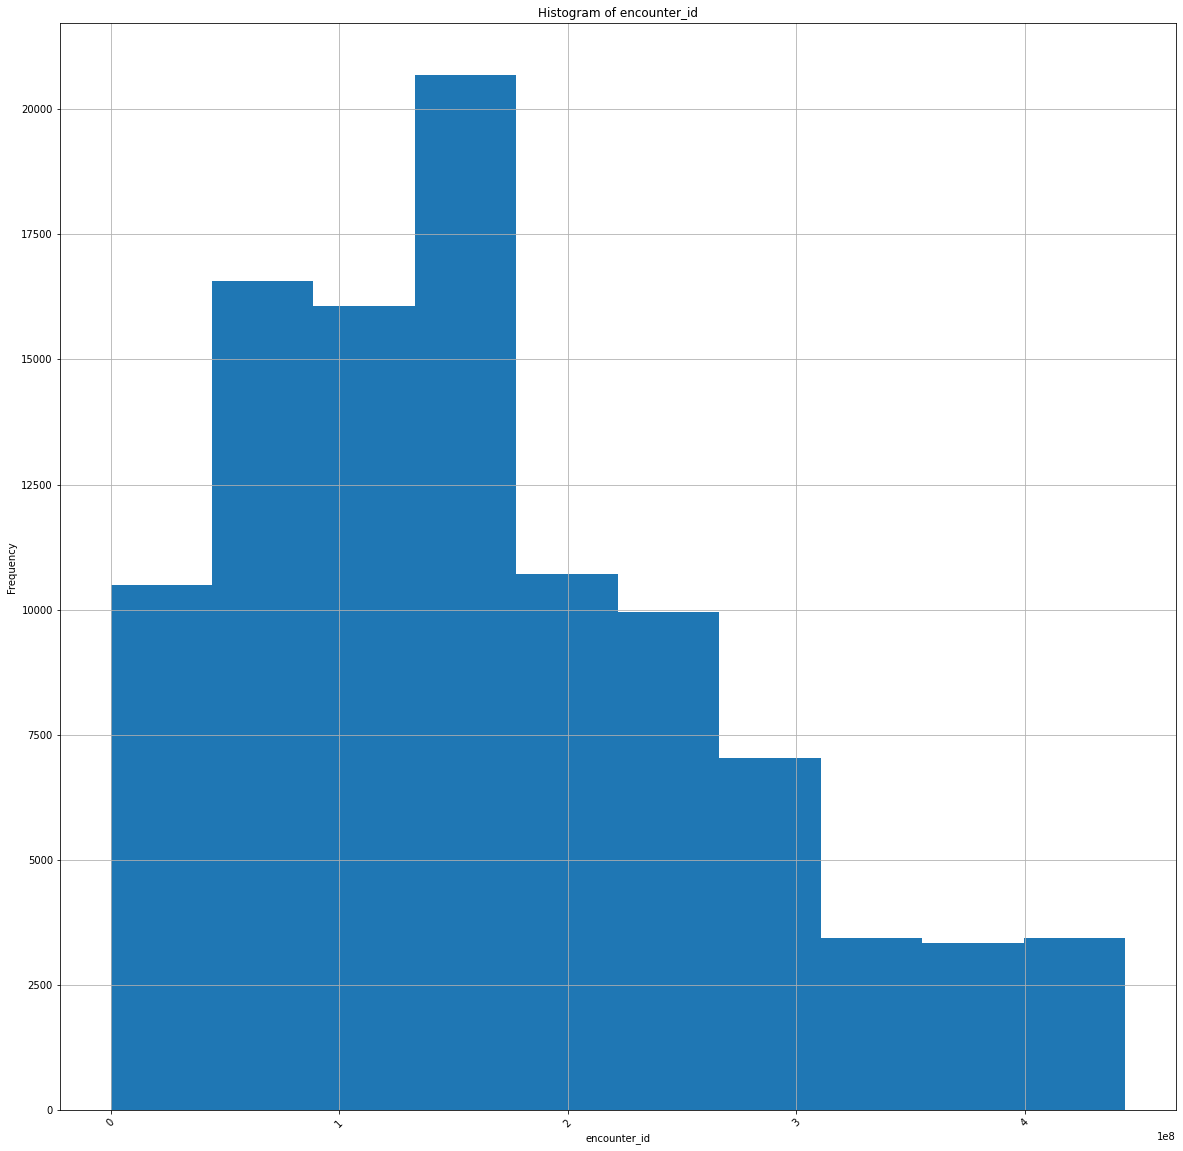

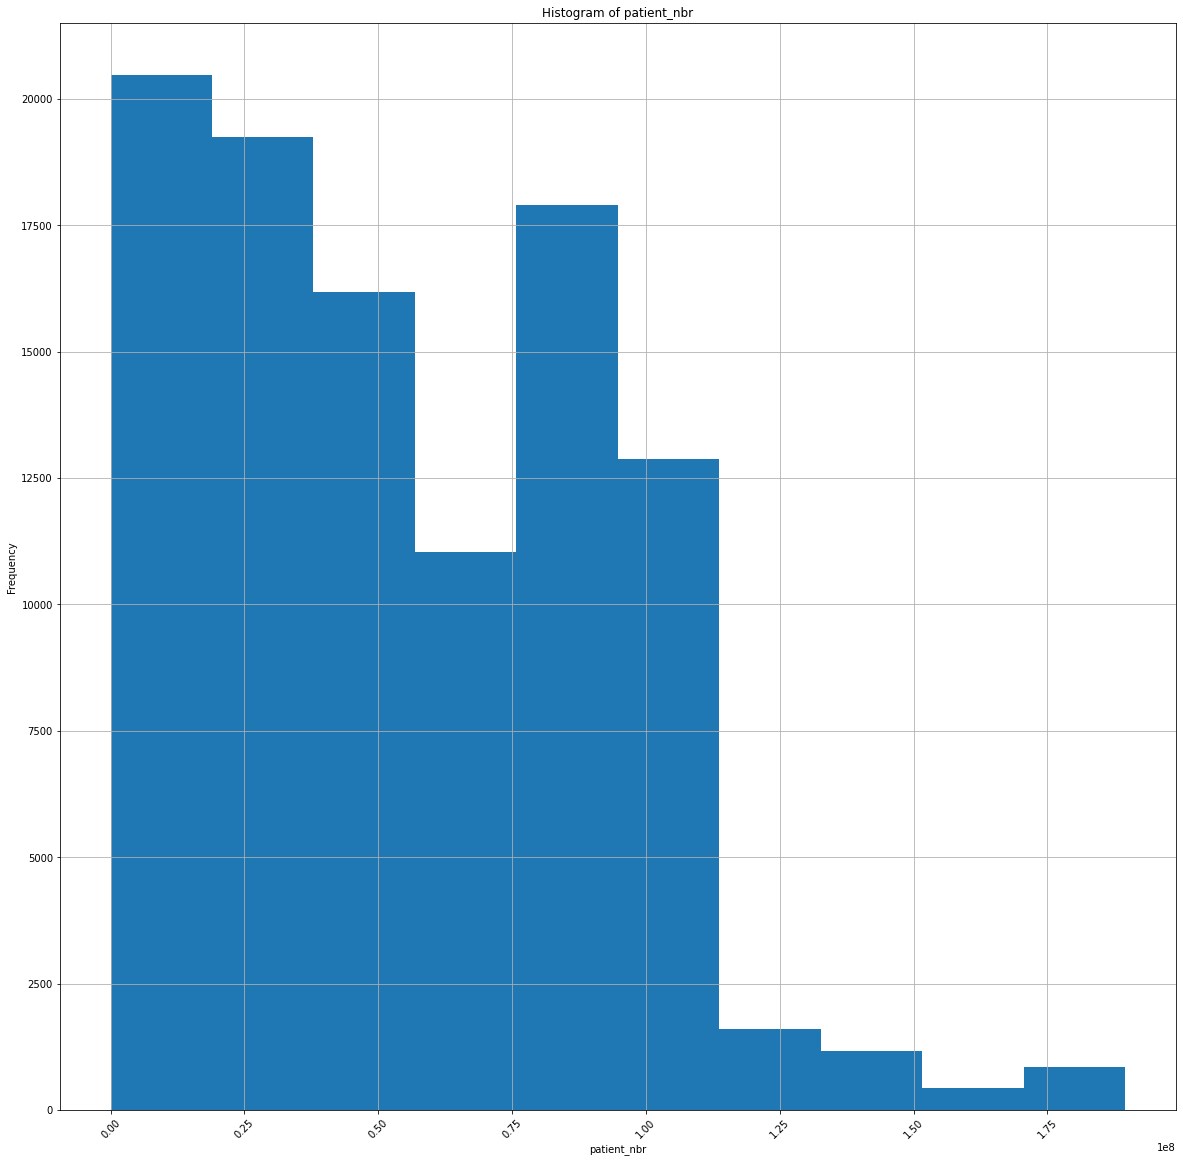

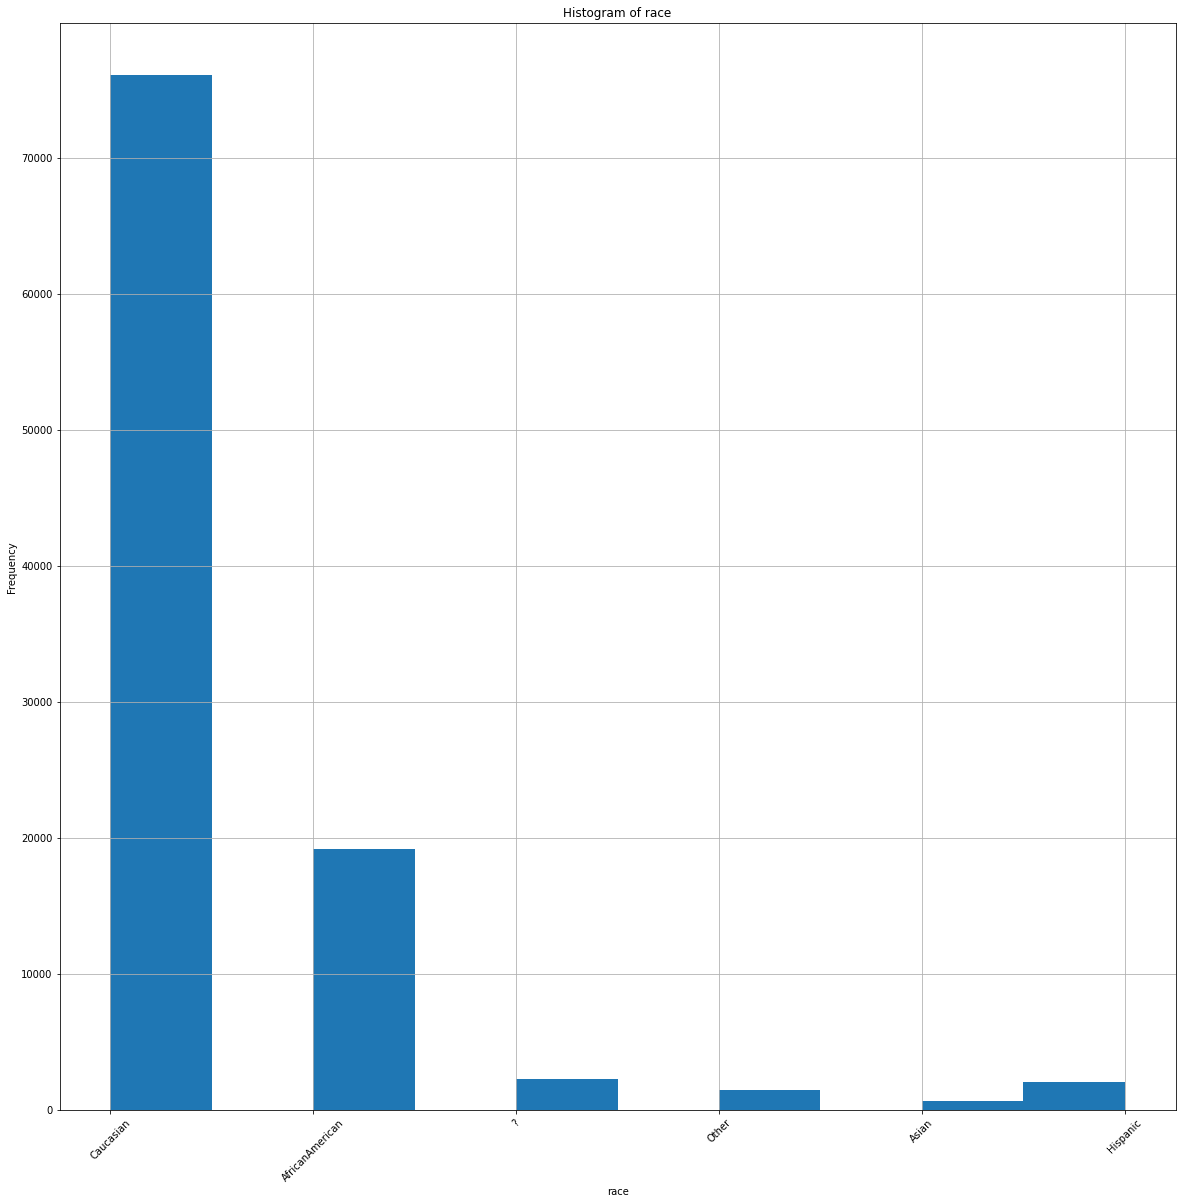

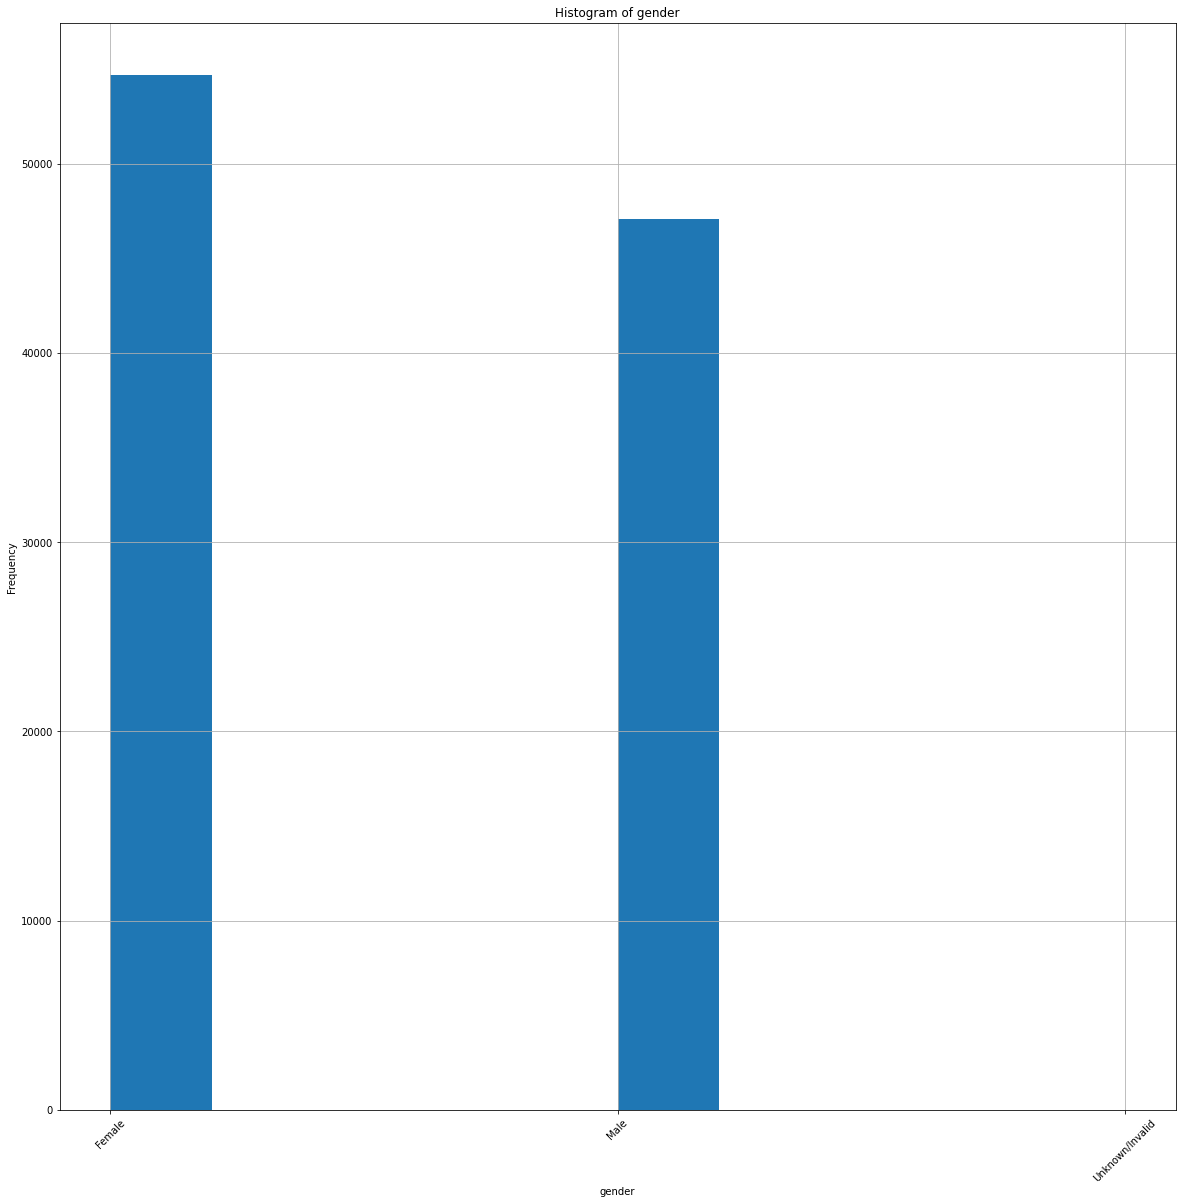

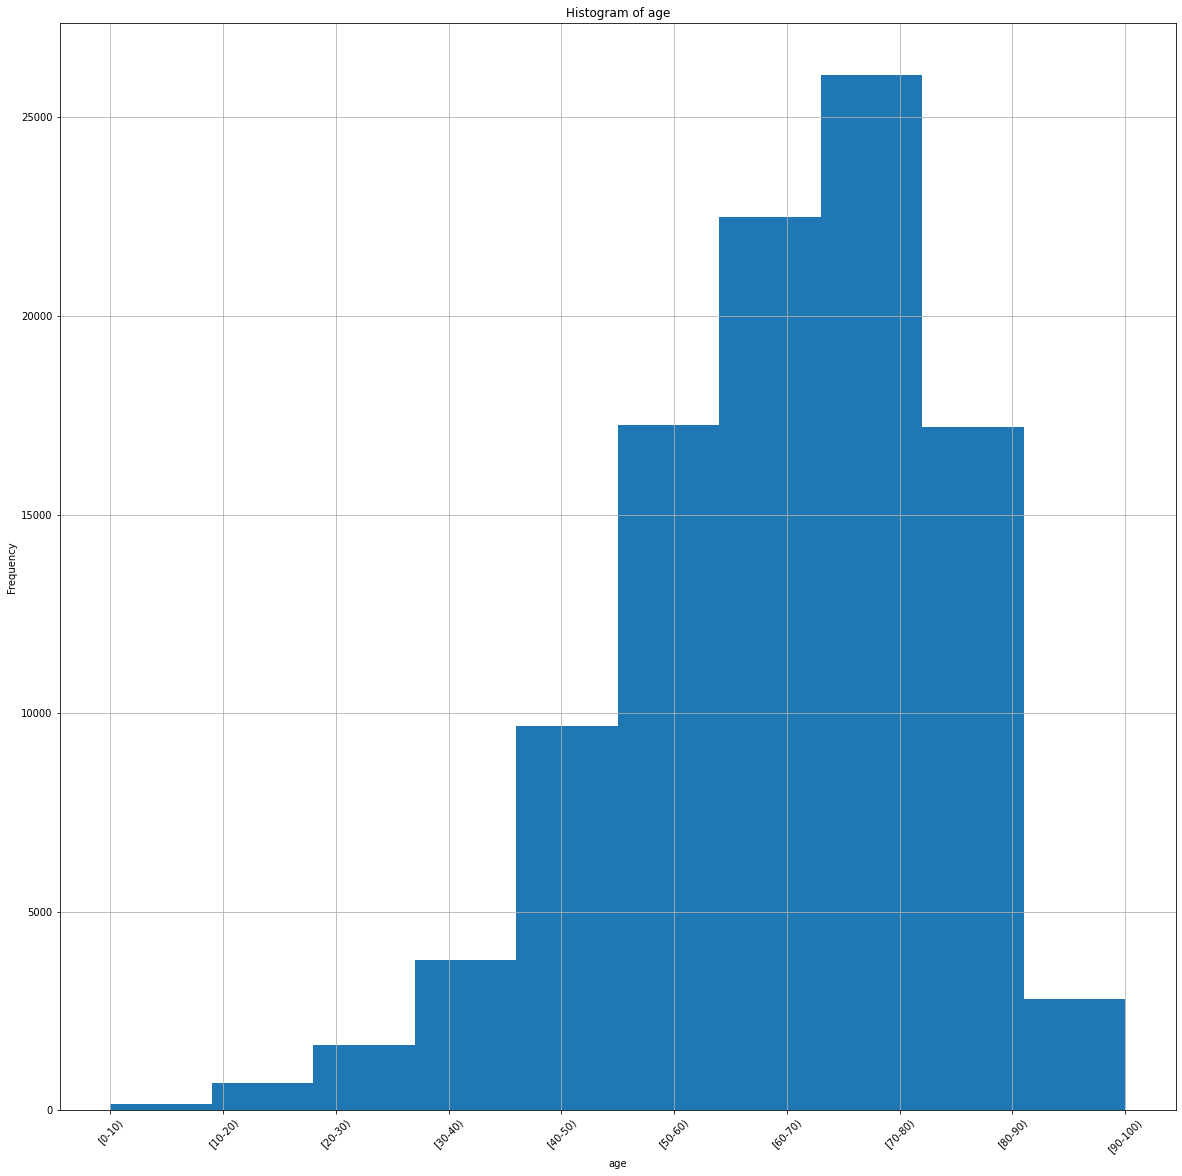

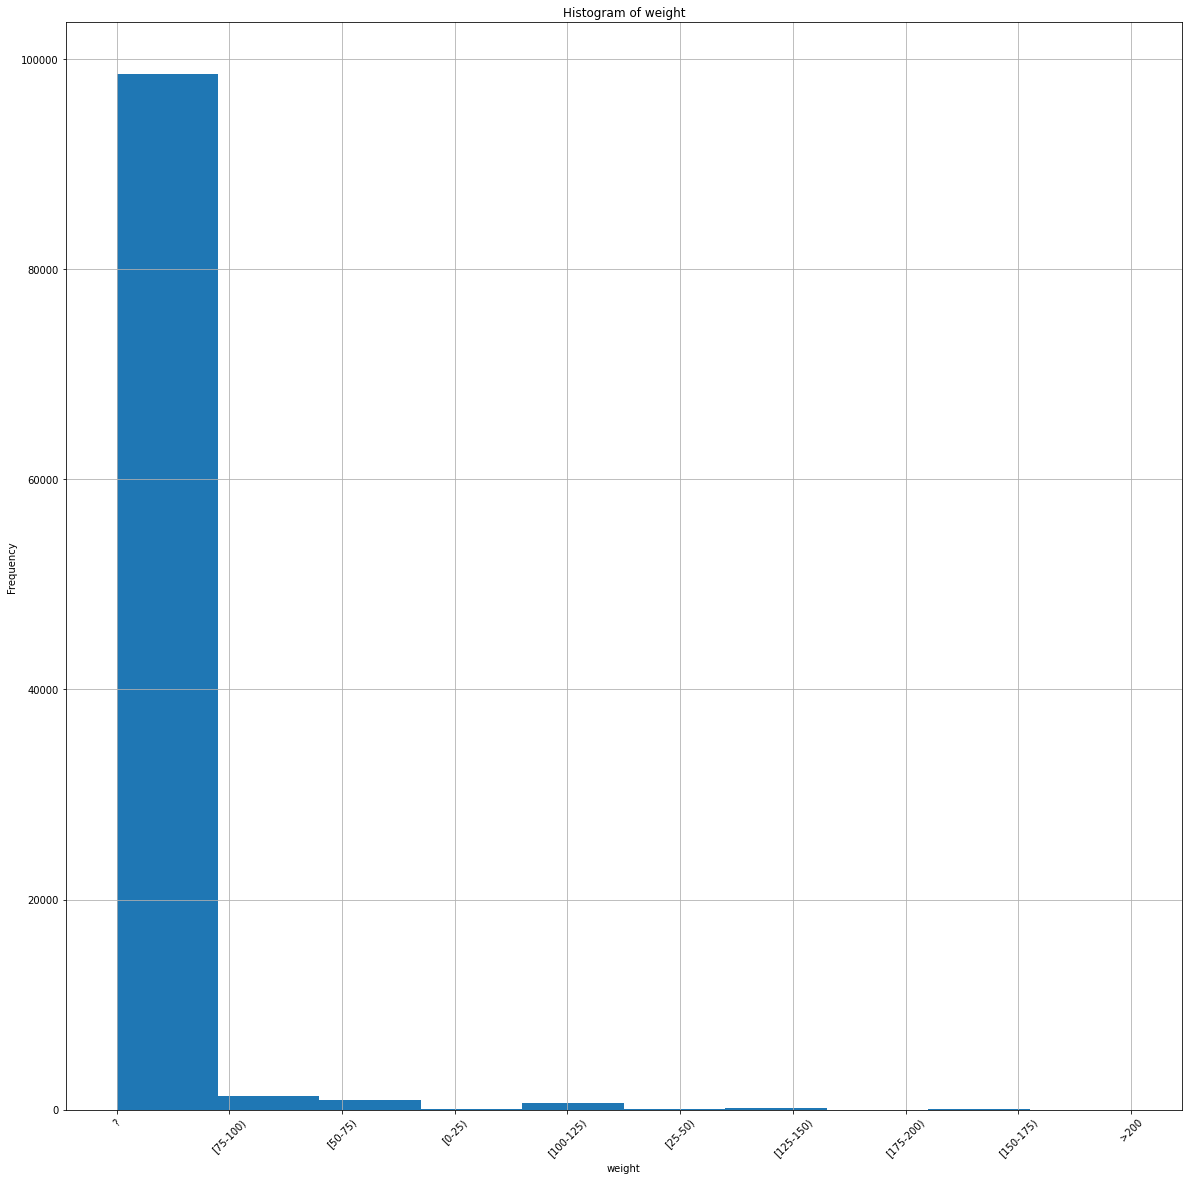

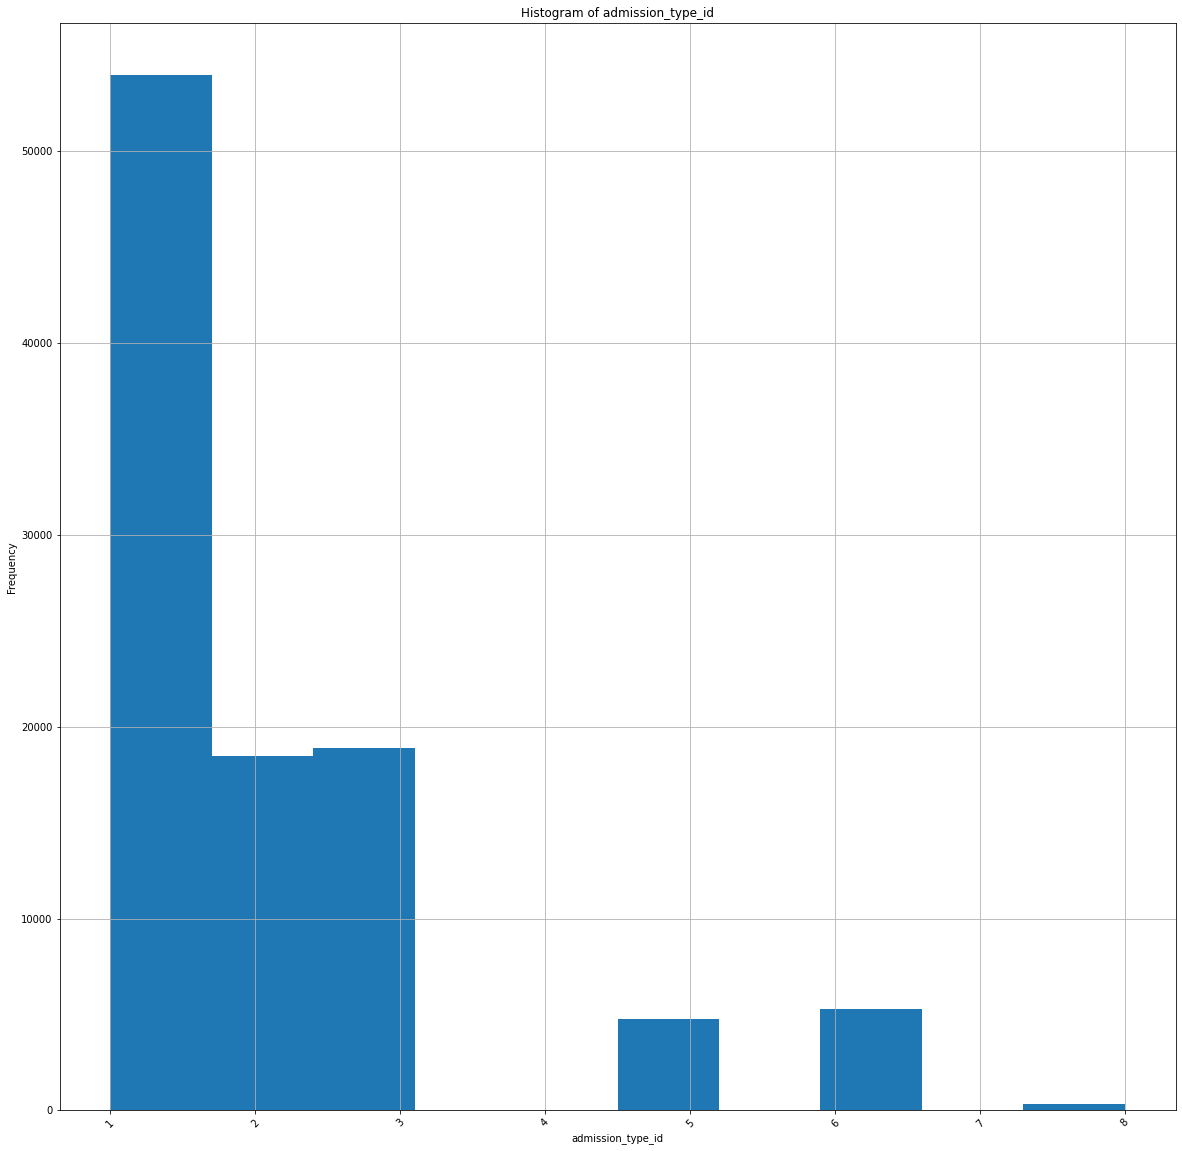

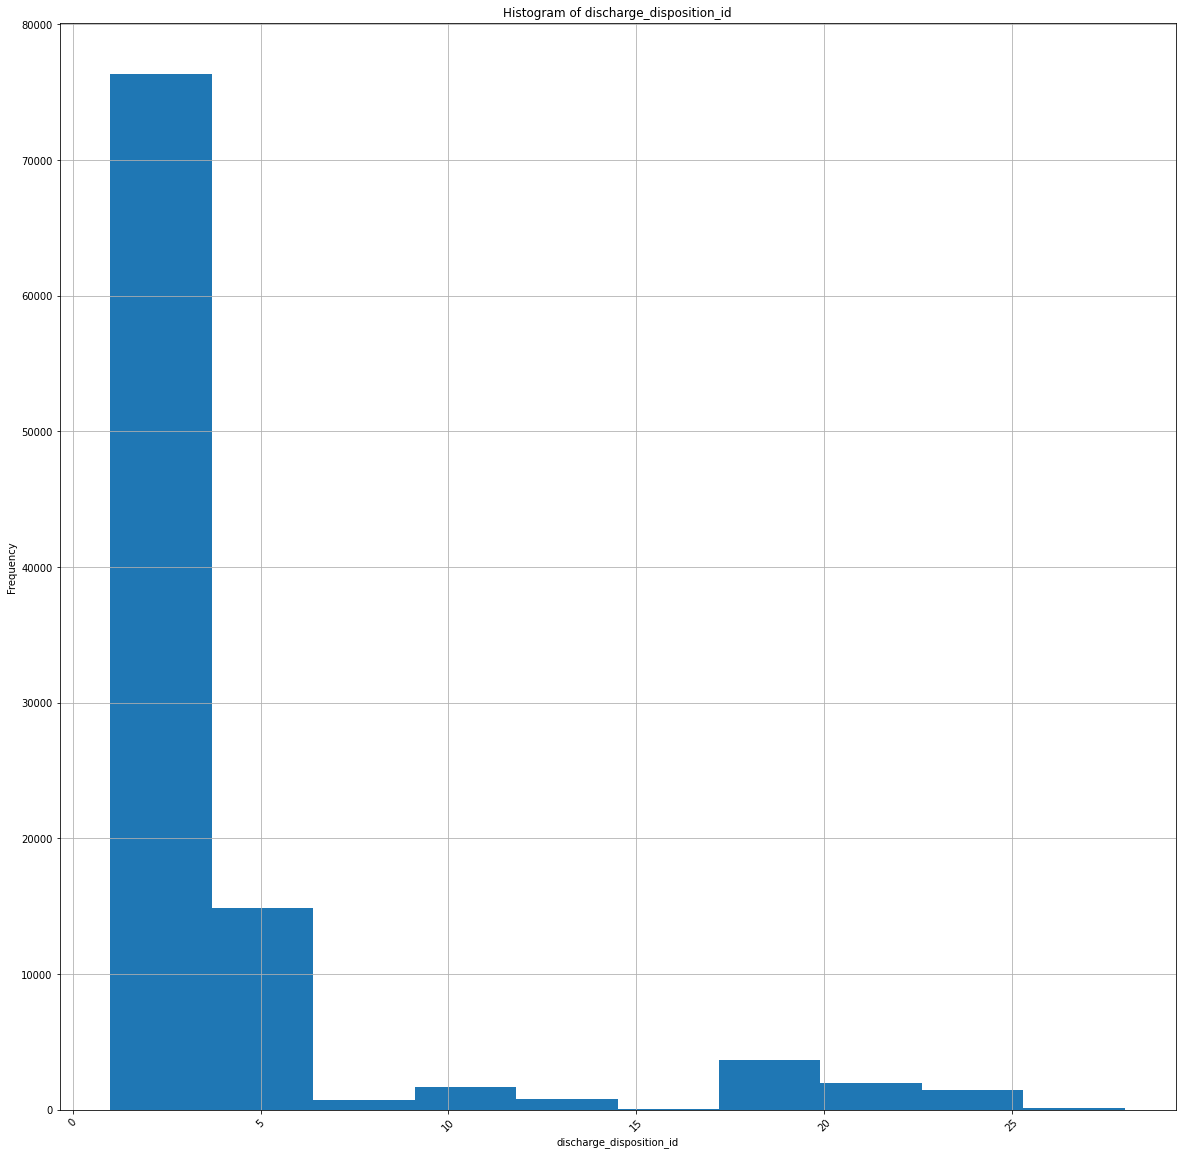

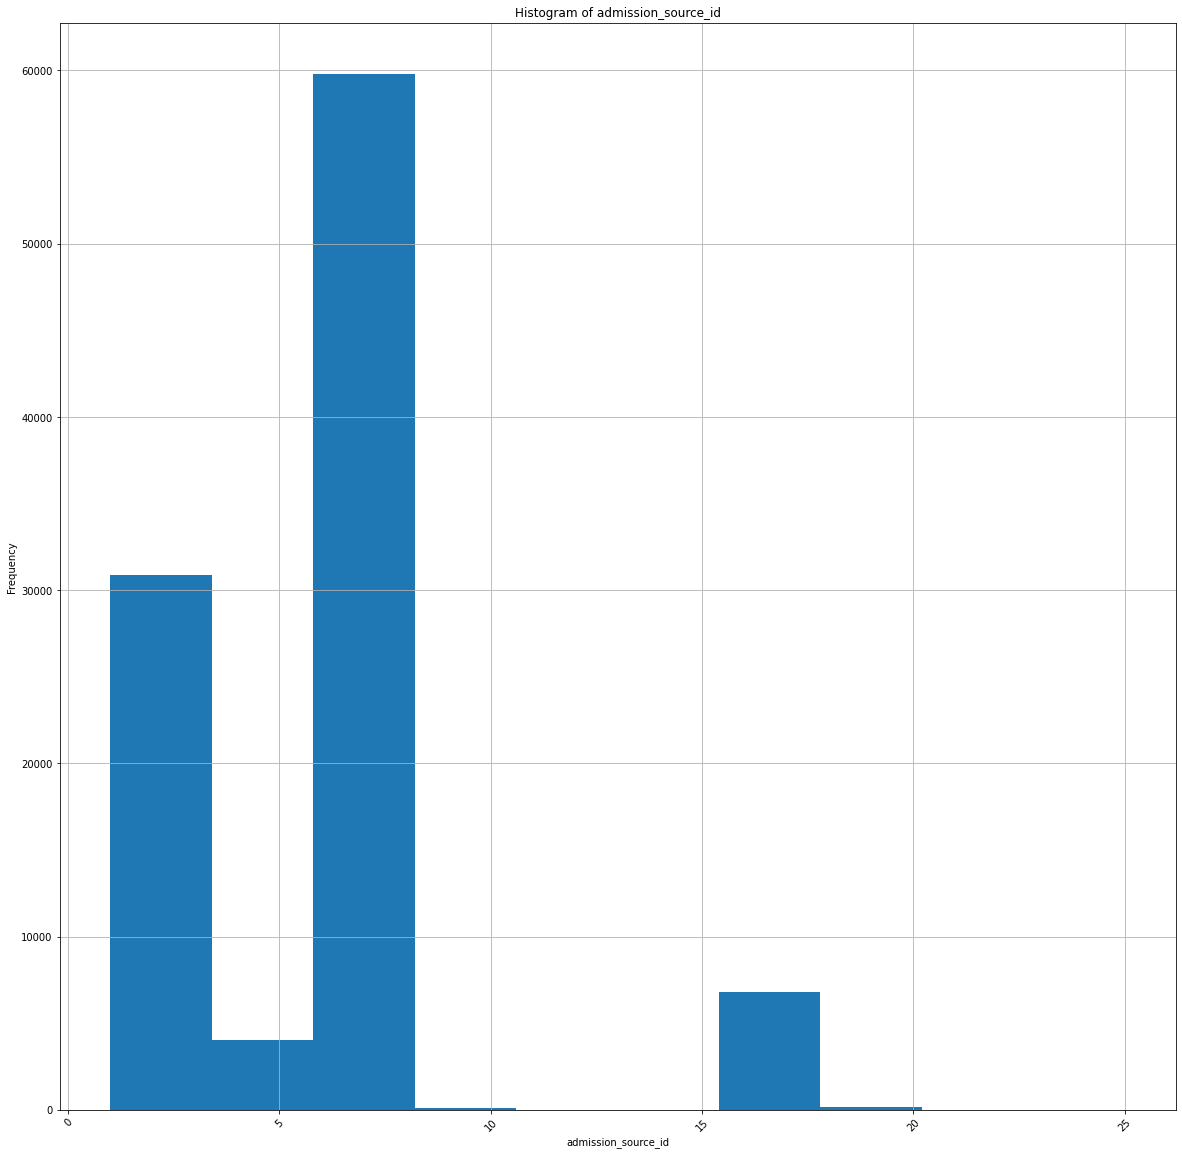

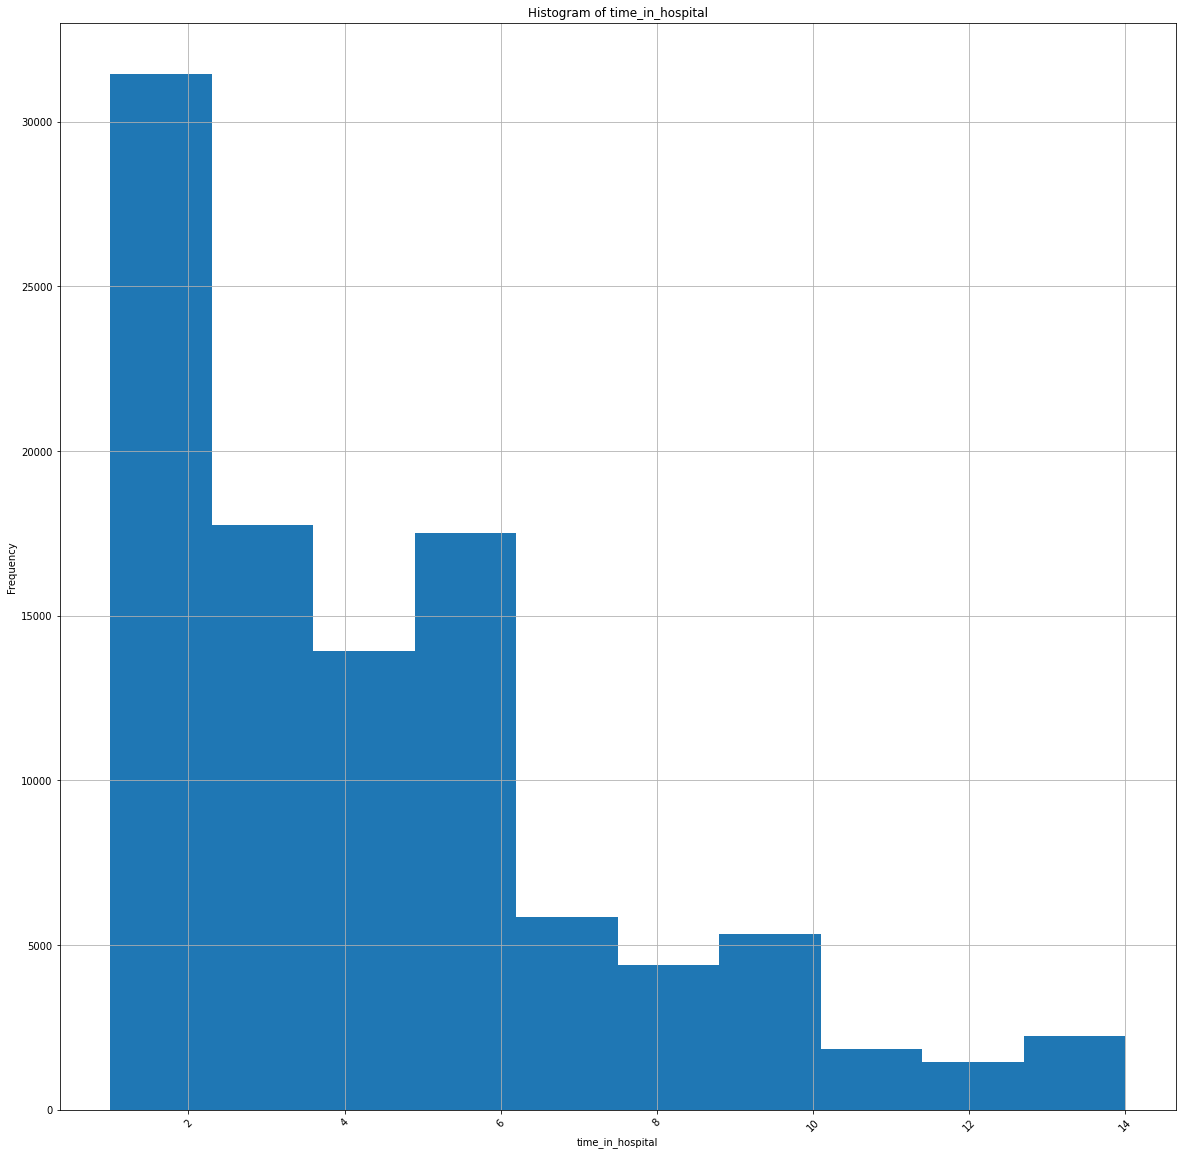

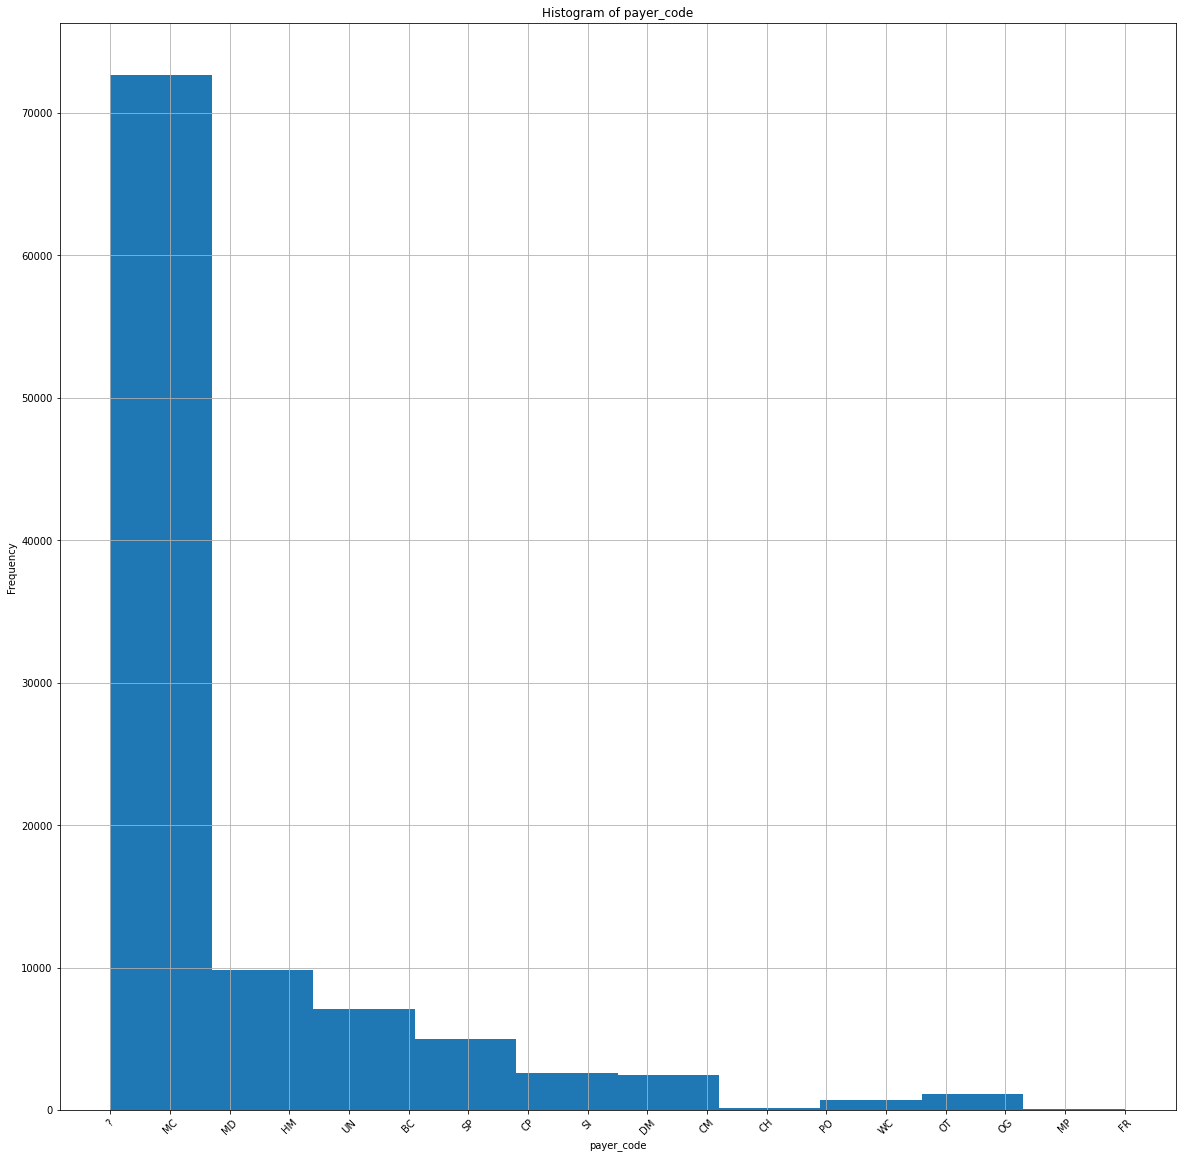

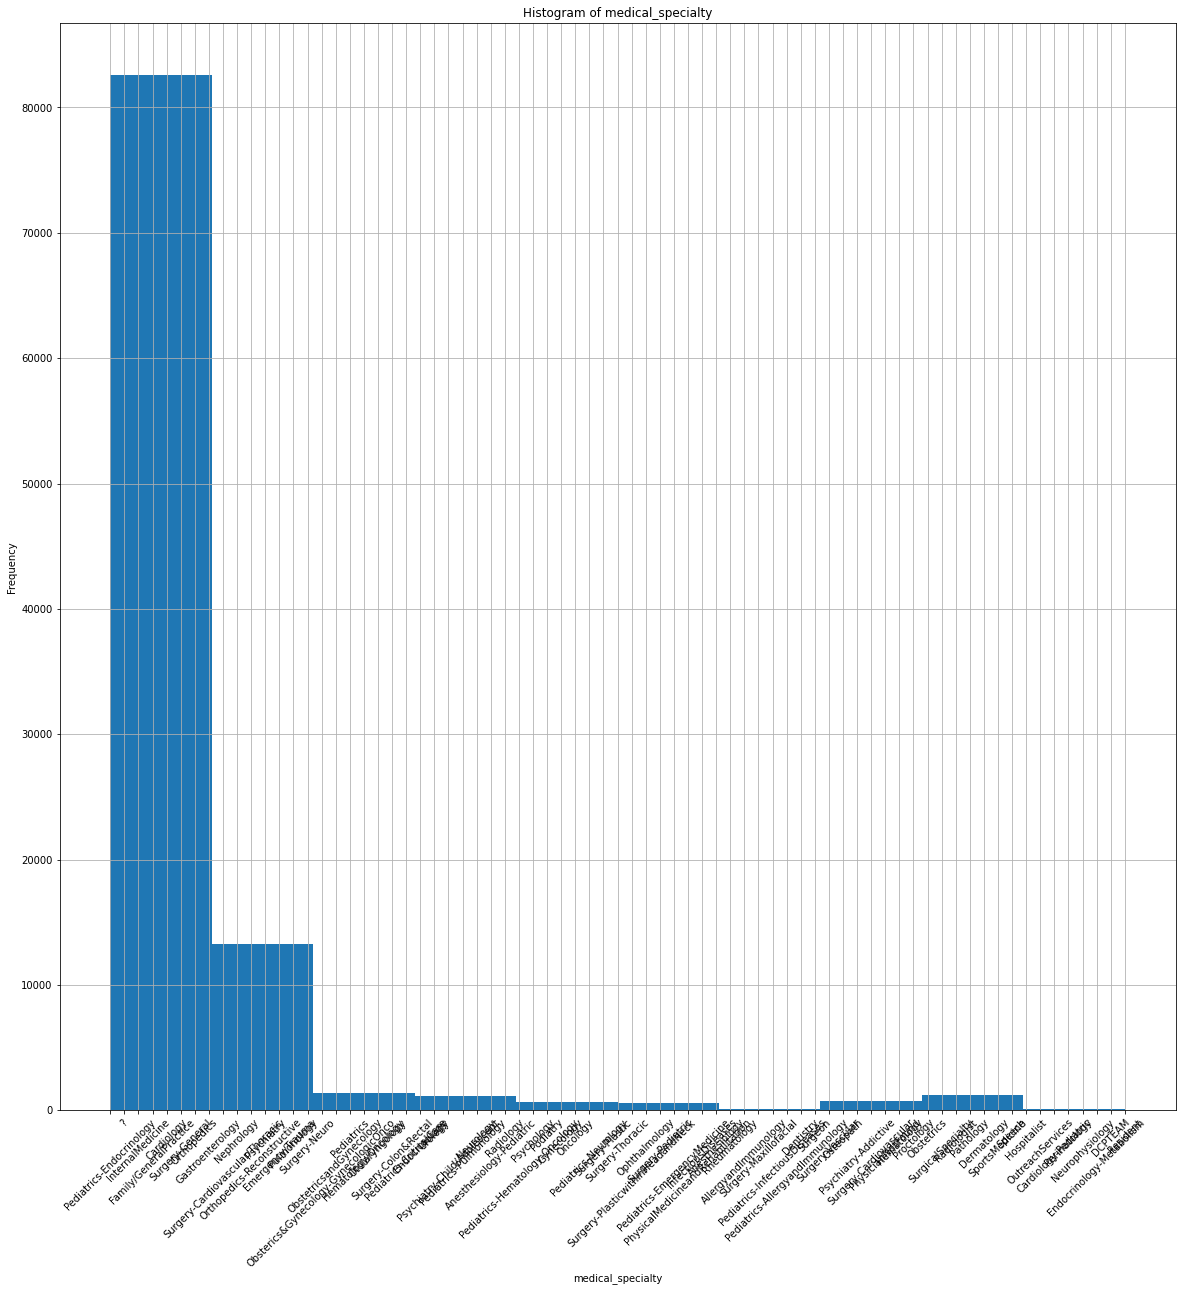

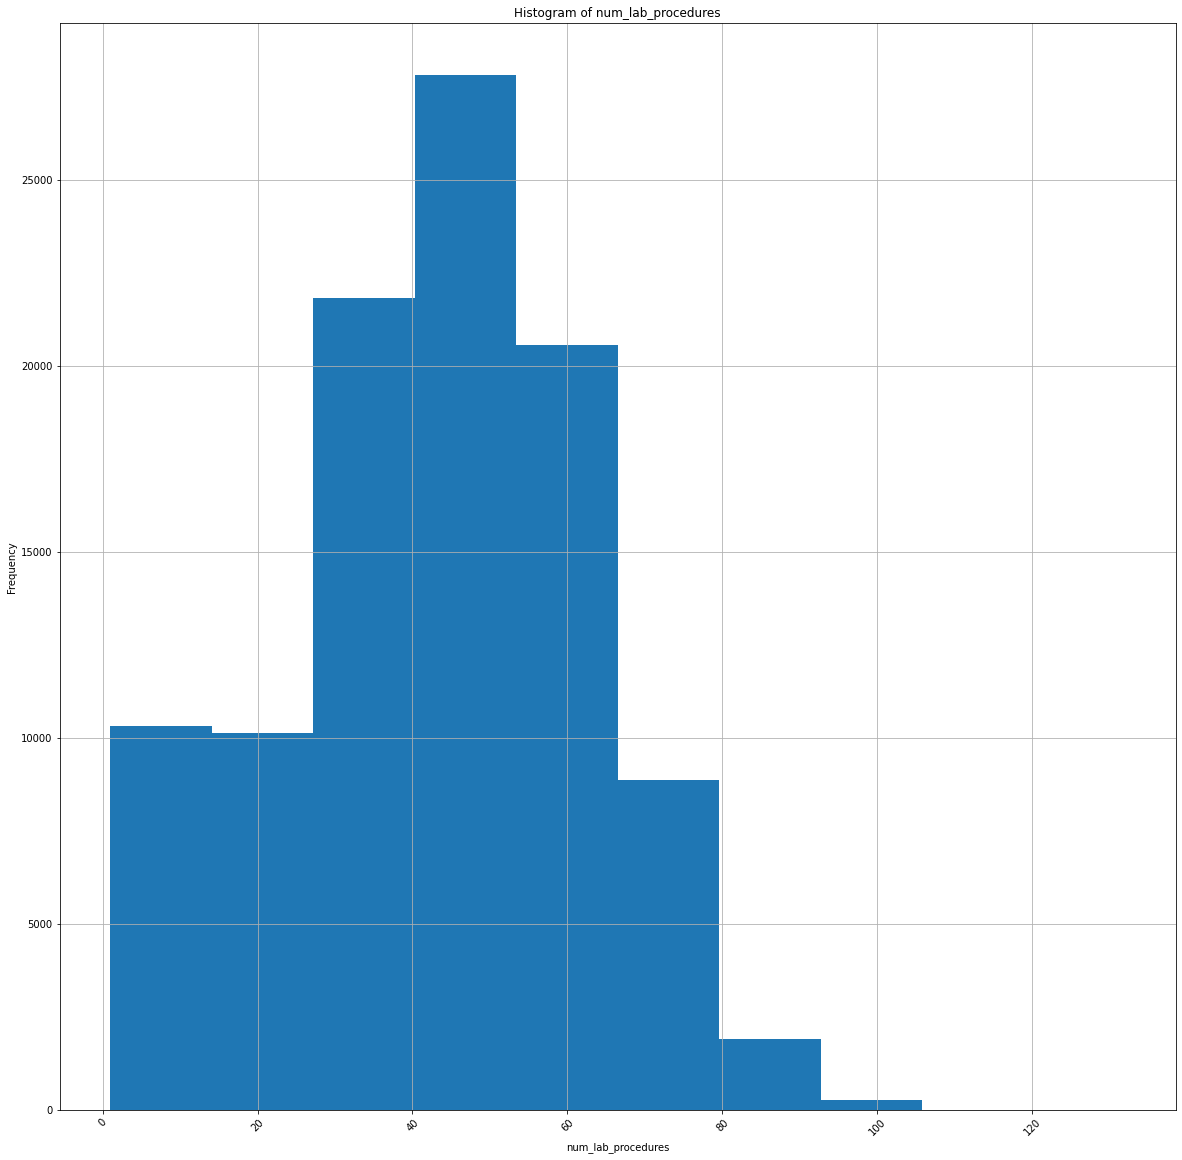

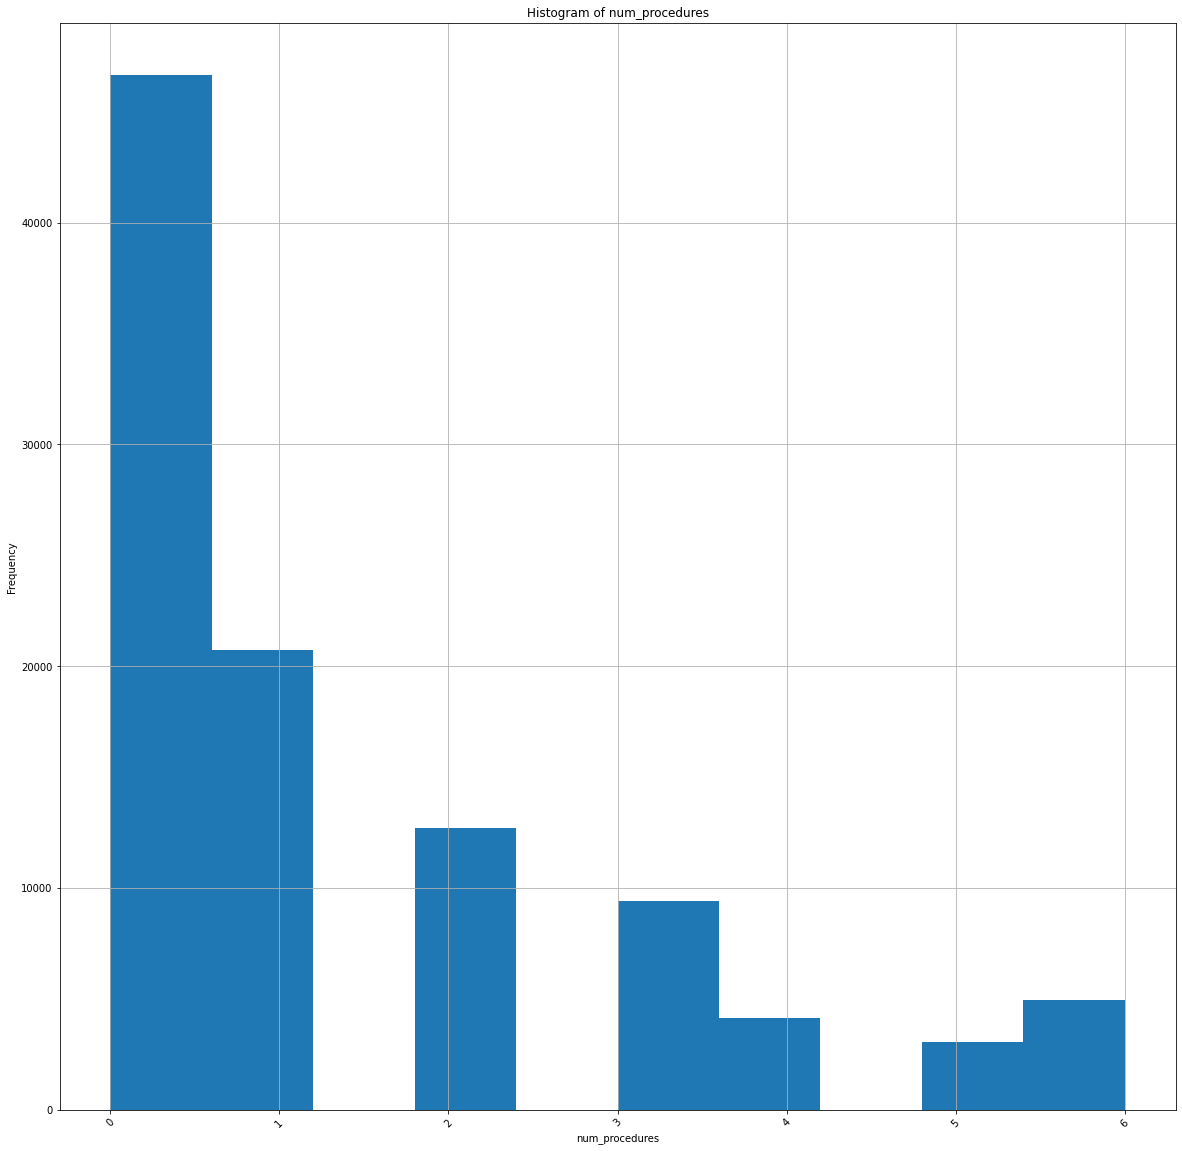

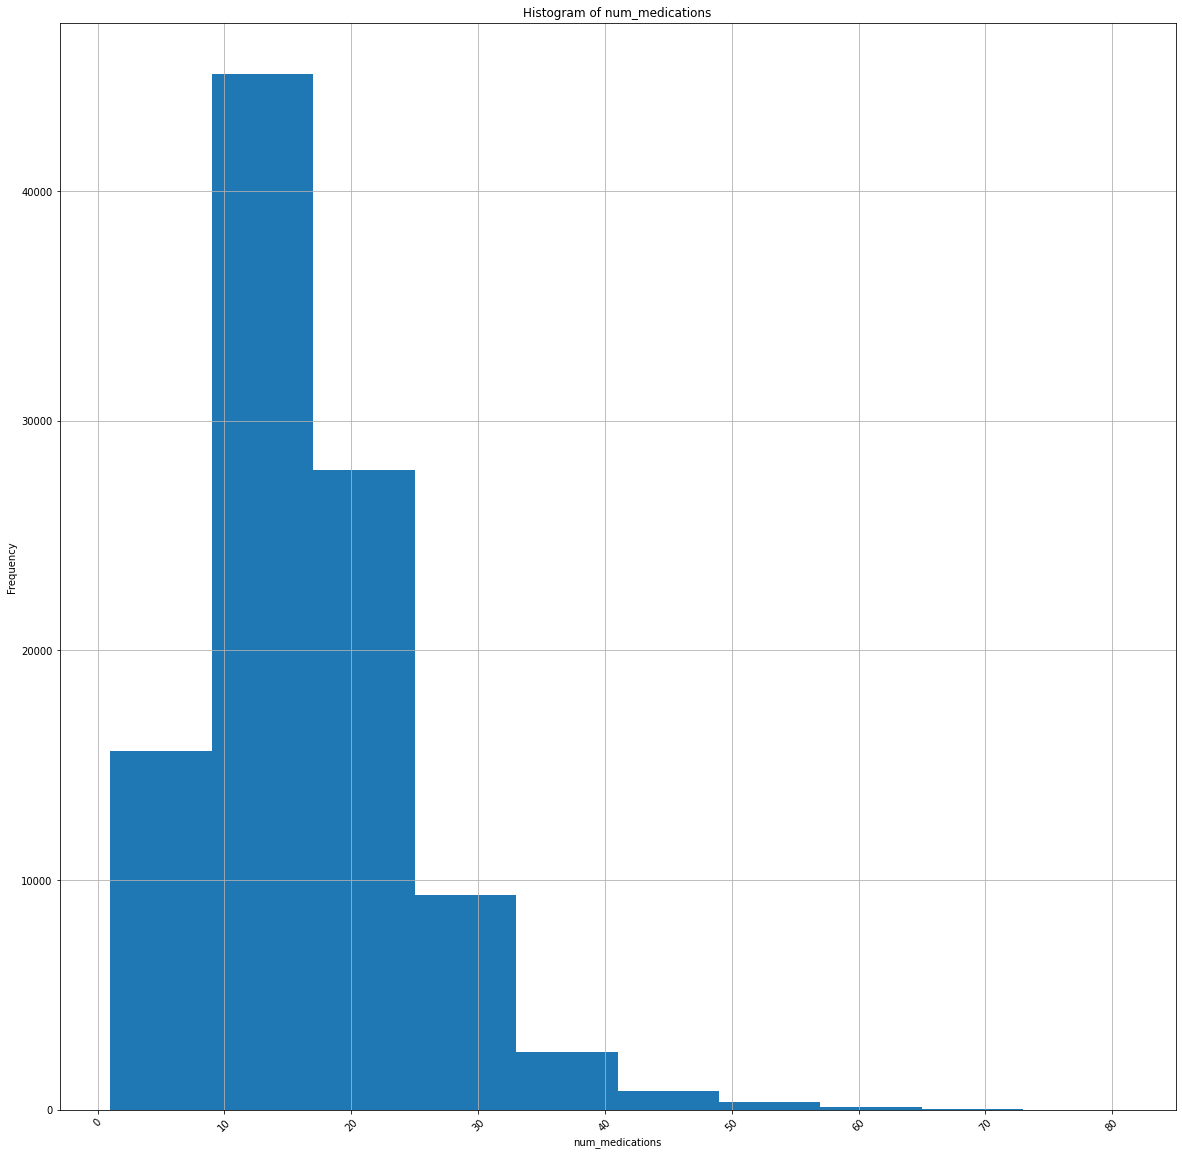

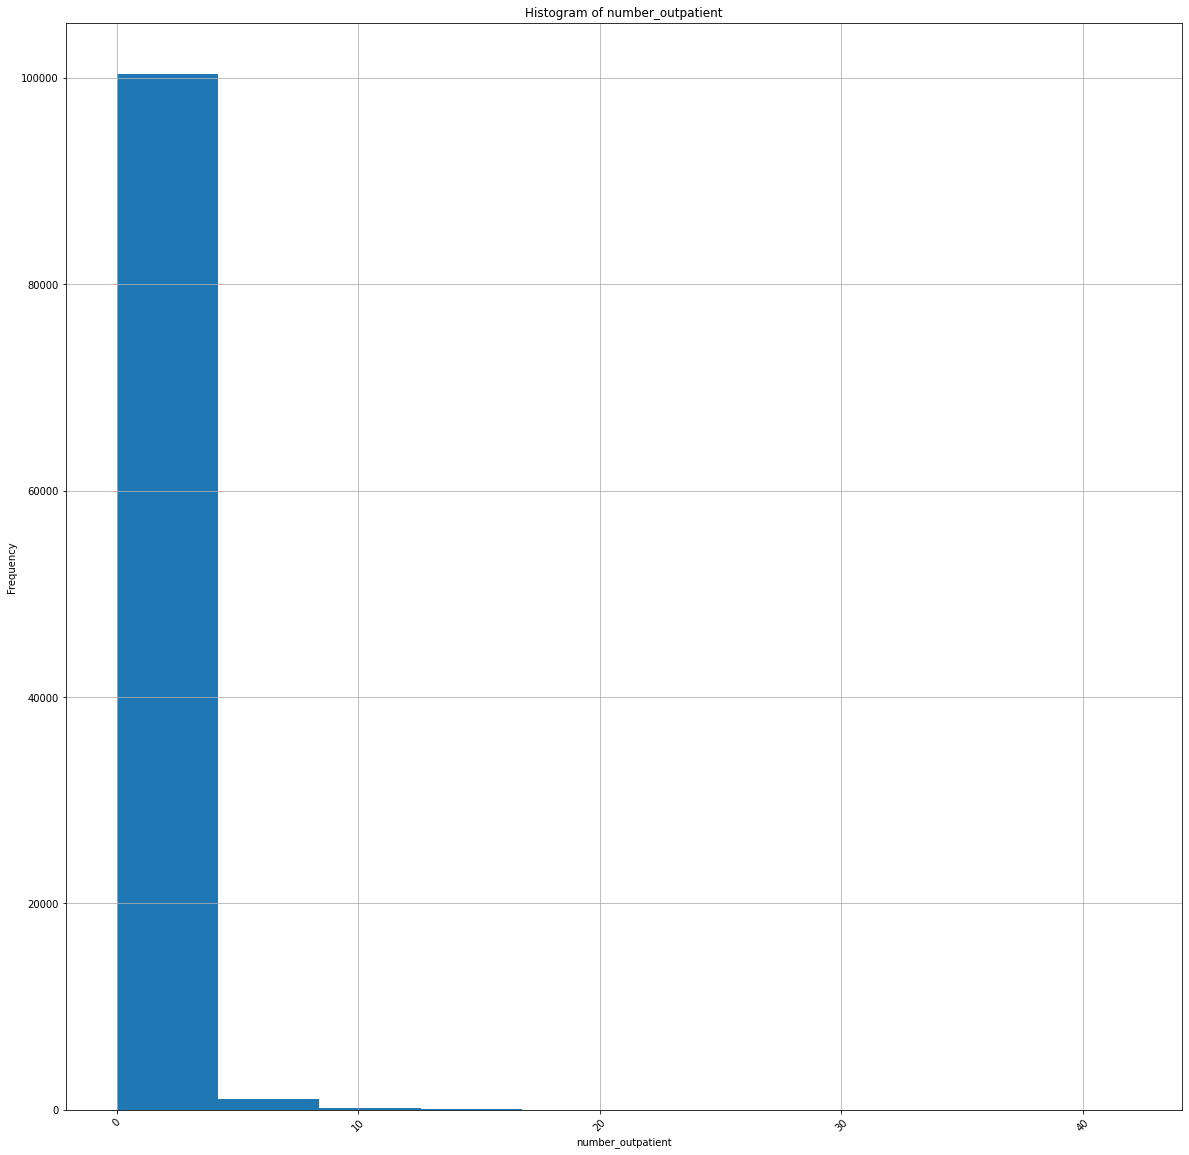

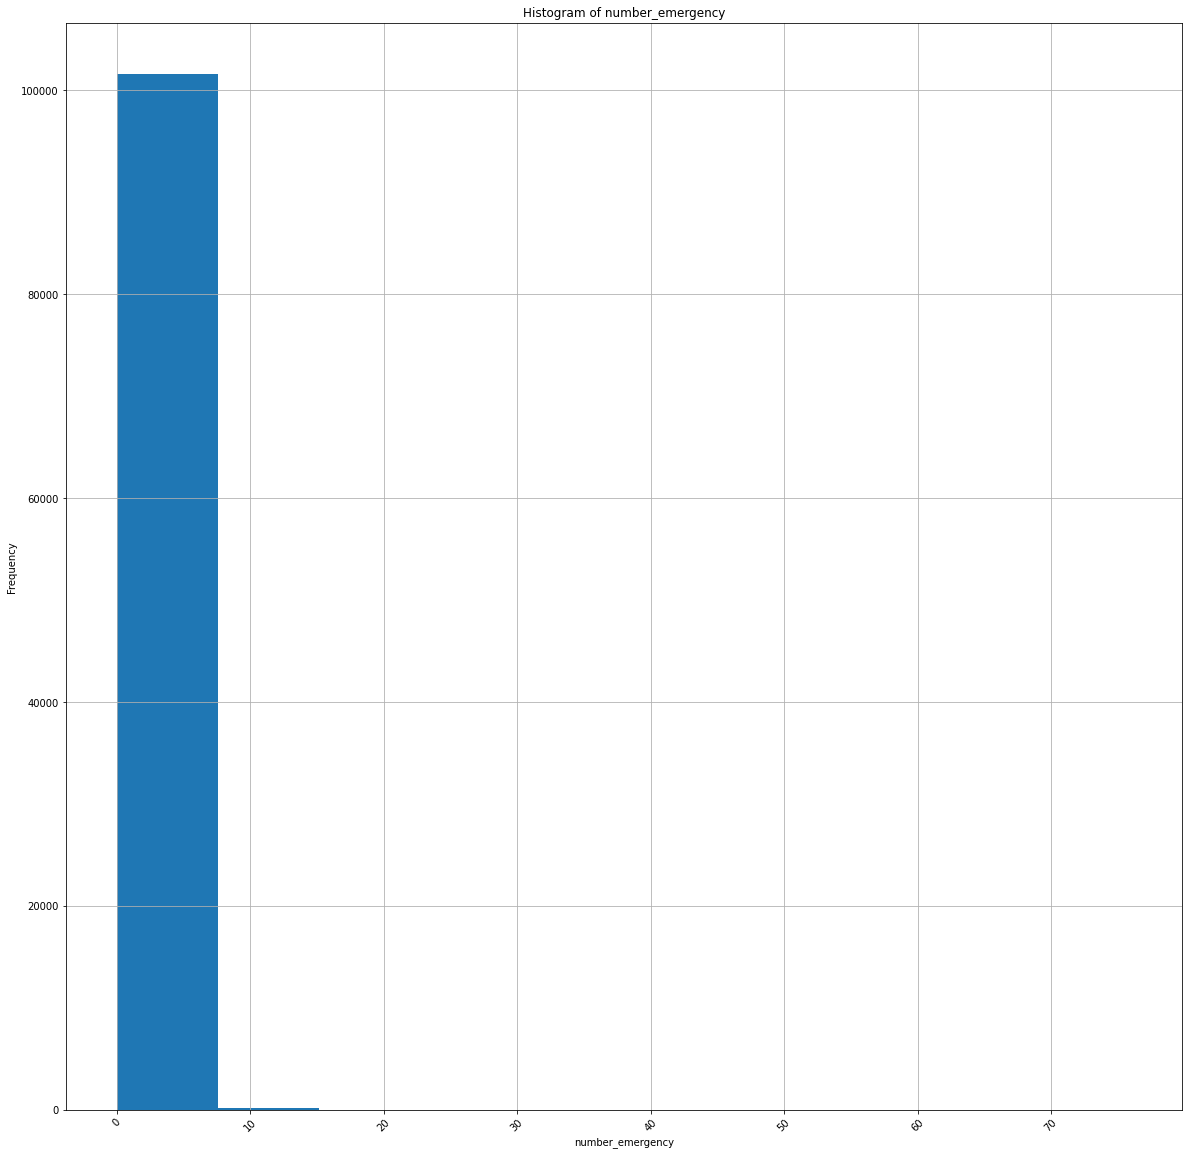

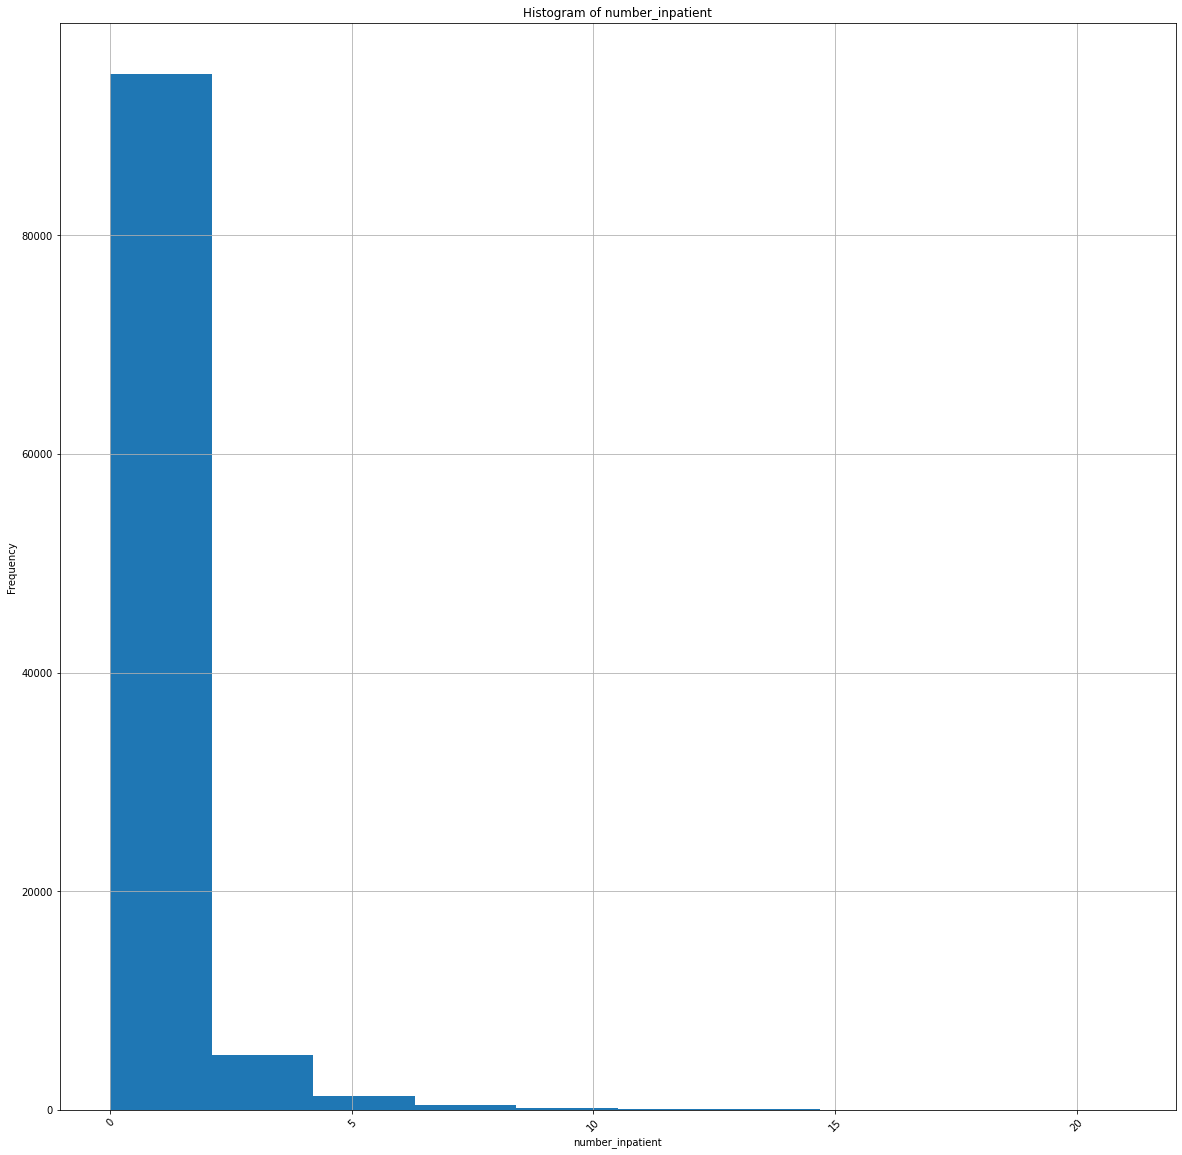

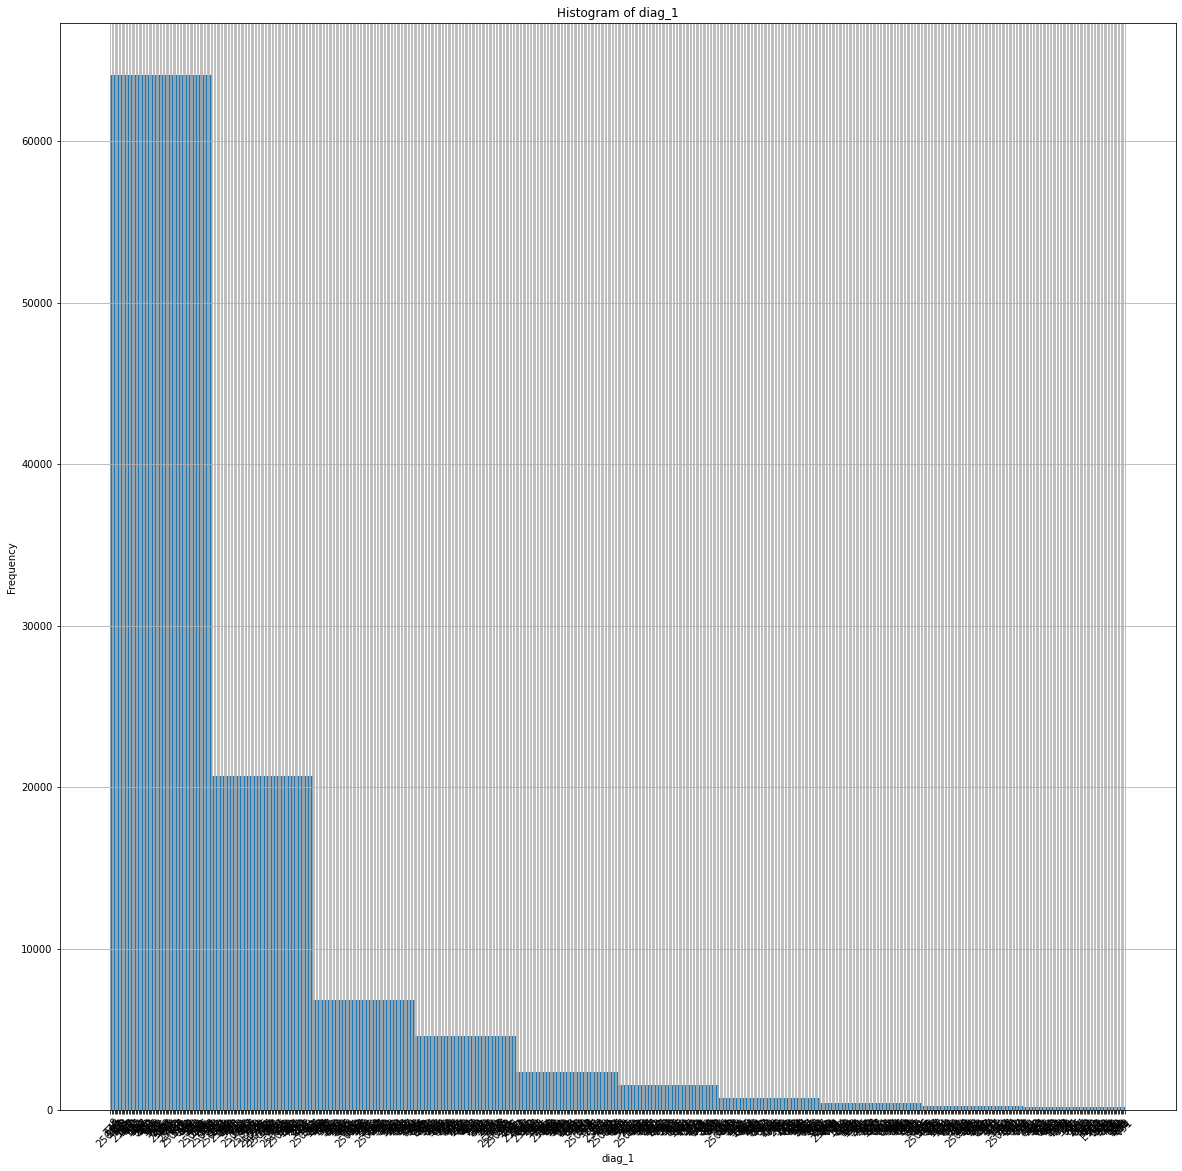

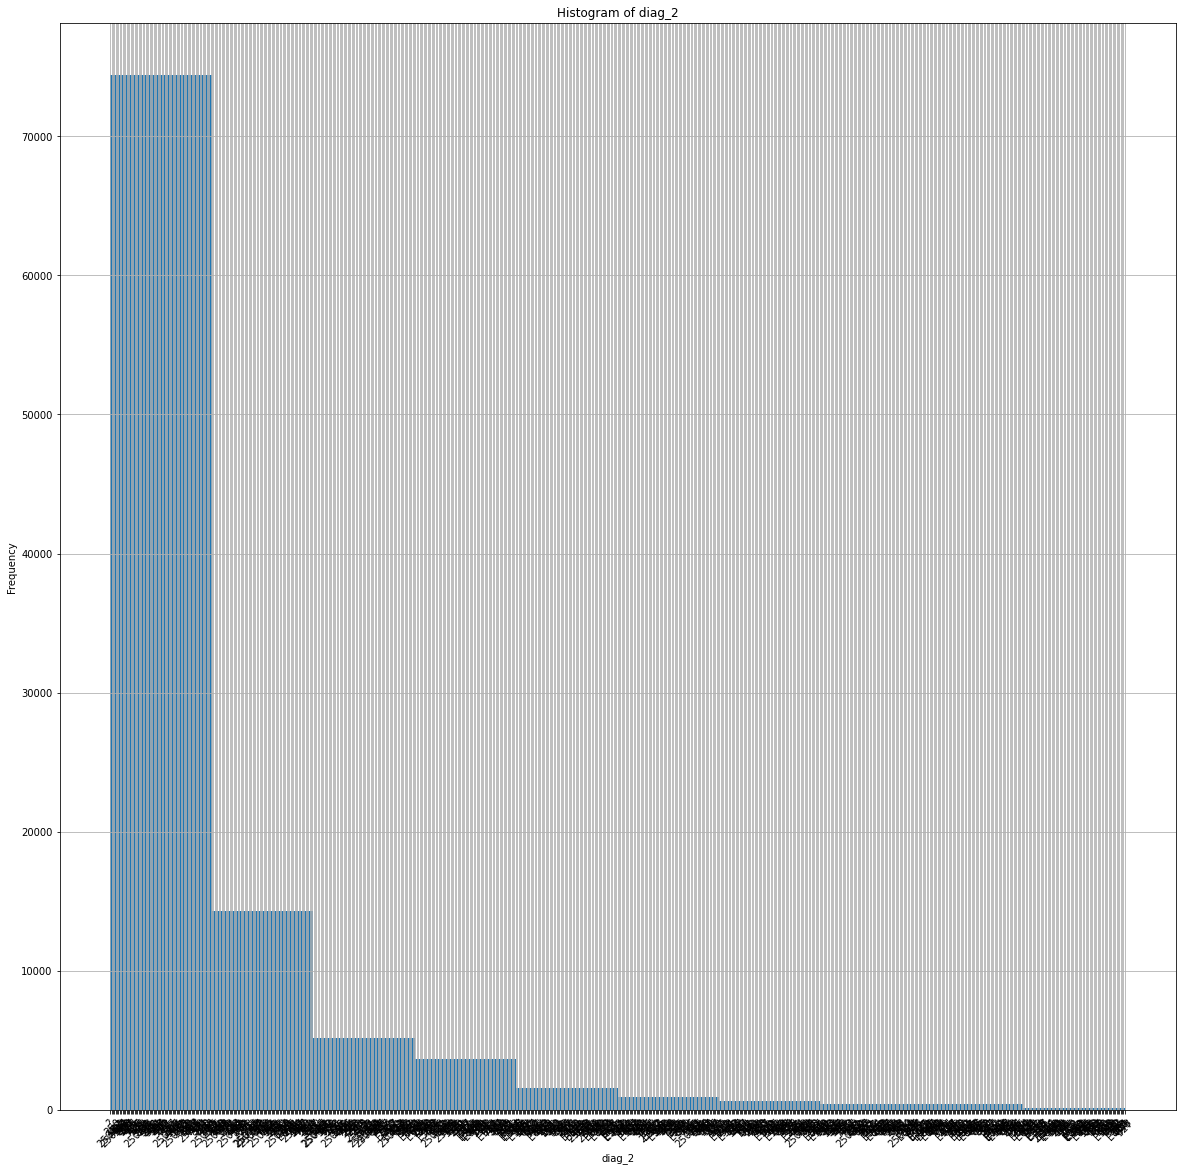

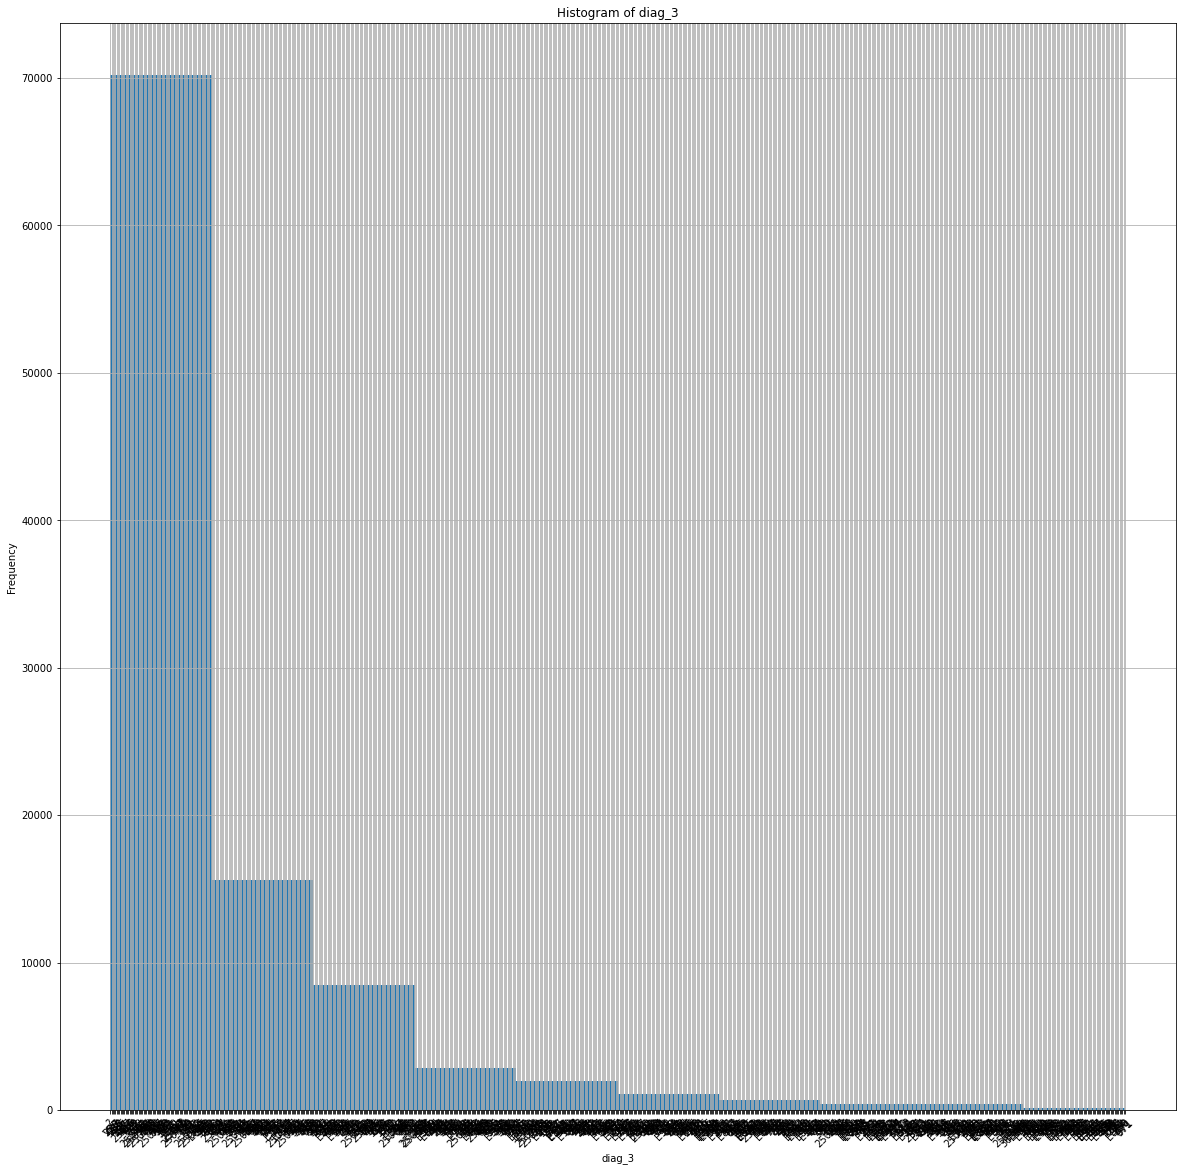

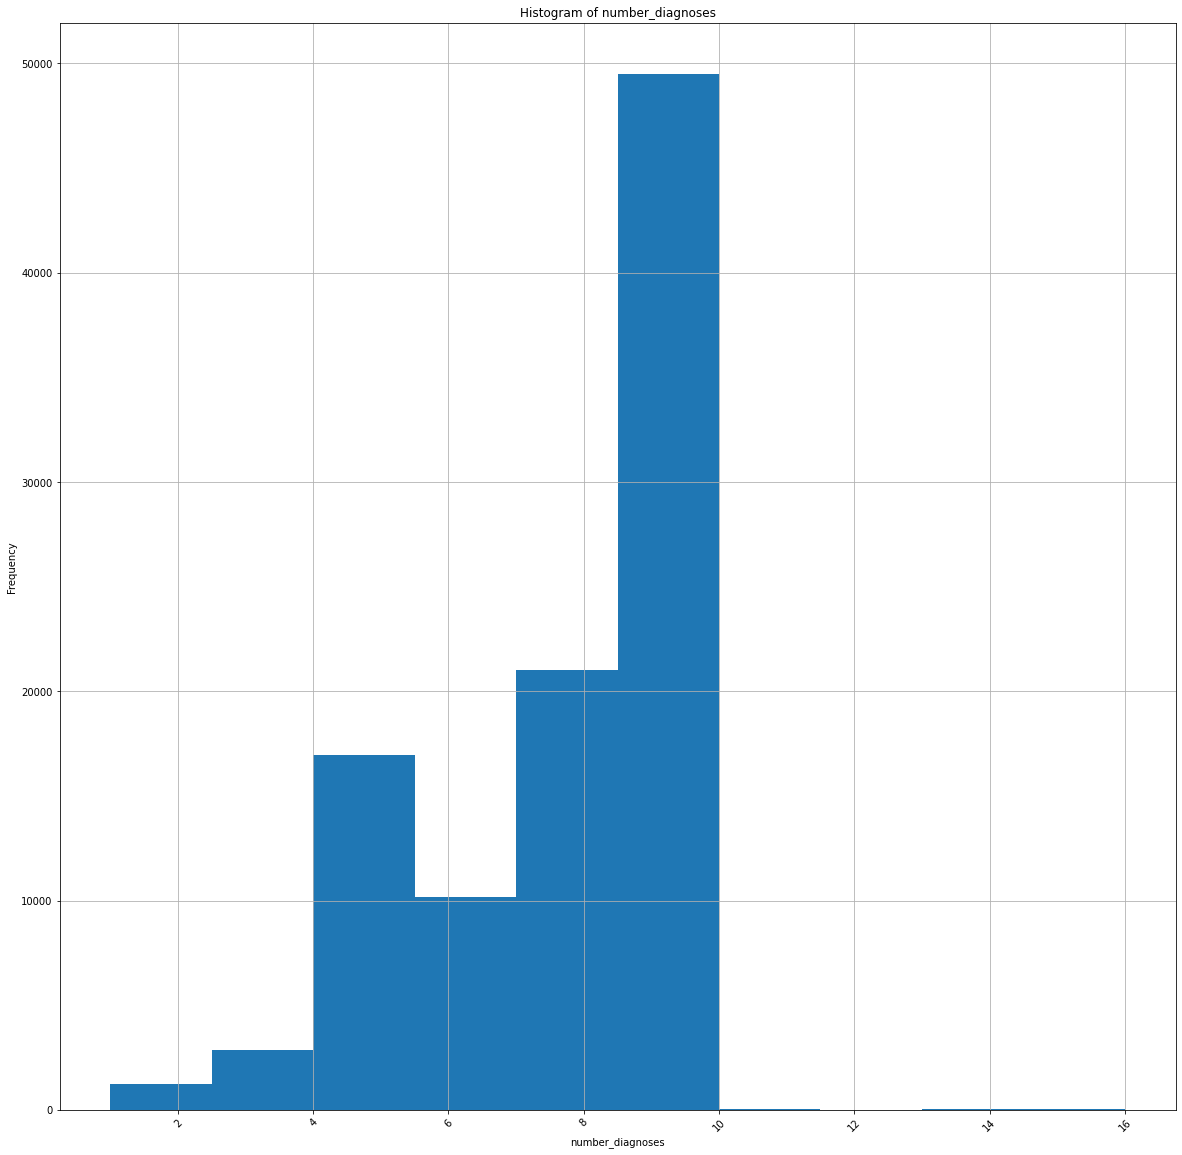

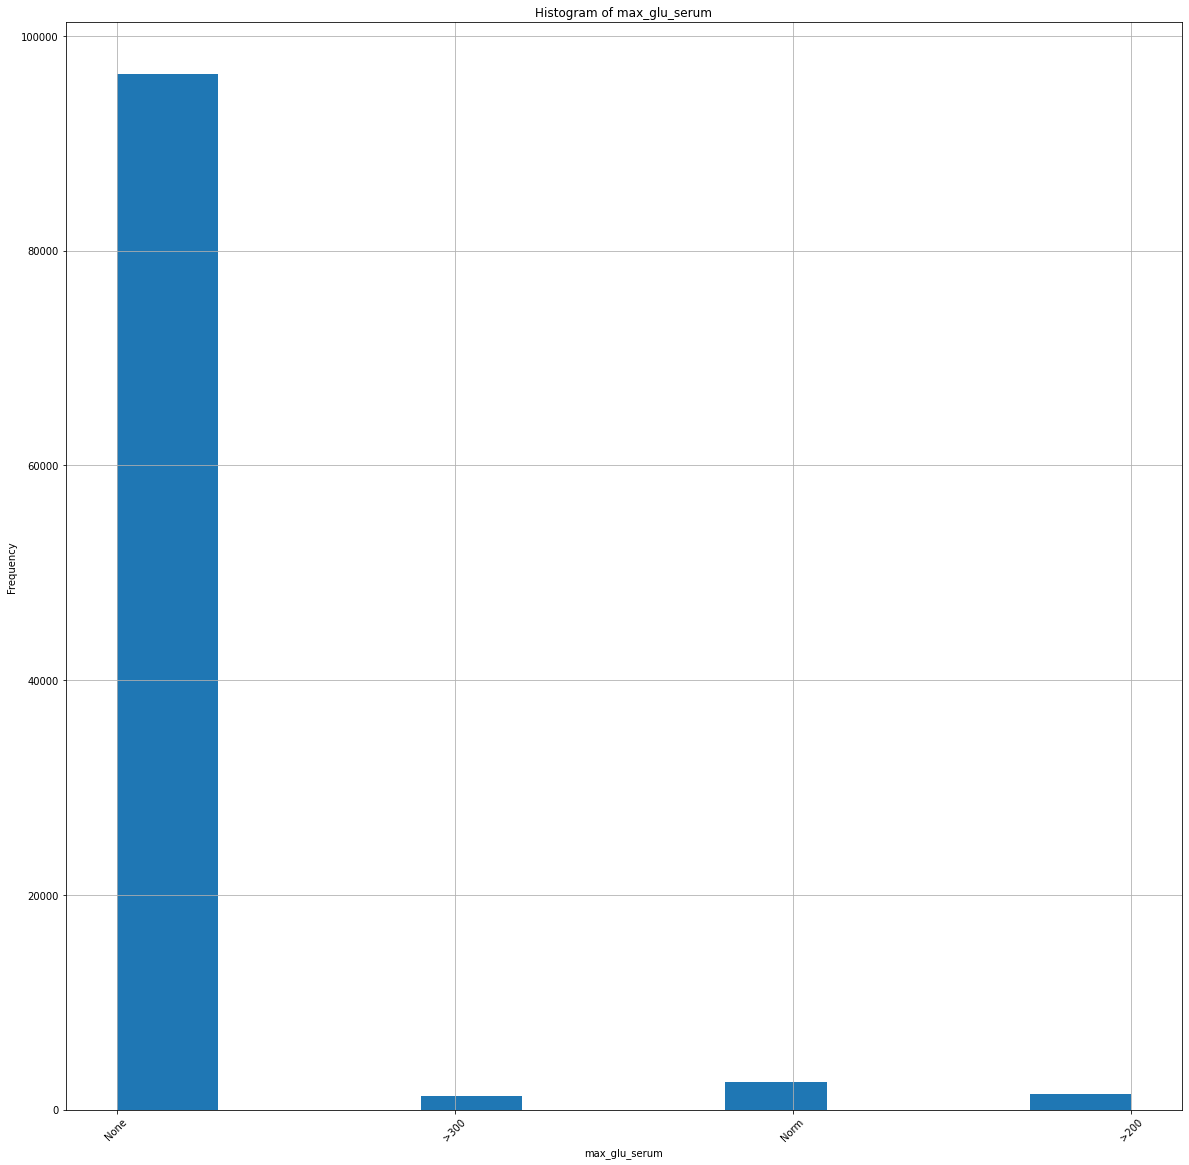

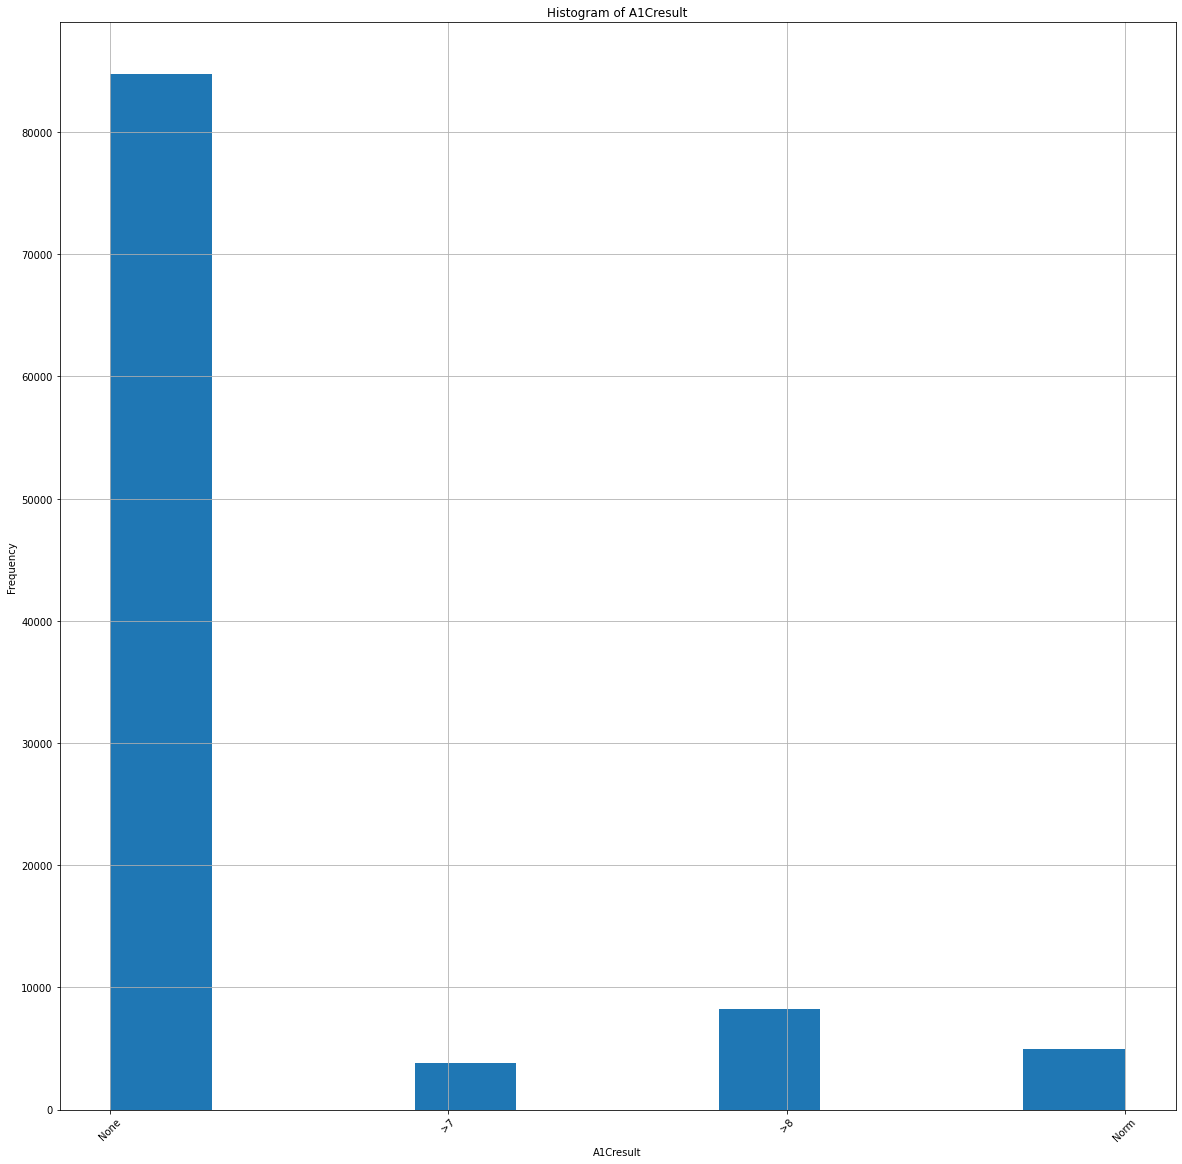

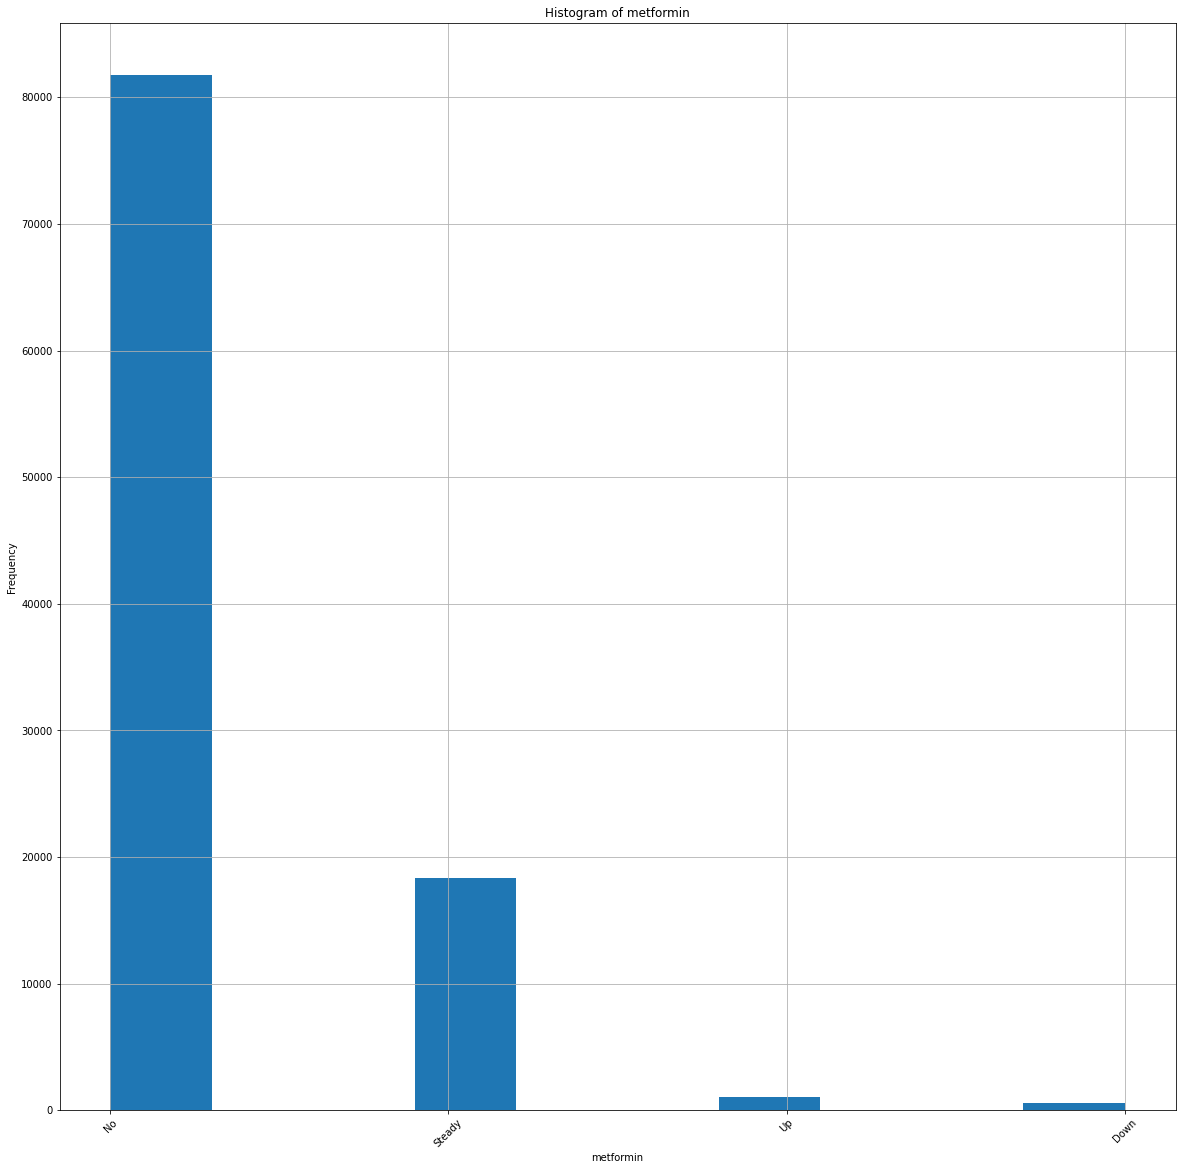

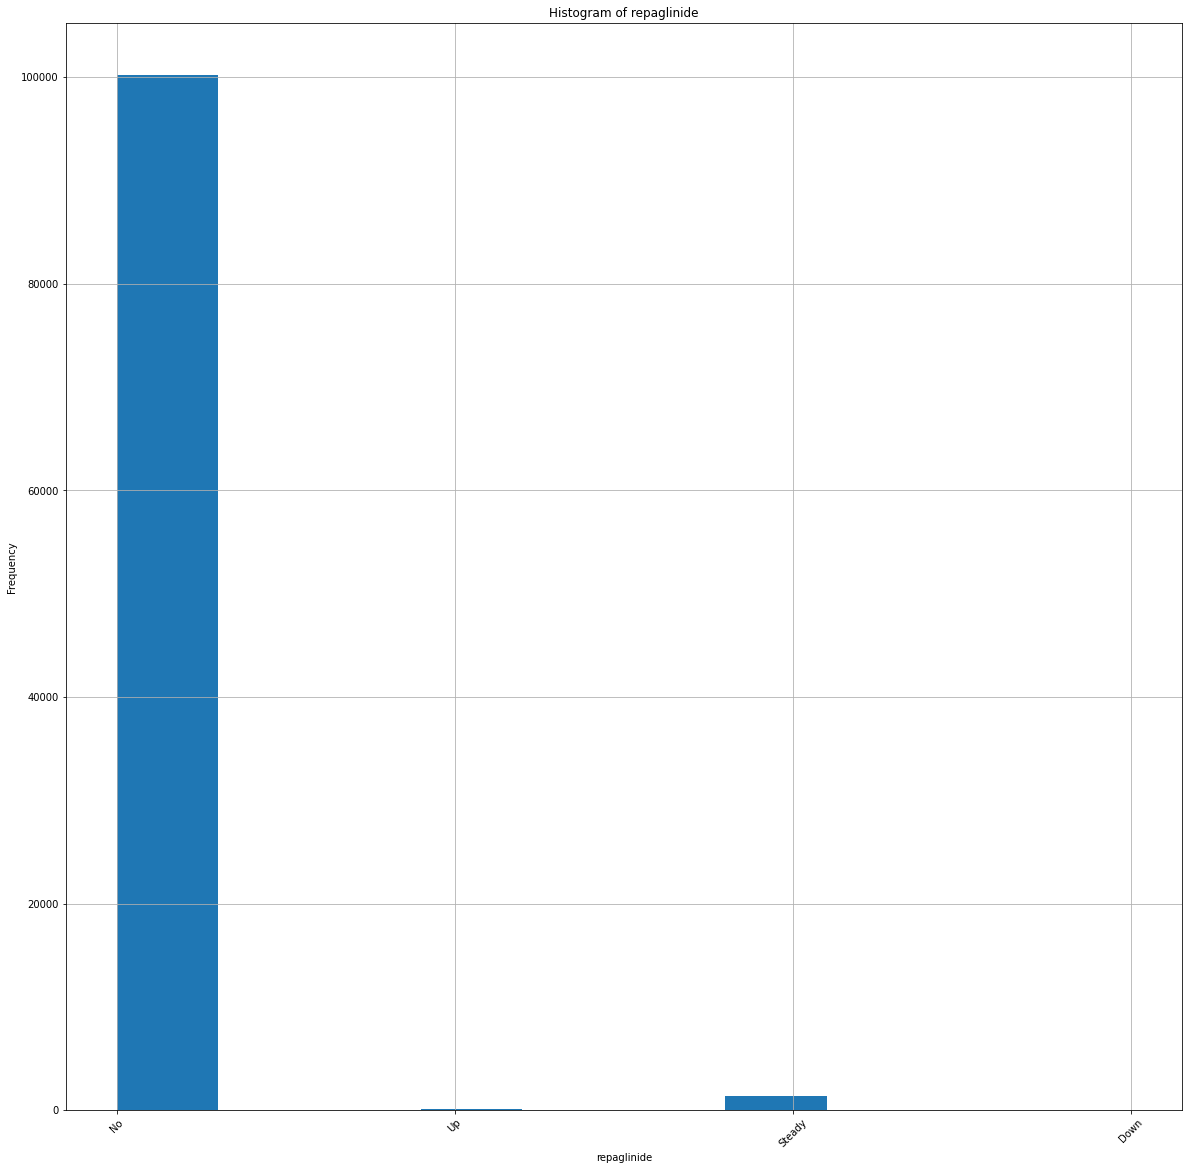

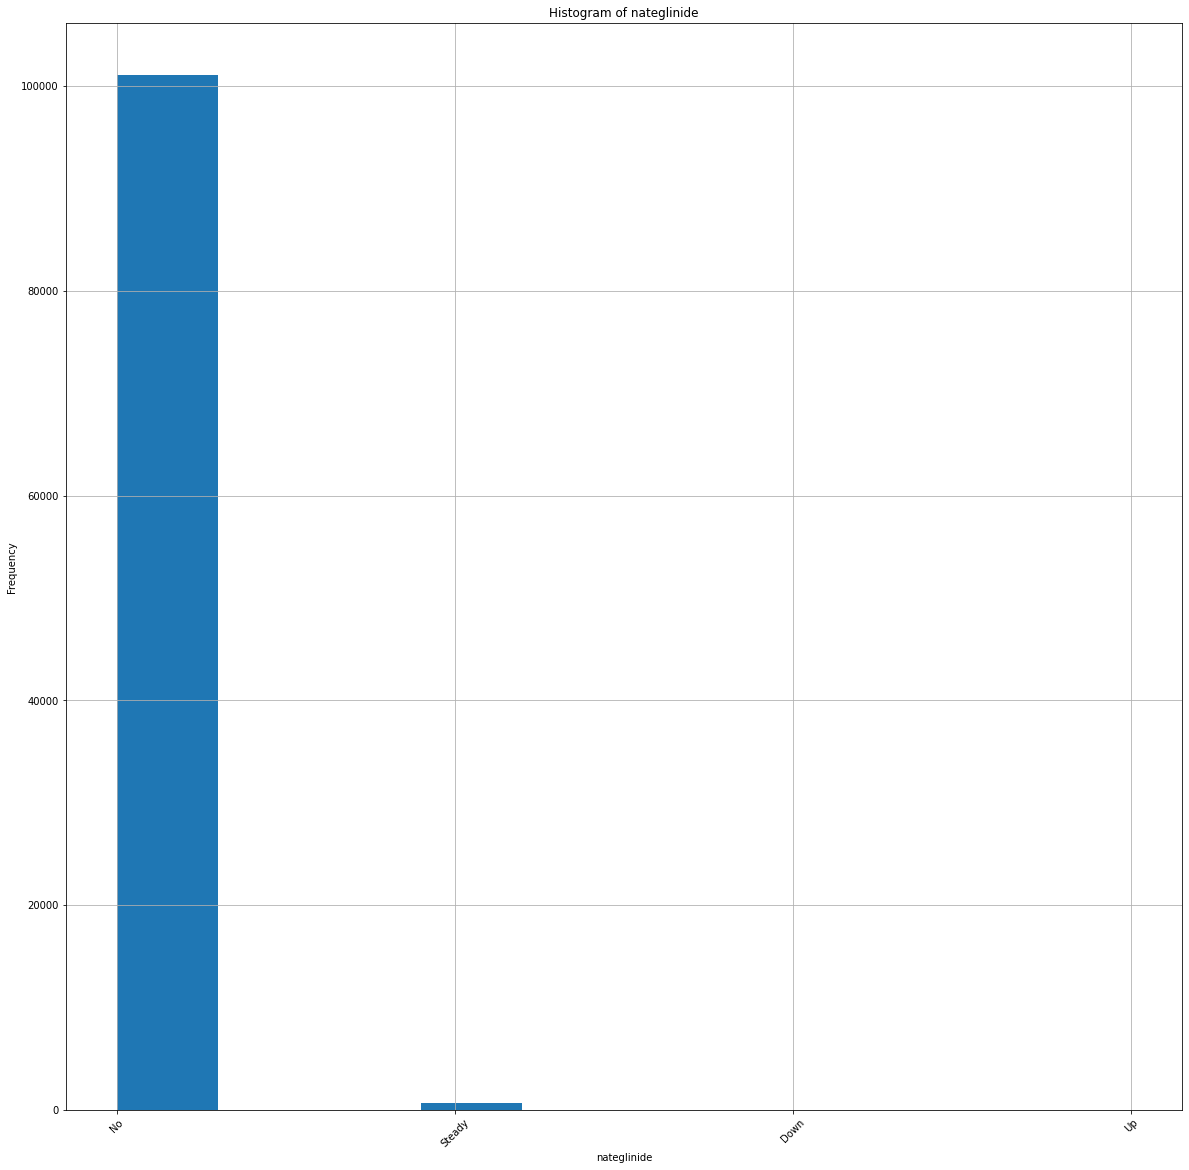

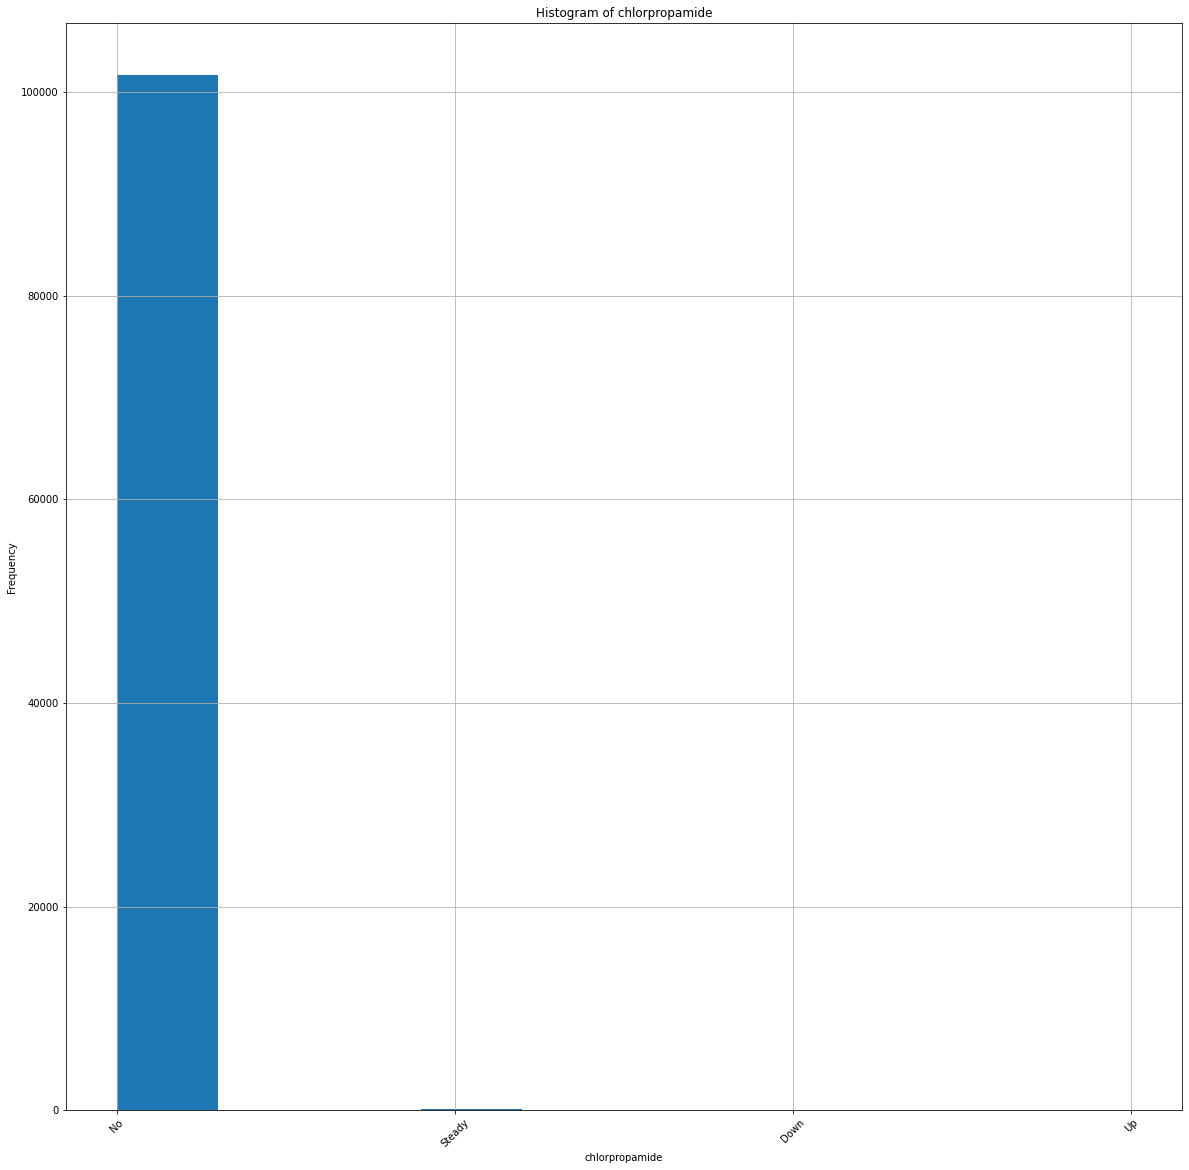

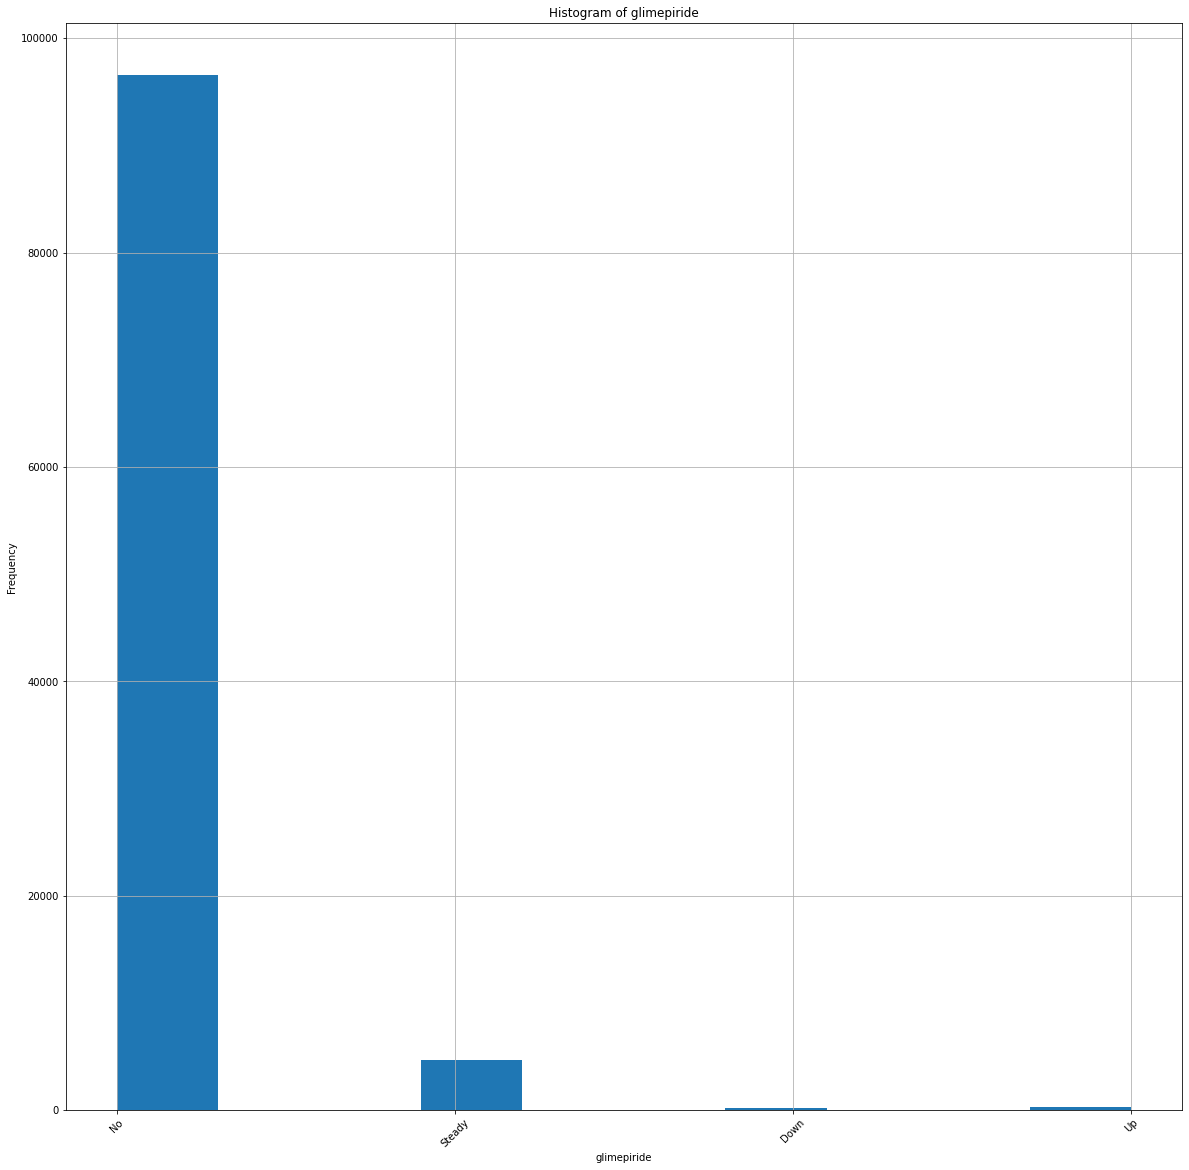

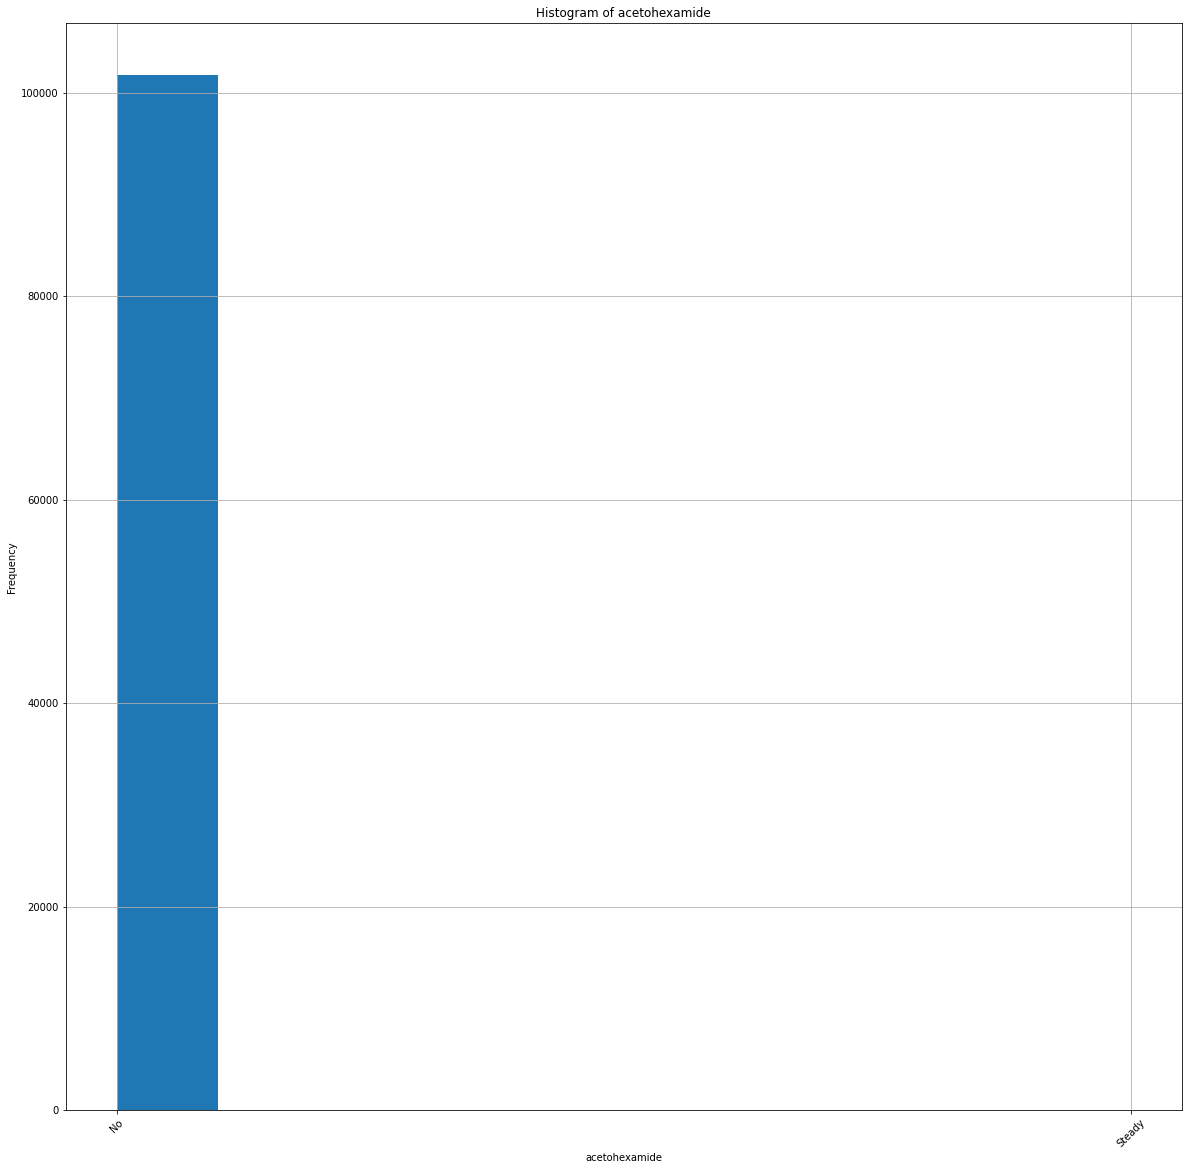

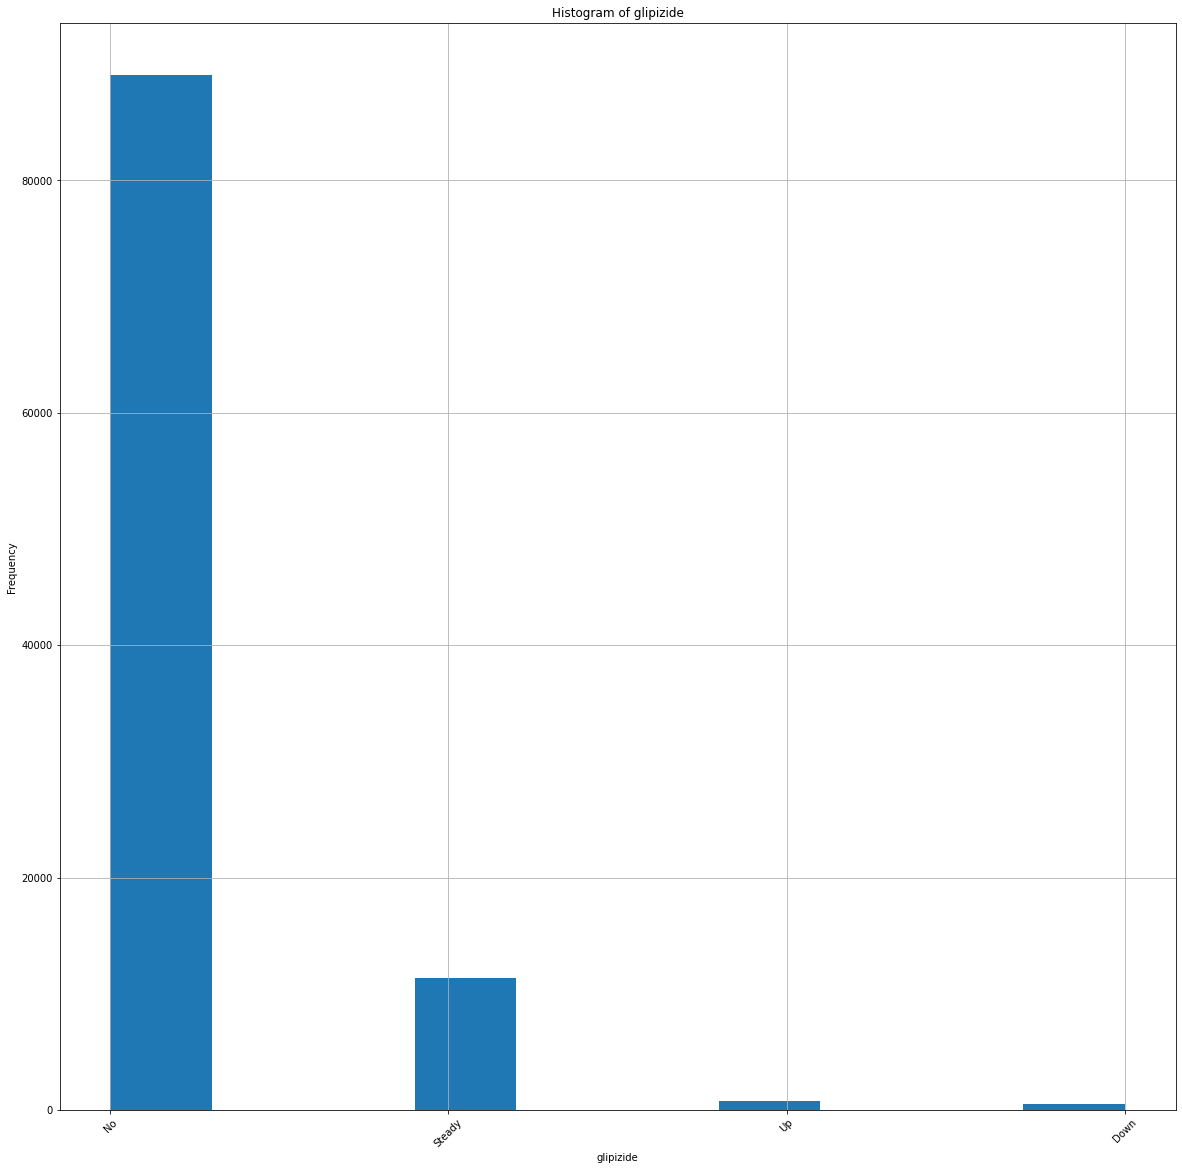

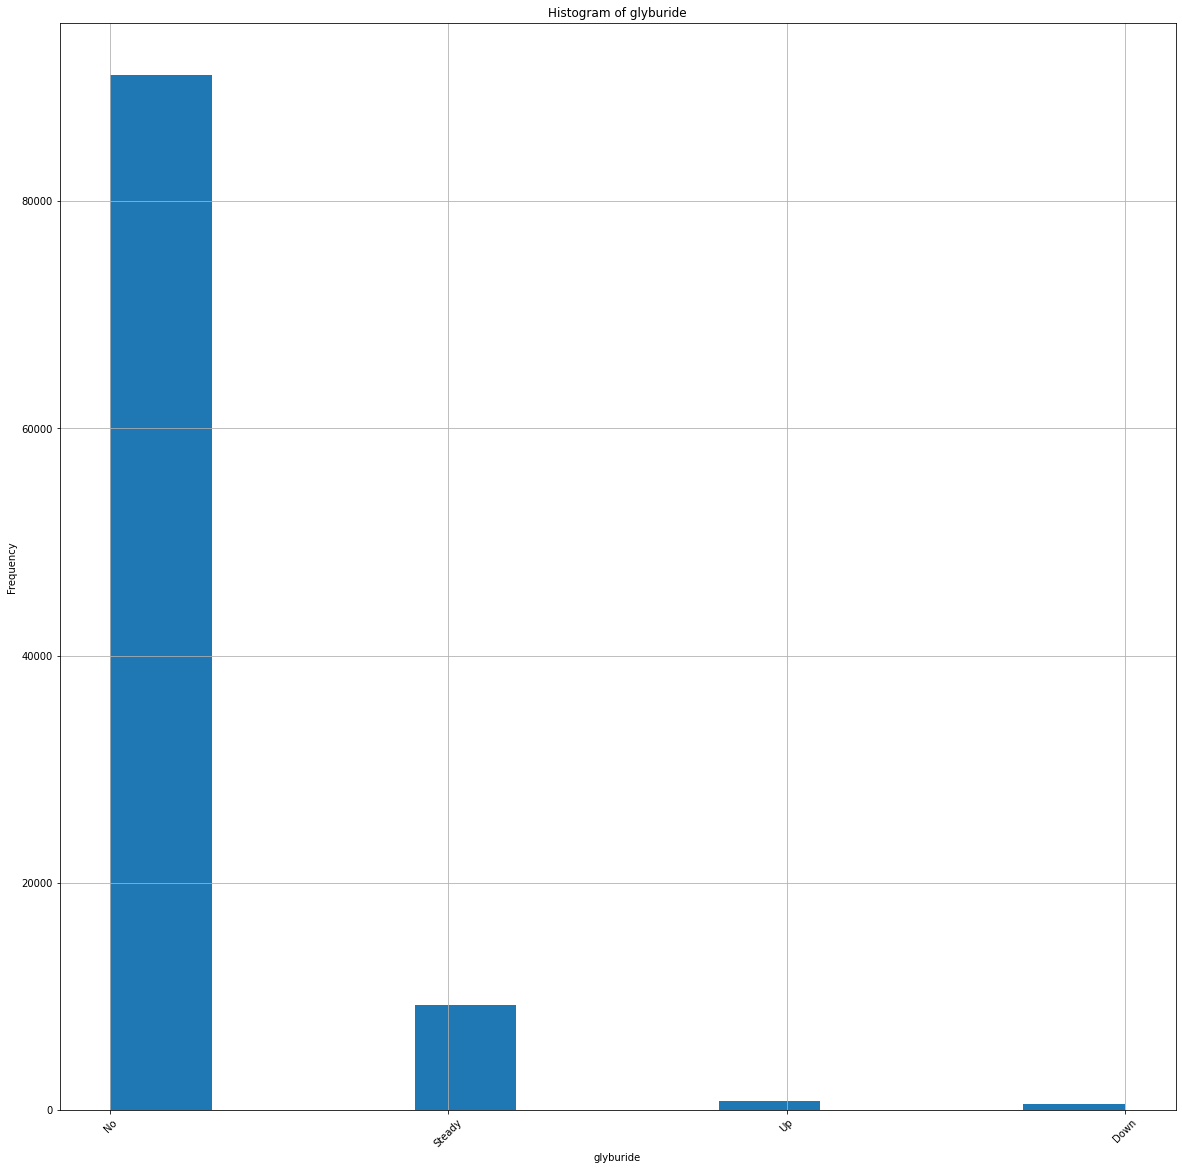

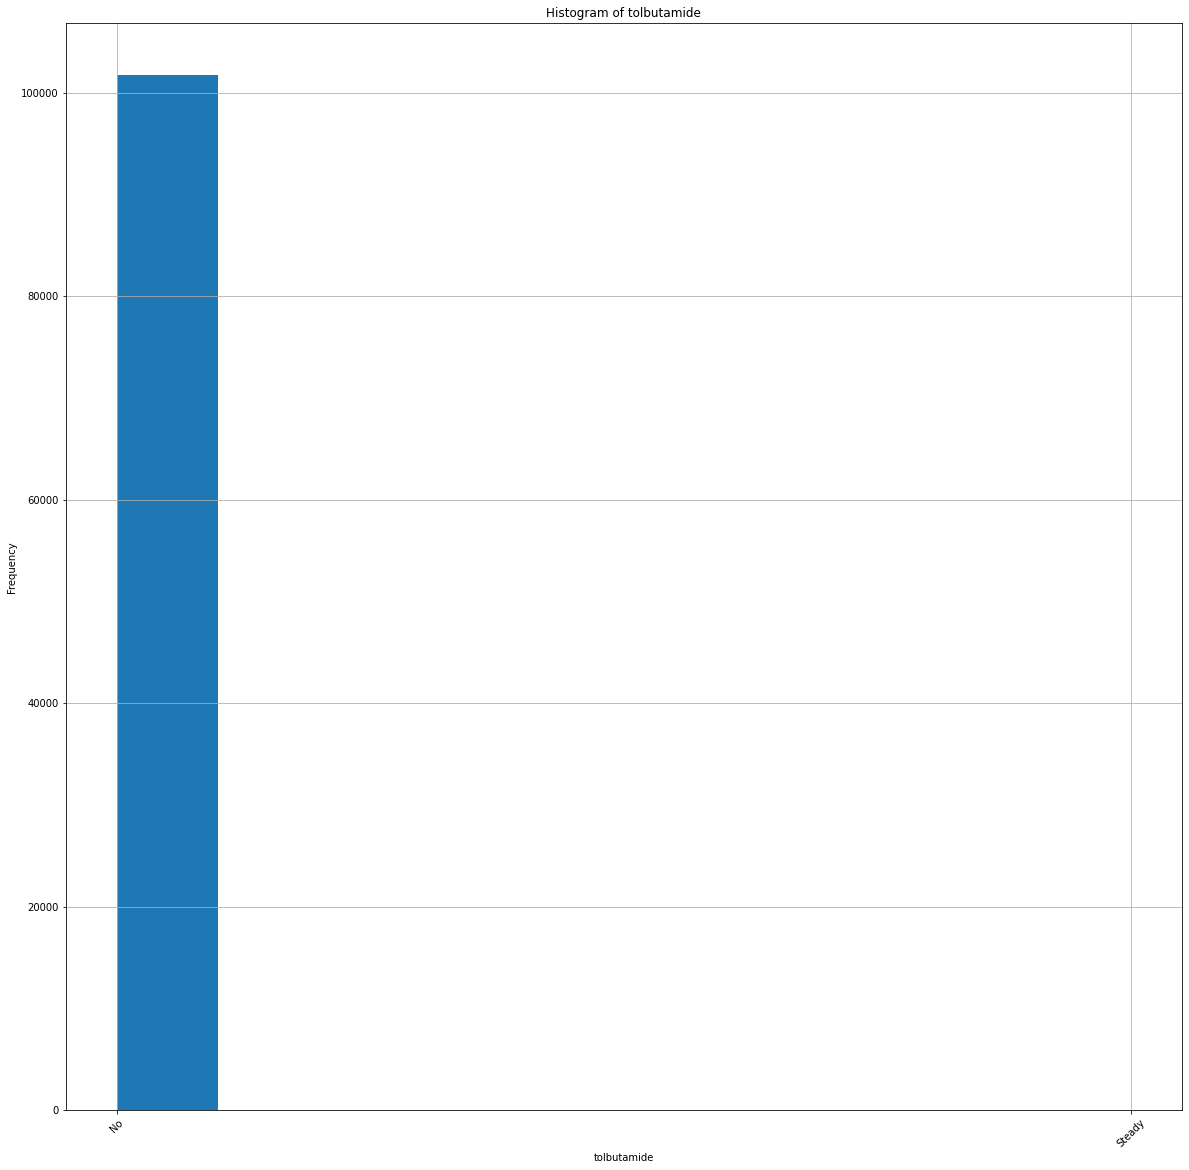

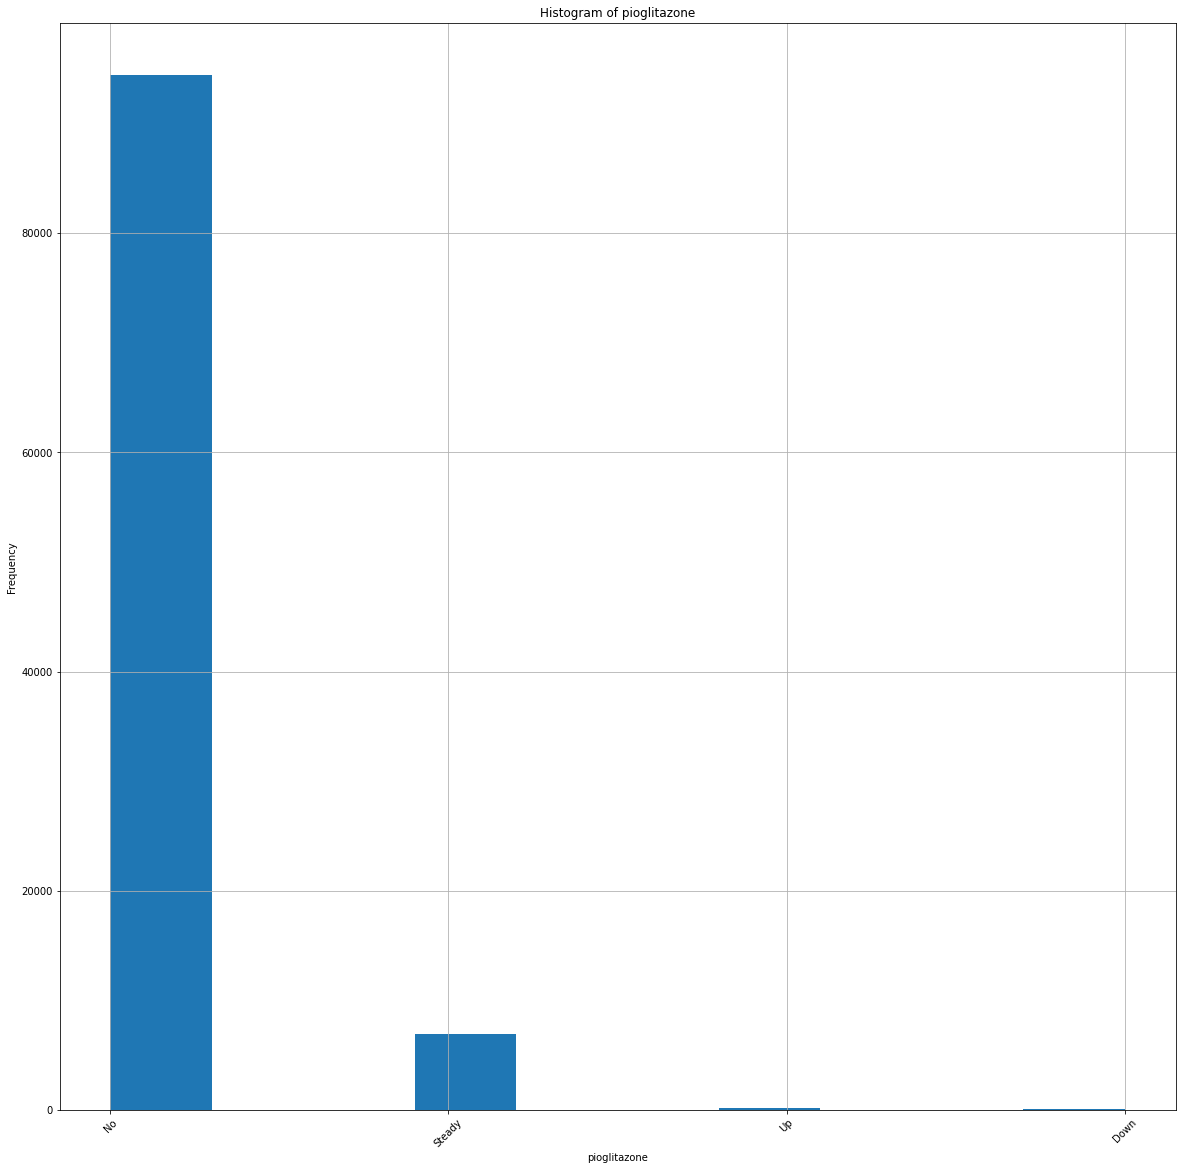

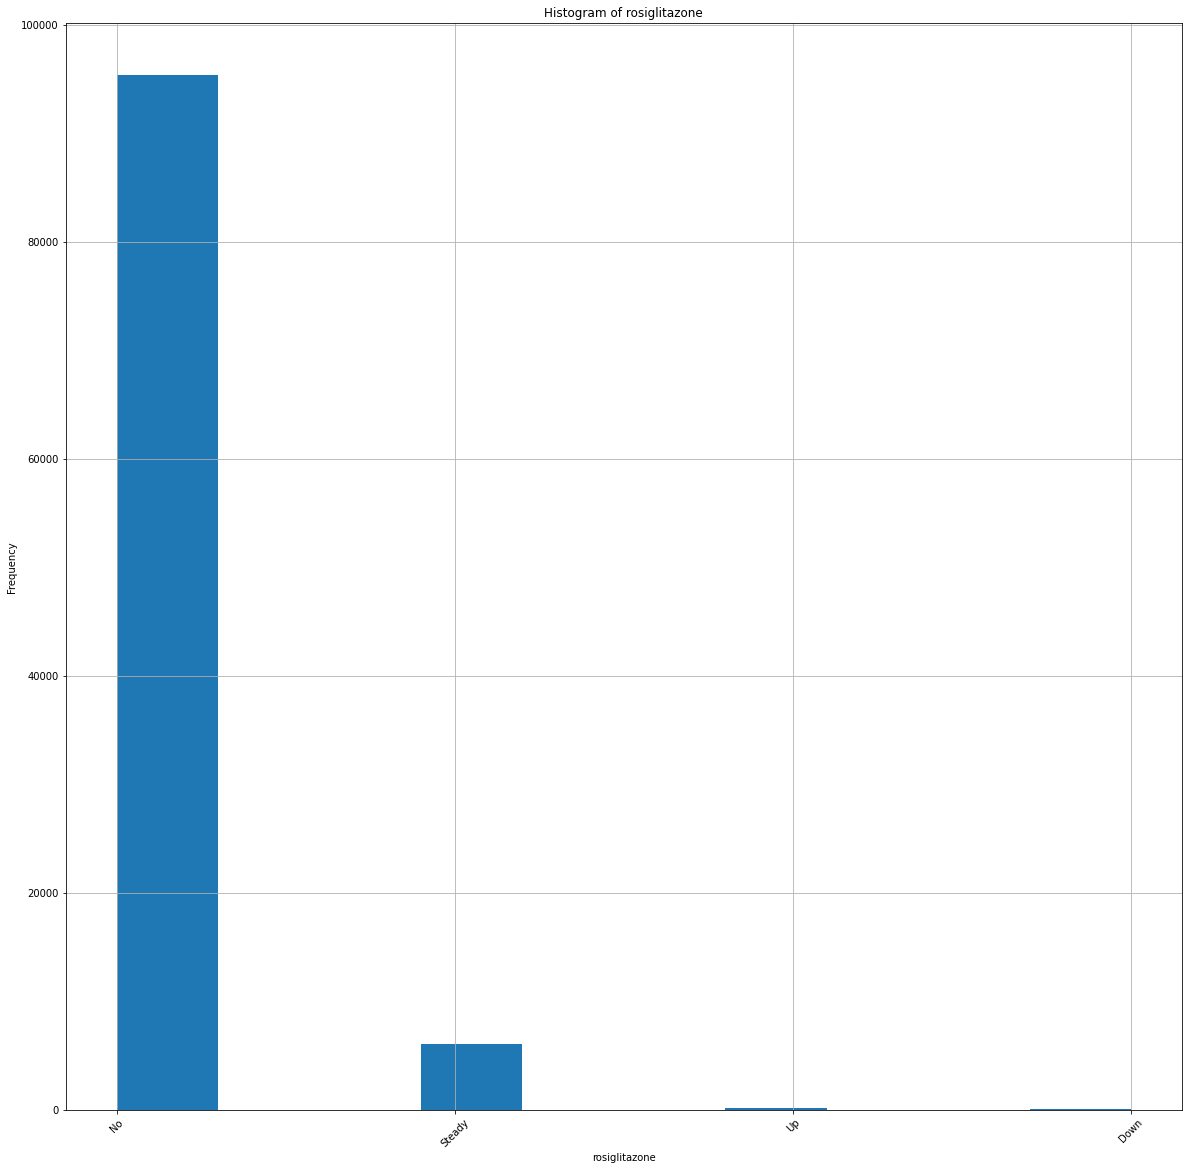

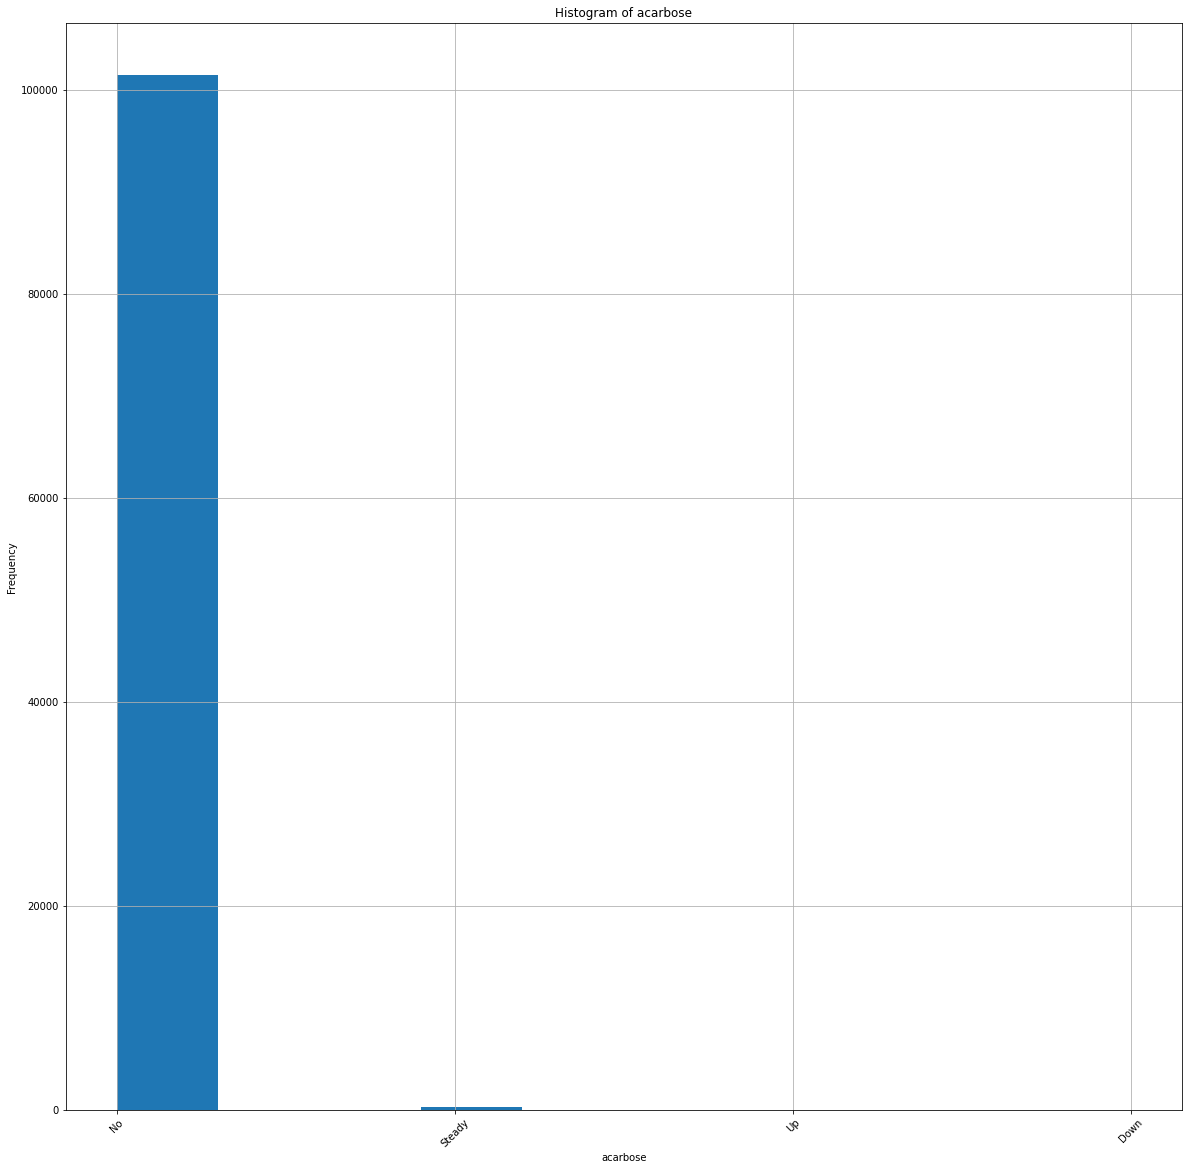

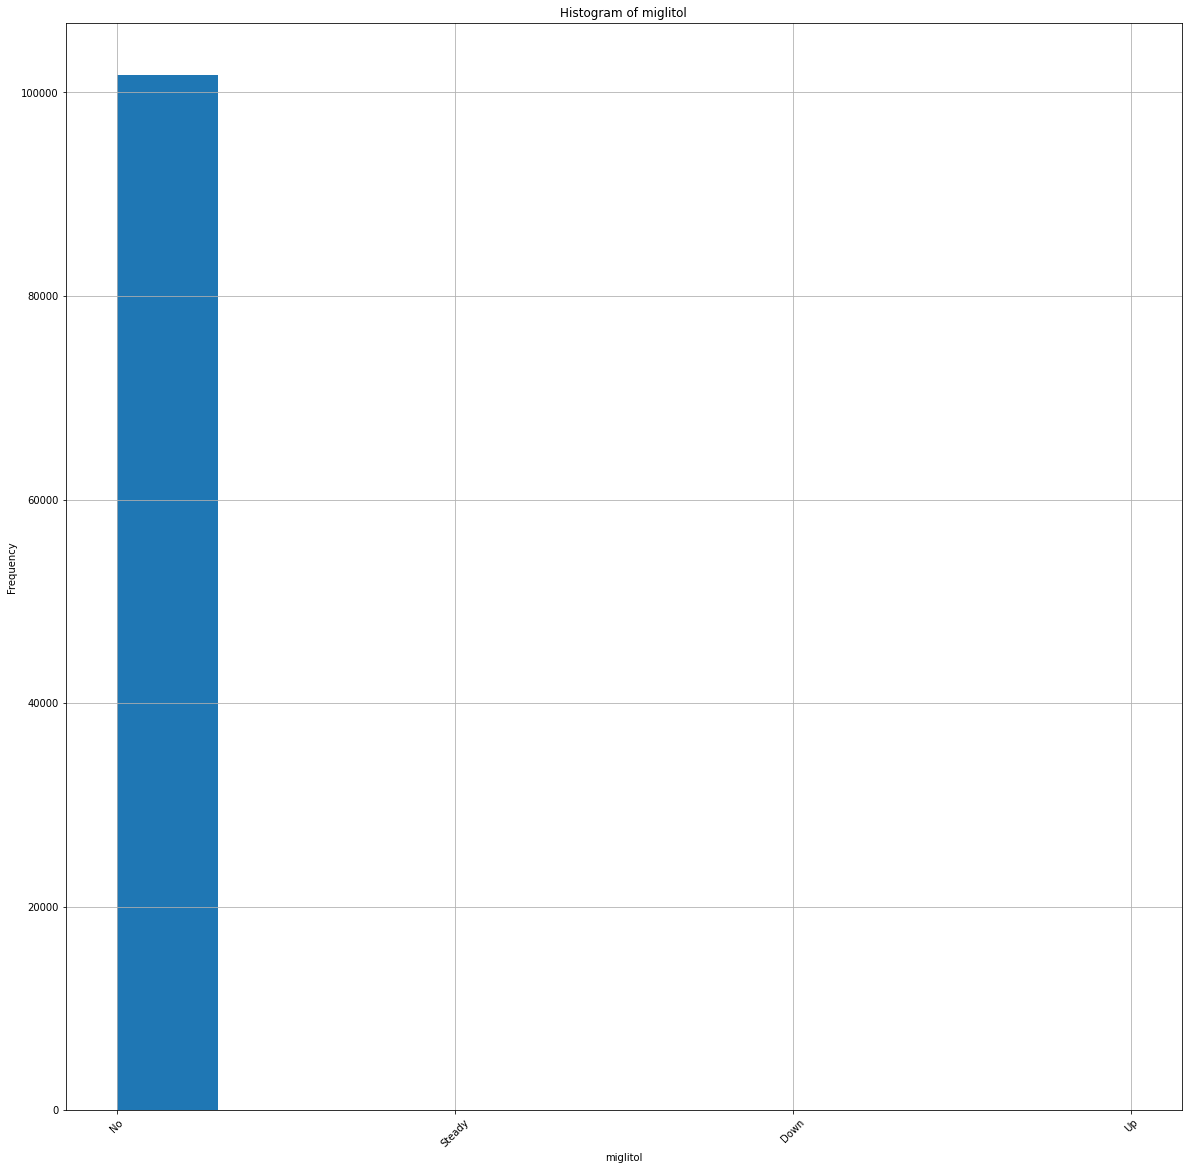

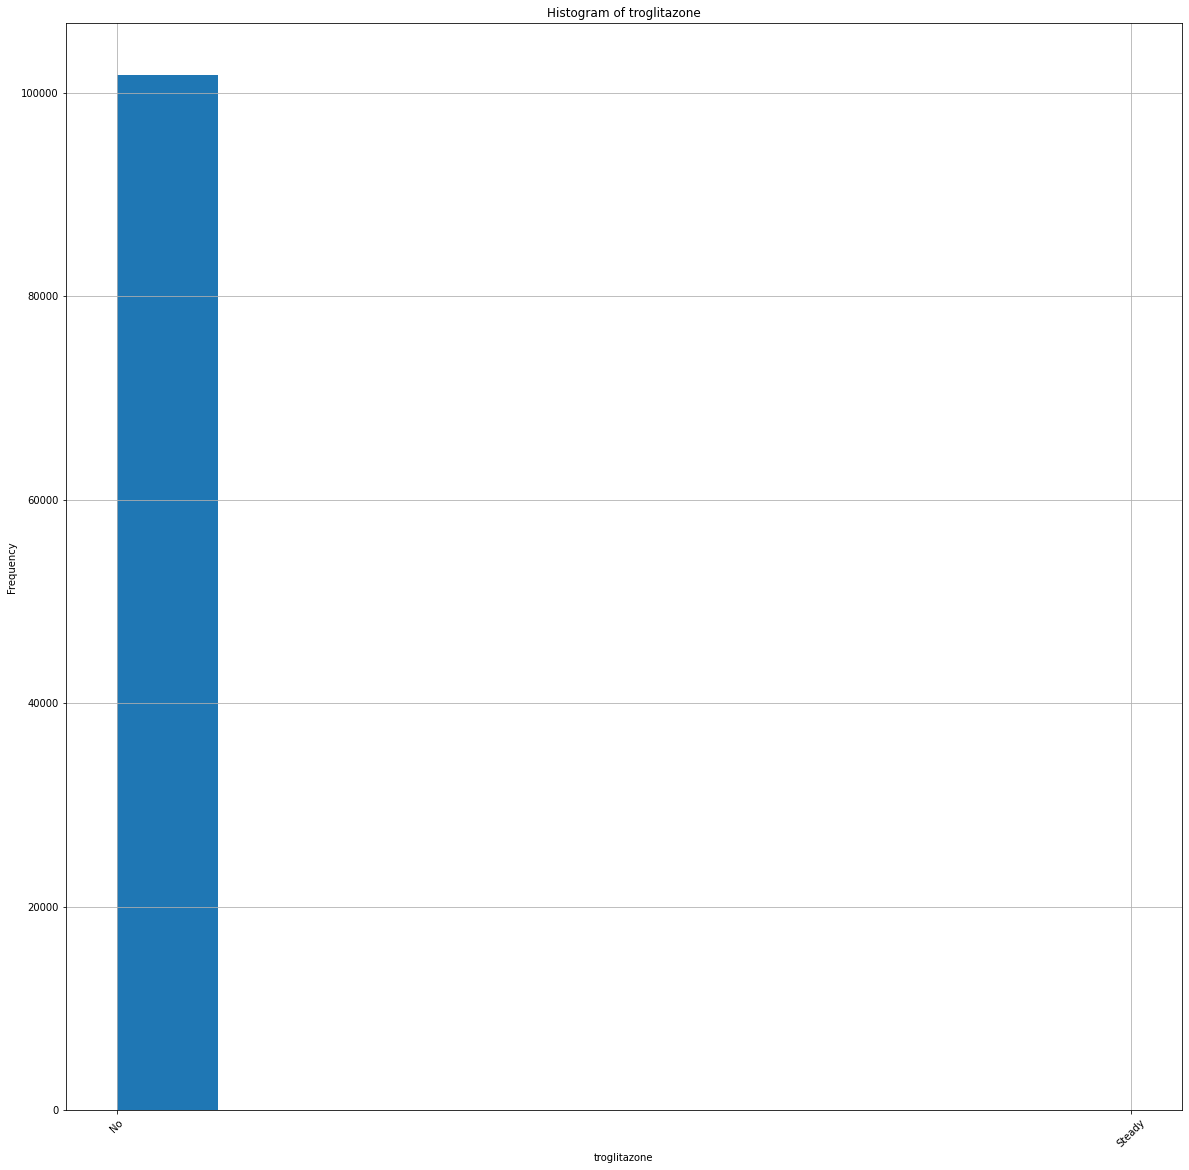

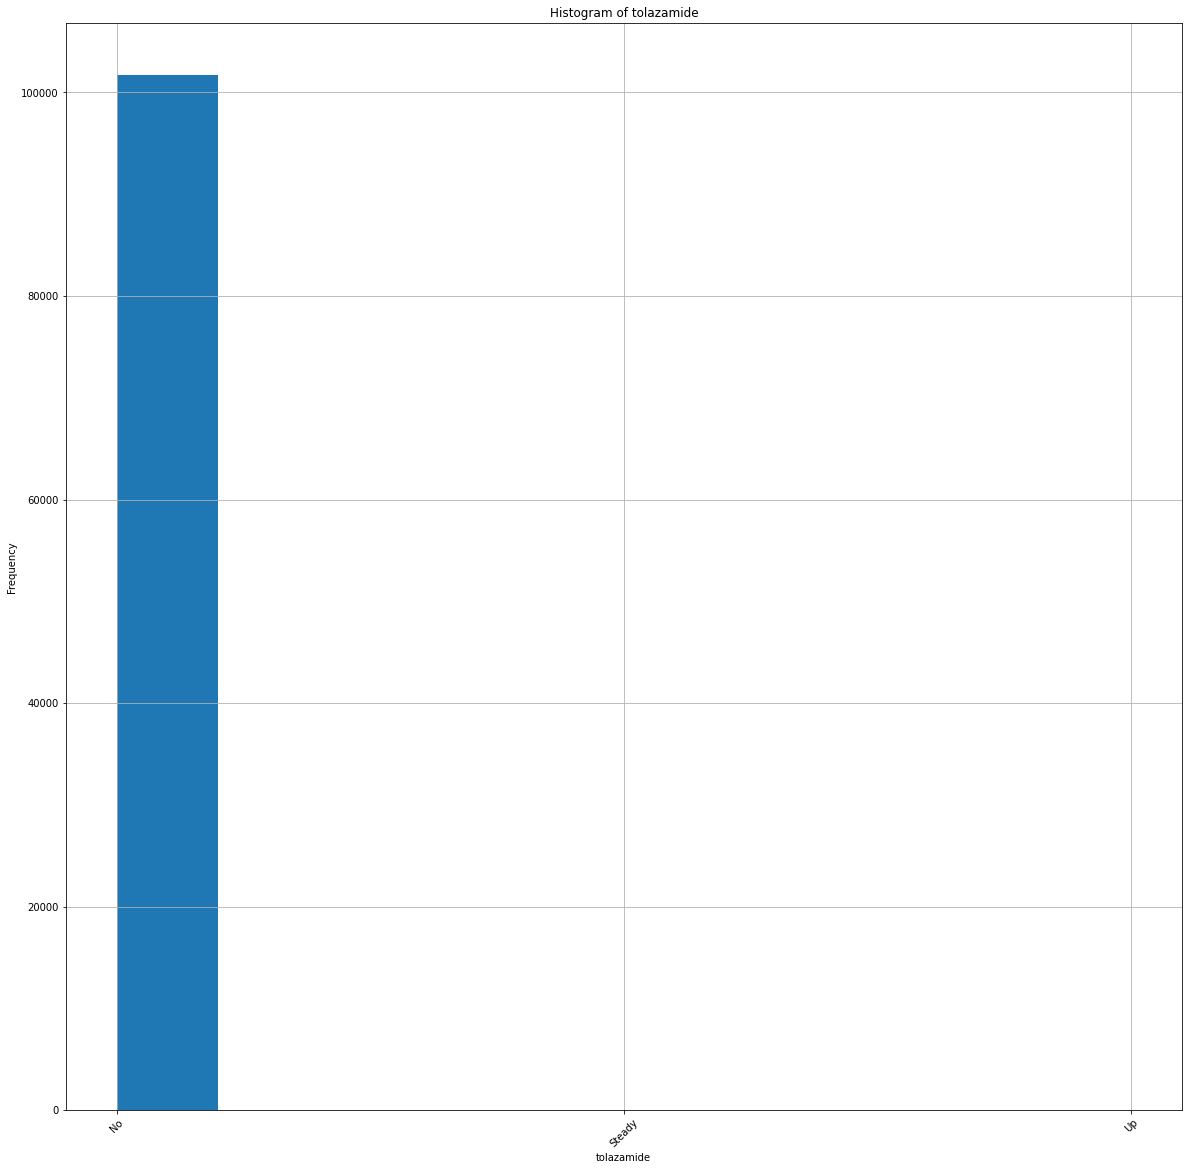

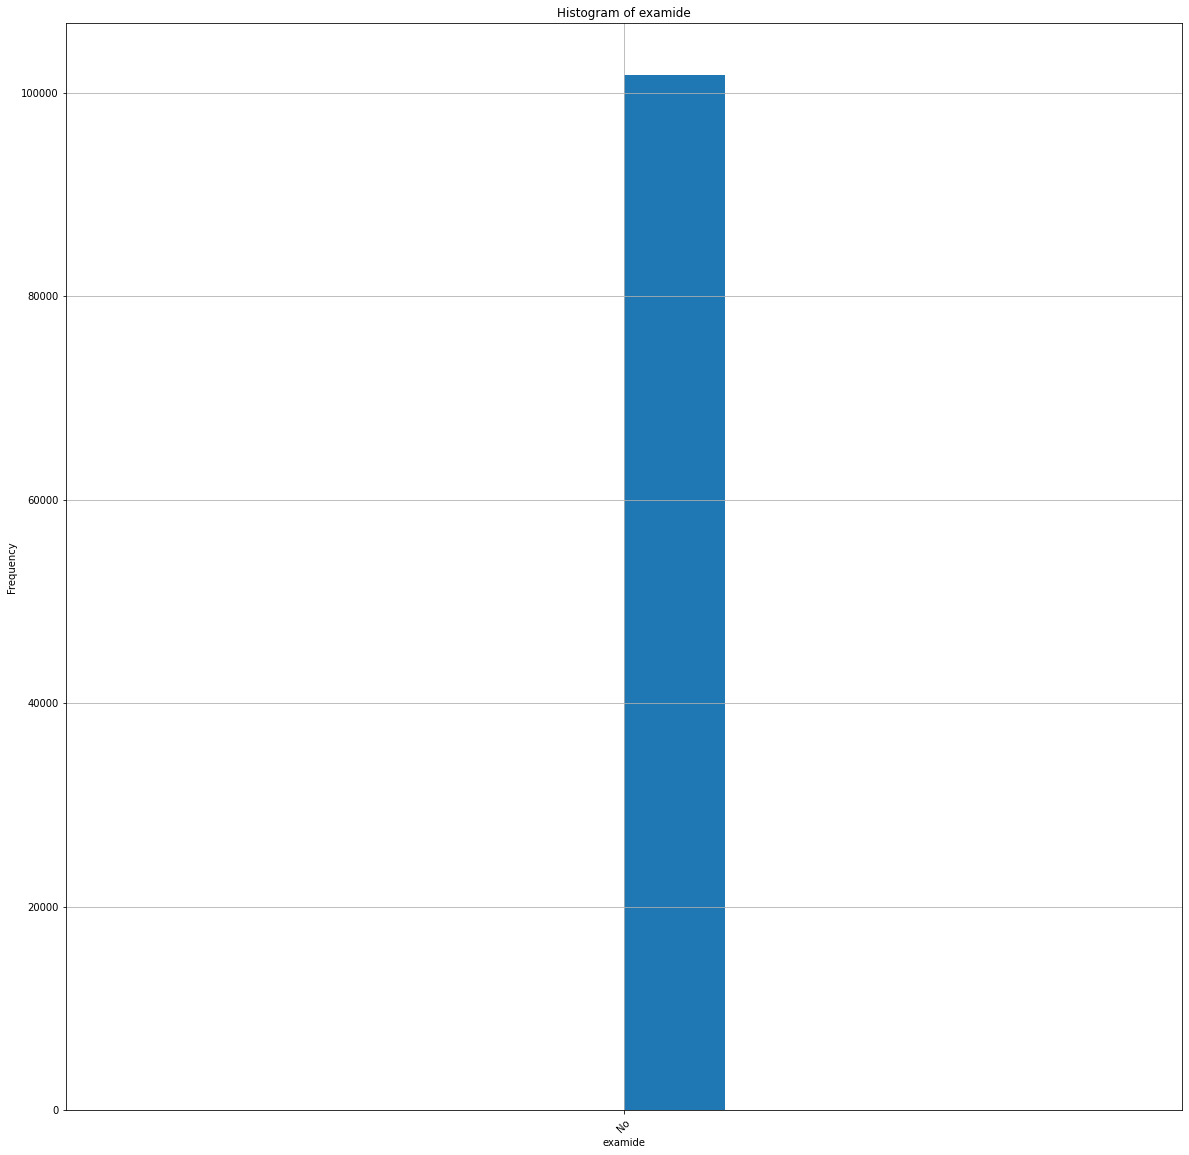

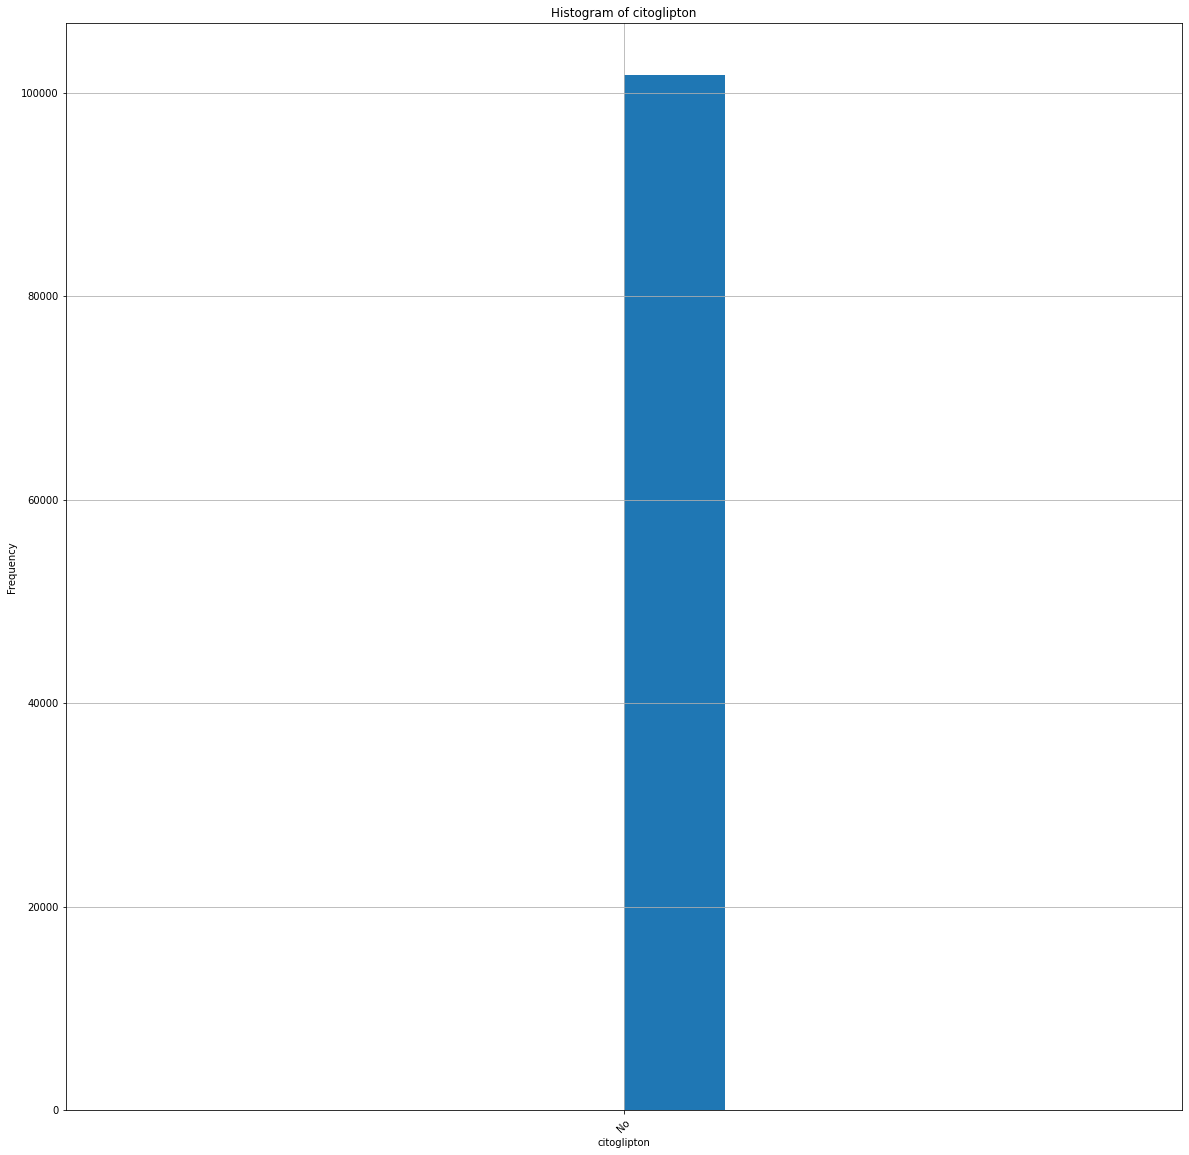

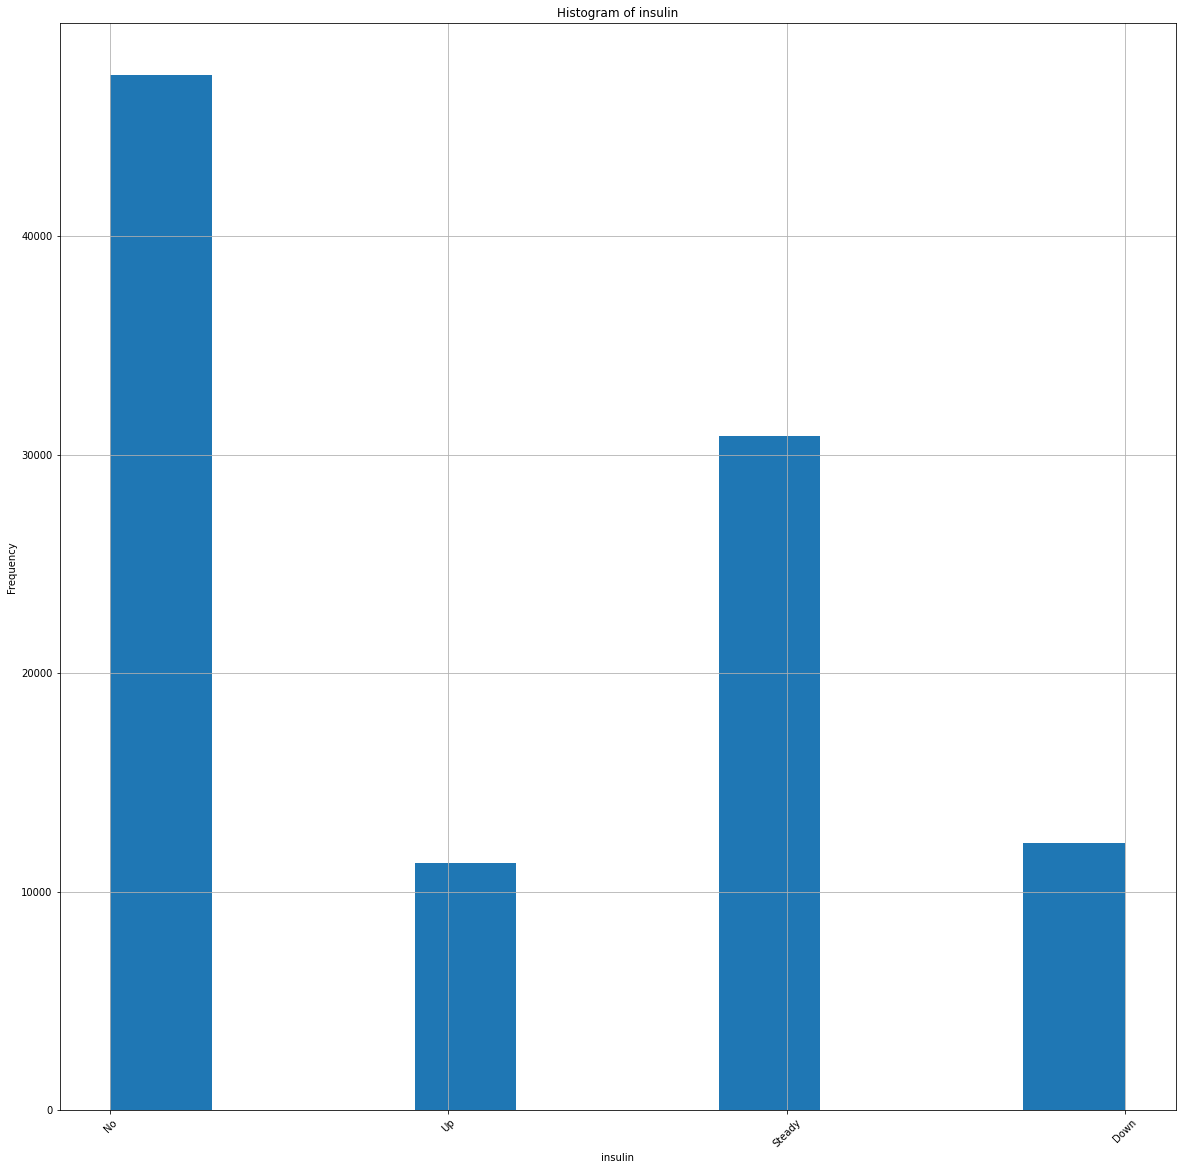

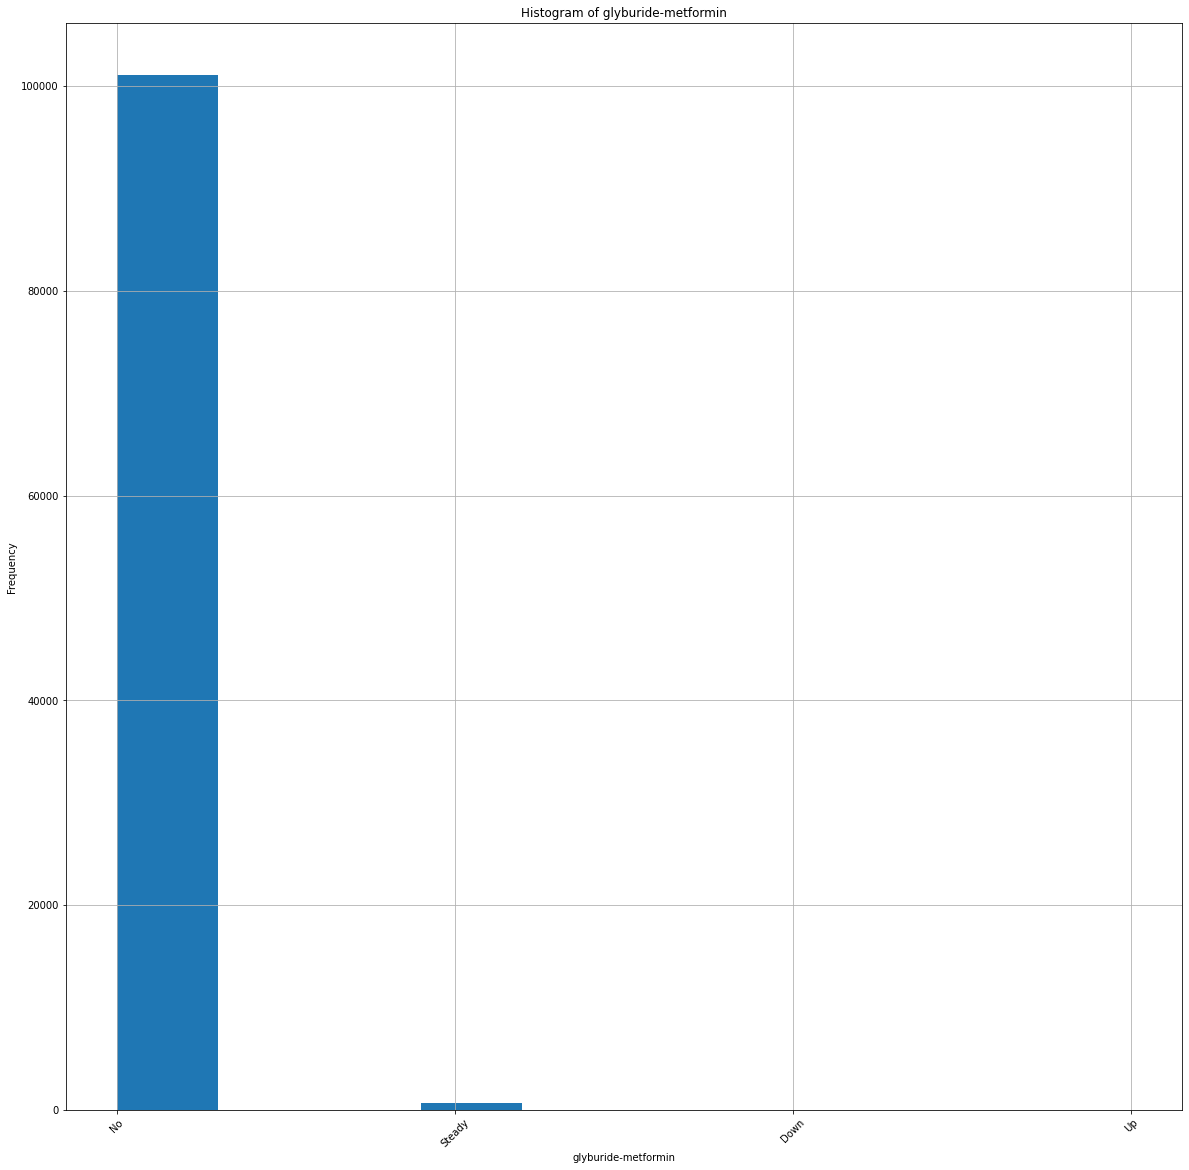

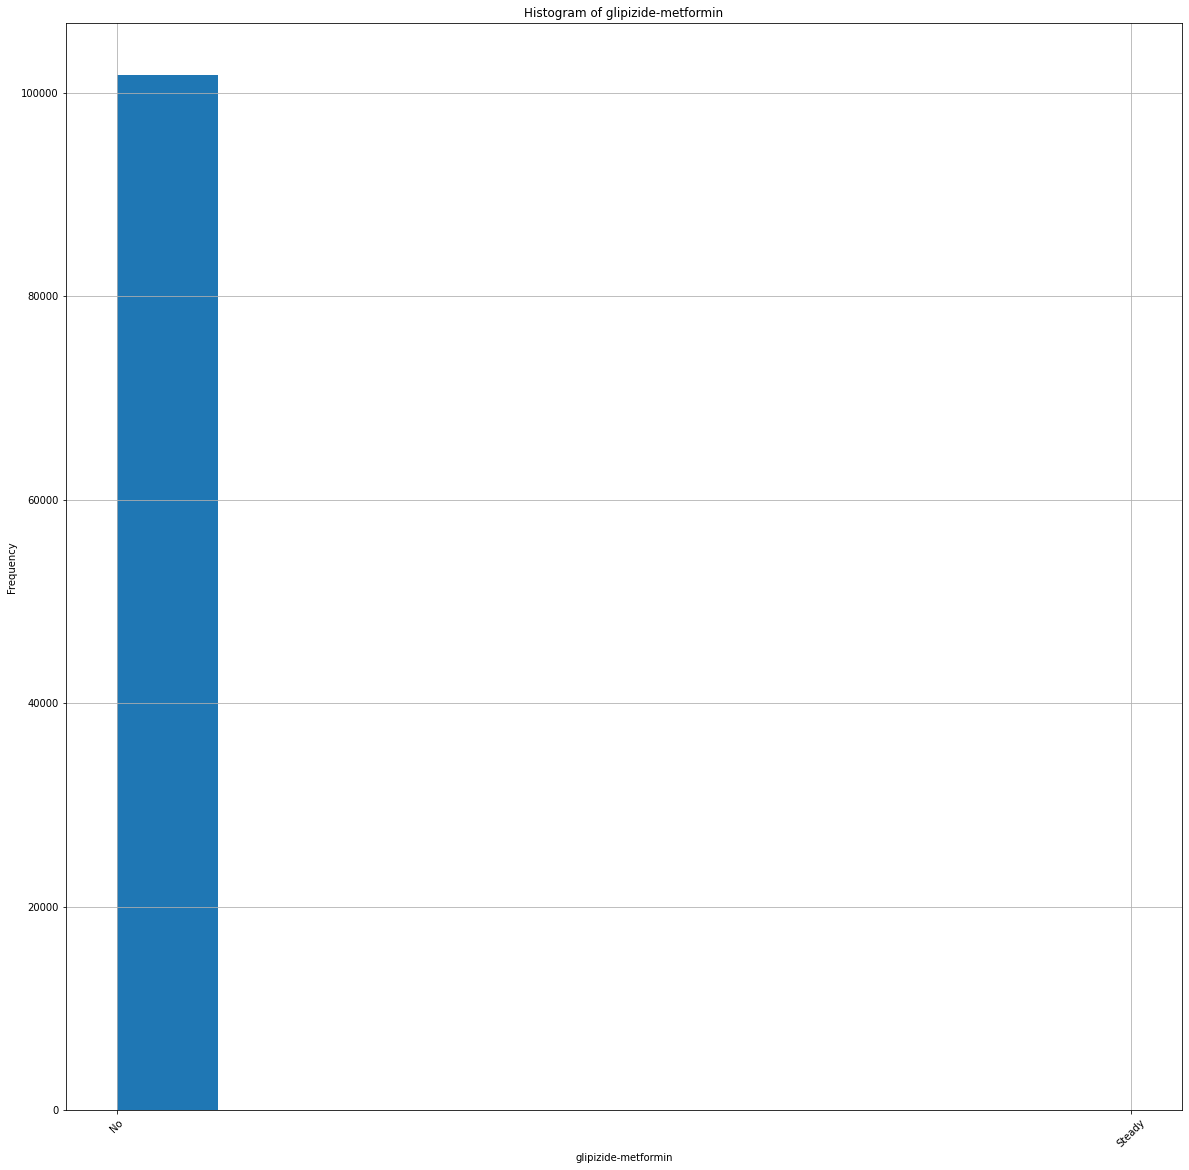

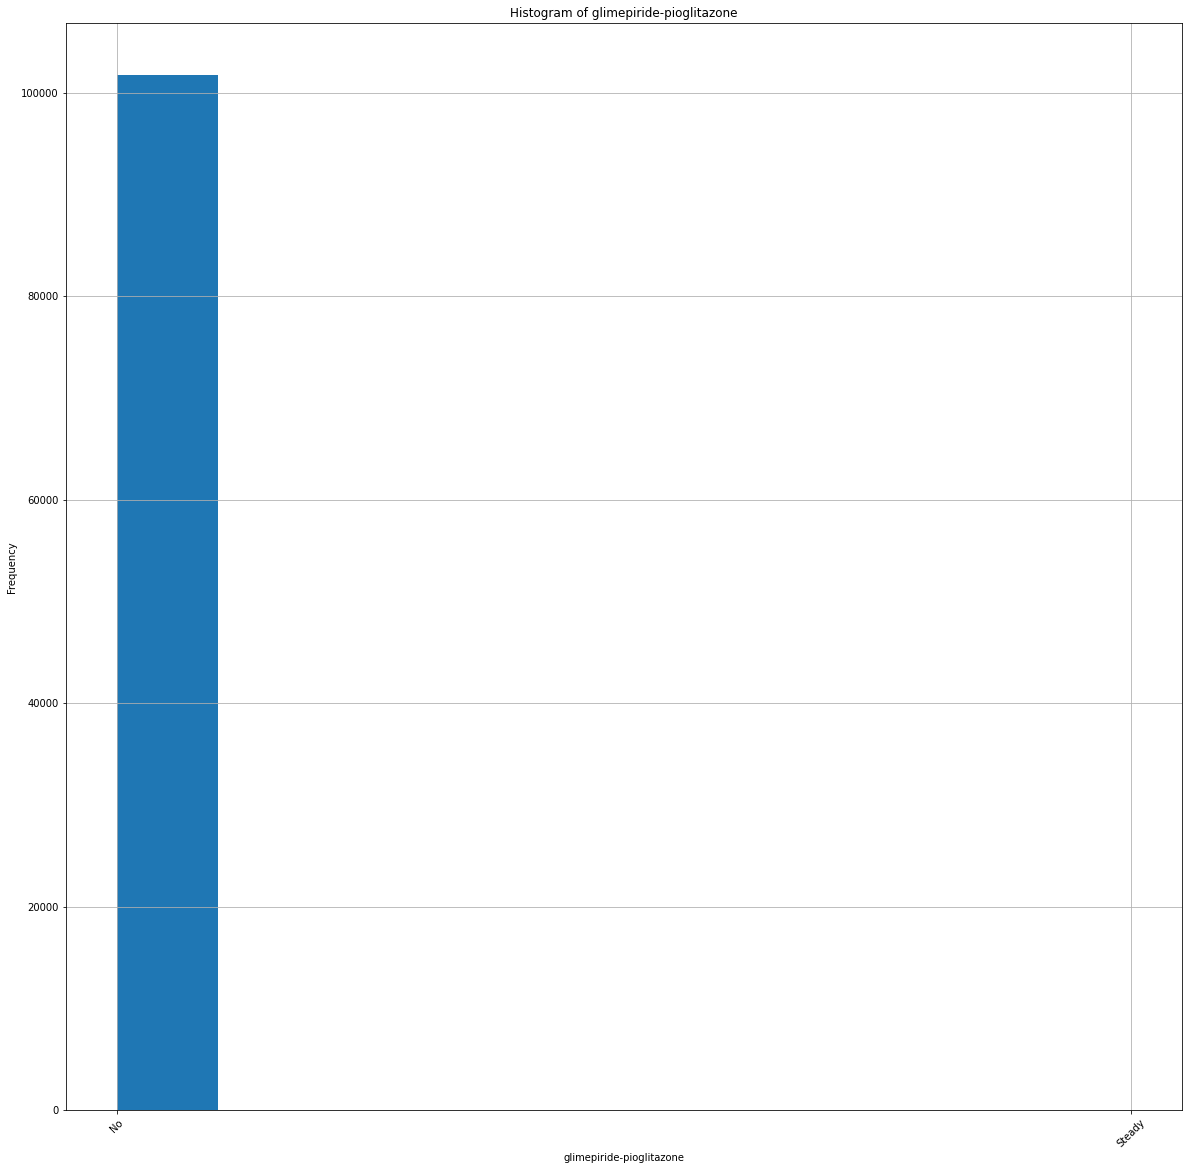

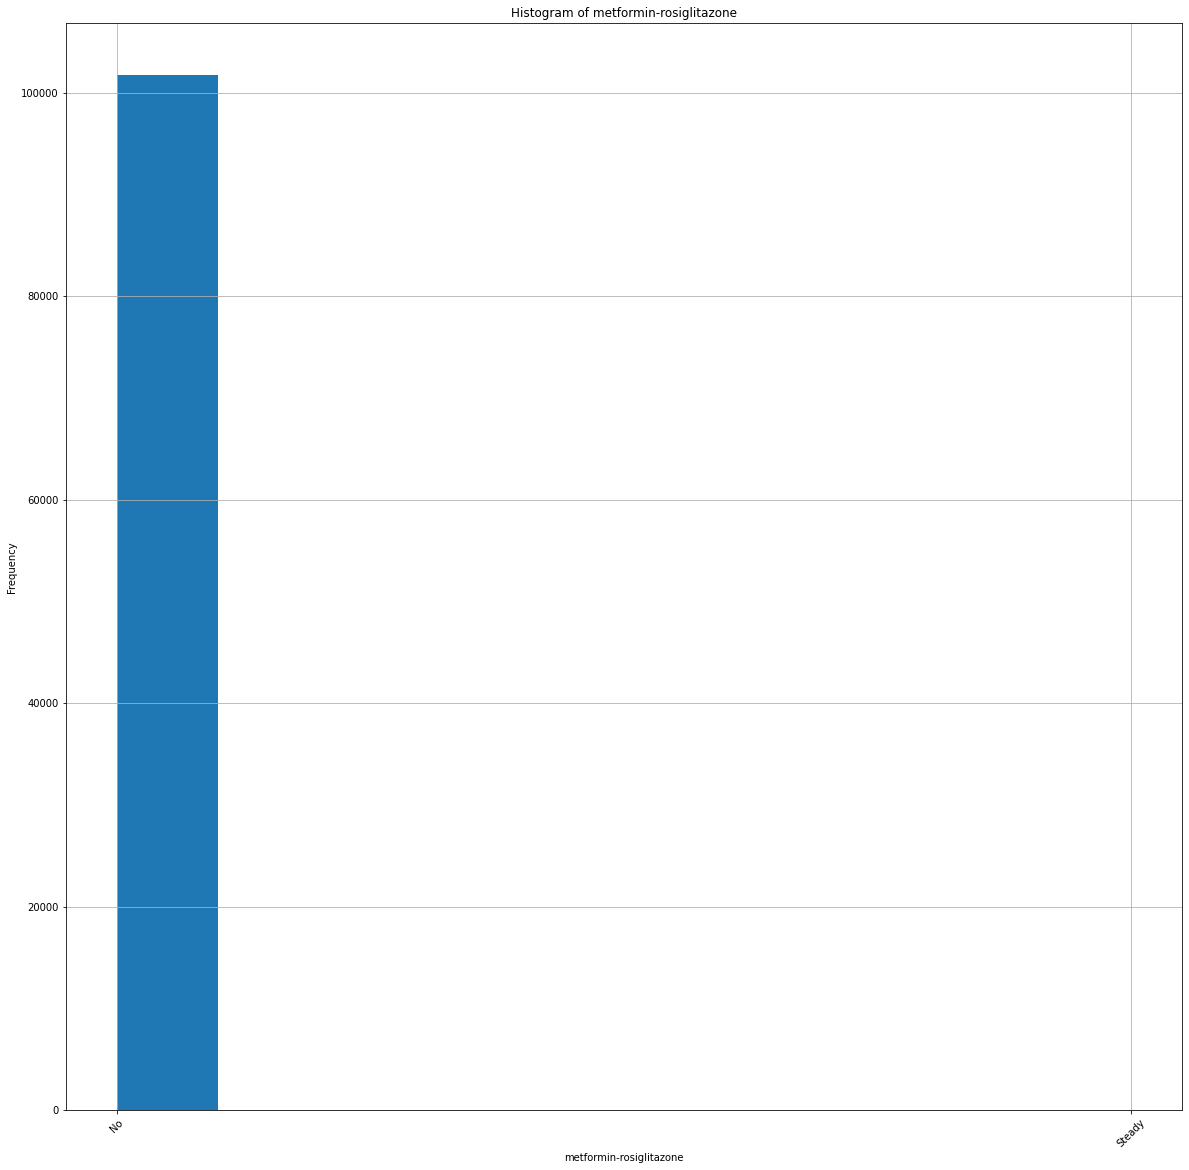

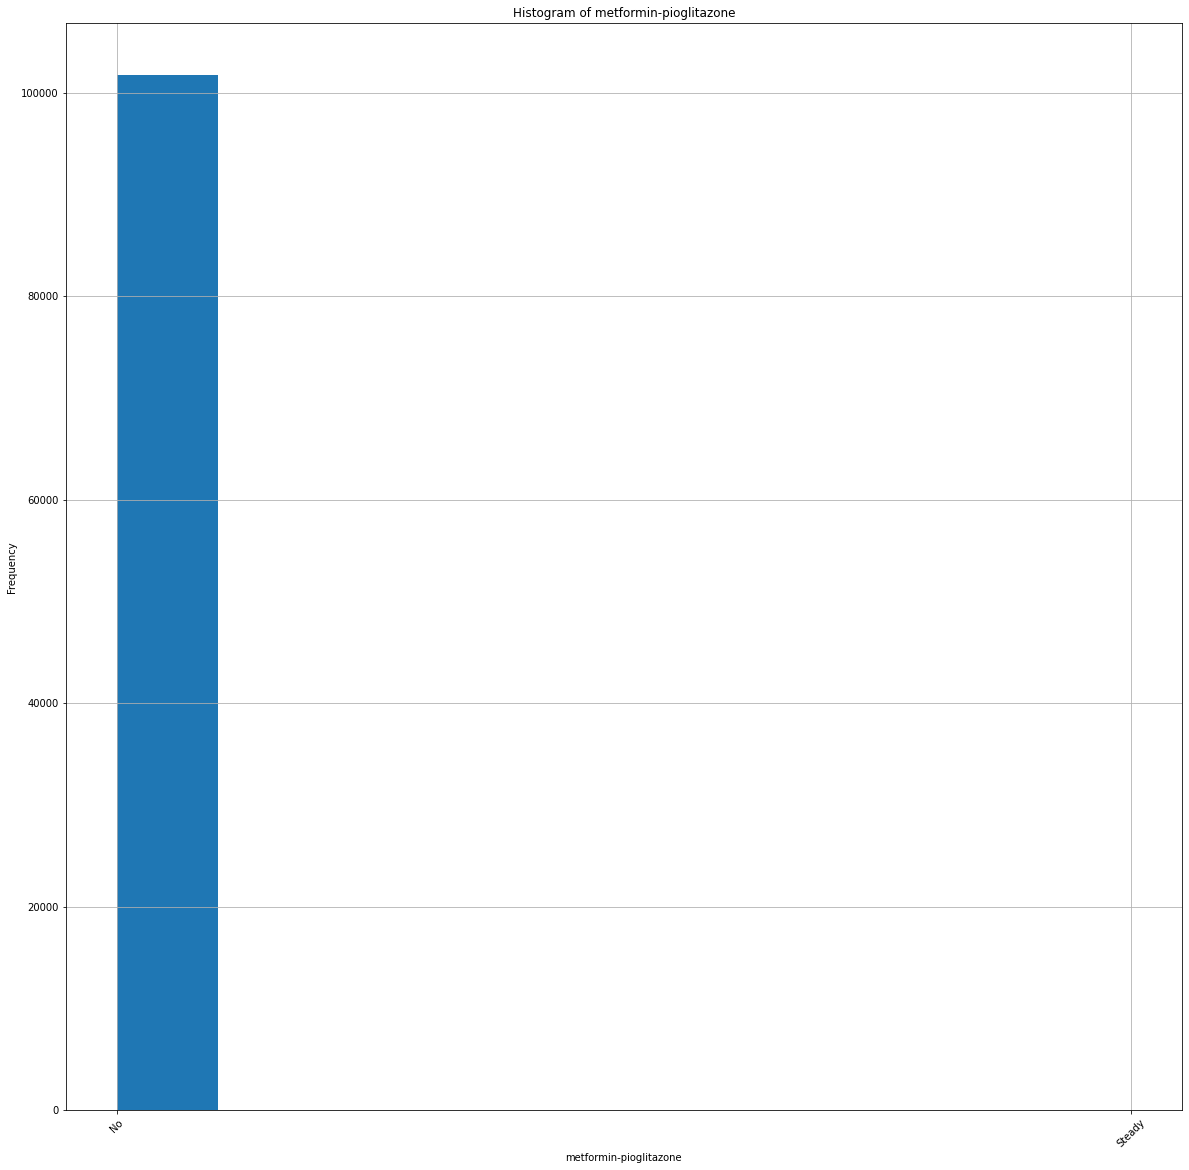

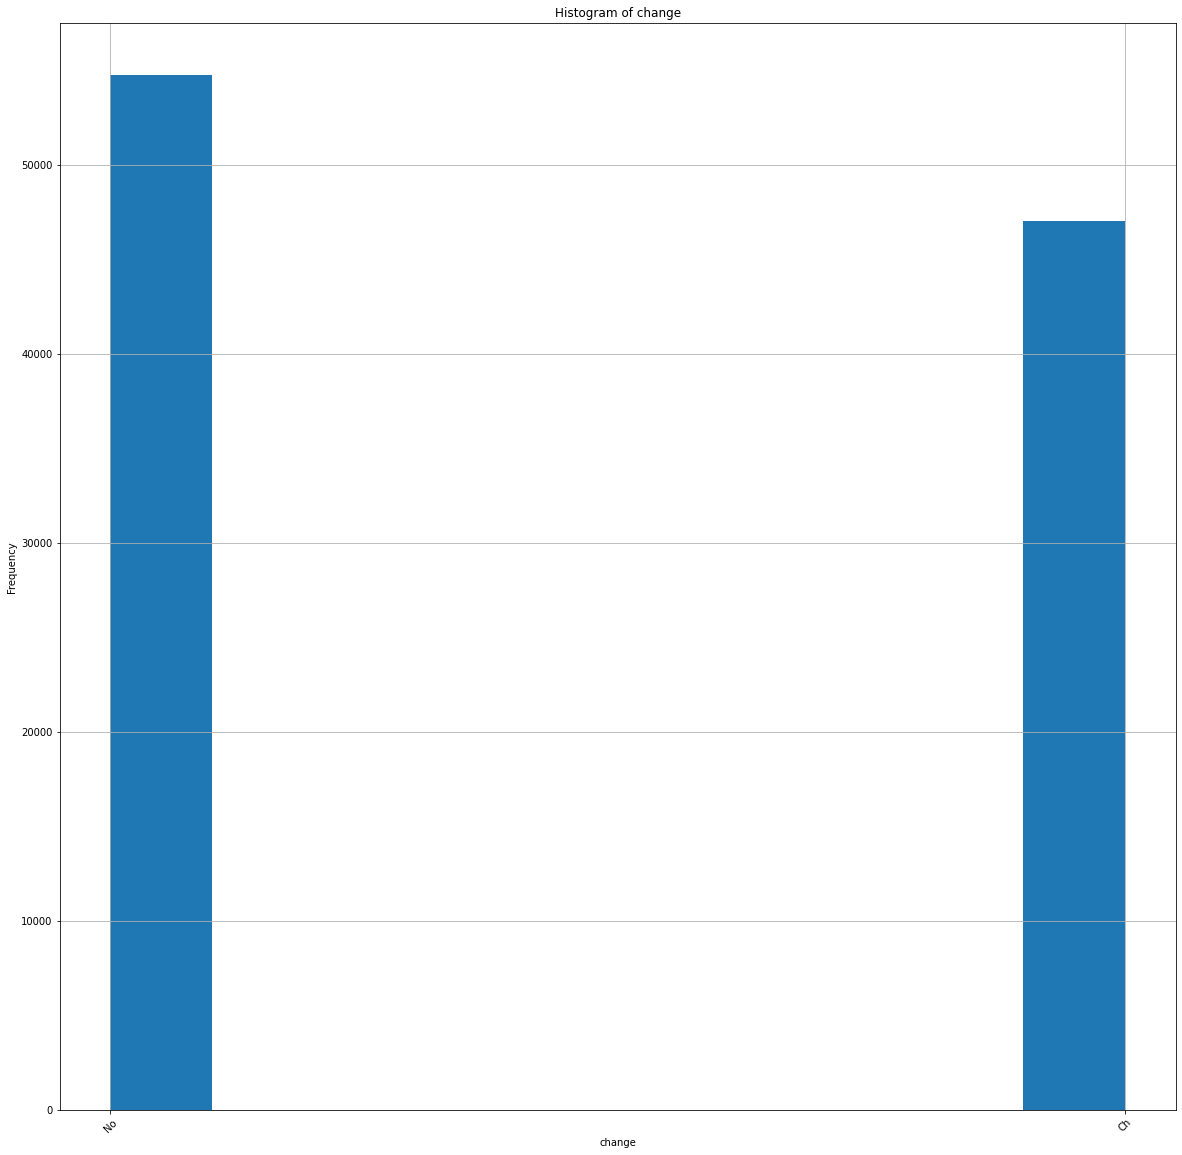

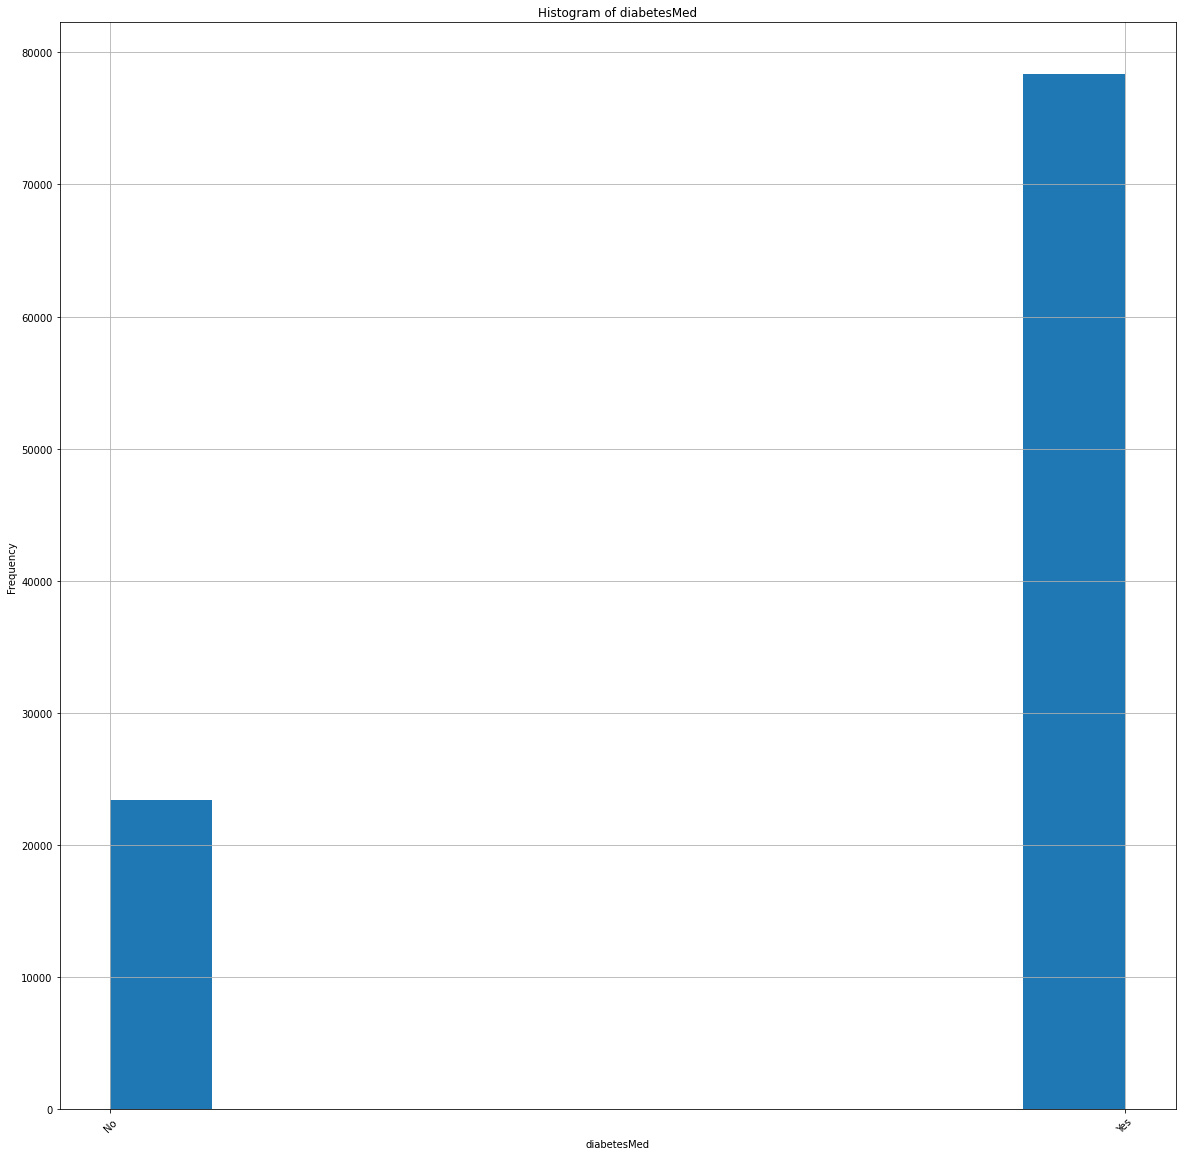

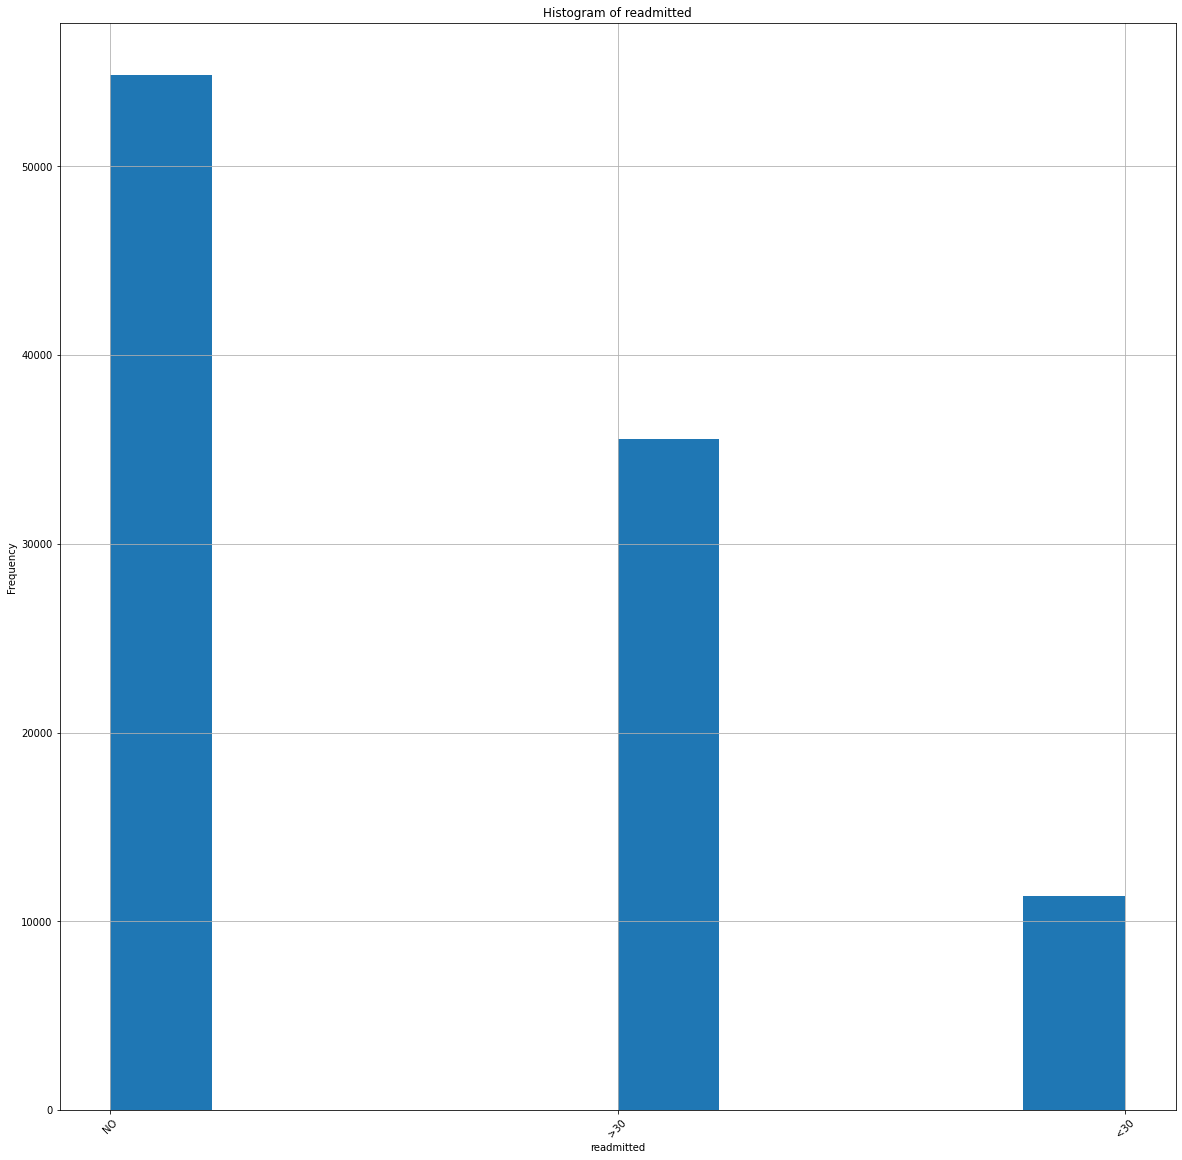

In [ ]:
for feature in values:
    plt.figure(figsize=(20, 20))
    plt.title('Histogram of {}'.format(feature))
    values[feature].hist()
    plt.ylabel('Frequency')
    plt.xlabel(feature)
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
values_copy = values.copy()
values_copy.drop(['patient_nbr'], axis=1, inplace=True)

In [ ]:
for feature in values_copy:
    values_copy[feature].replace({'?': np.nan}, inplace=True)

In [ ]:
values_copy.isna().sum()

encounter_id                    0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide     

In [ ]:
values_copy.drop(['weight', 'payer_code', 'medical_specialty'], axis=1, inplace=True)

In [ ]:
values_copy.dropna(inplace=True)

In [ ]:
for feature in values_copy:
  if values_copy[feature].dtype == 'object':
    oe = OrdinalEncoder()
    values_copy[[feature]] = oe.fit_transform(values_copy[[feature]])

In [ ]:
ids = values_copy['encounter_id']
values_copy = values_copy.drop(['encounter_id'], axis=1)

In [ ]:
values_copy

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,2.0,0.0,1.0,1,1,7,3,59,0,18,...,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.0,0.0,2.0,1,1,7,2,11,5,13,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
3,2.0,1.0,3.0,1,1,7,2,44,1,16,...,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
4,2.0,1.0,4.0,1,1,7,1,51,0,8,...,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
5,2.0,1.0,5.0,2,1,2,3,31,6,16,...,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,0.0,1.0,7.0,1,3,7,3,51,0,16,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
101762,0.0,0.0,8.0,1,4,5,5,33,3,18,...,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
101763,2.0,1.0,7.0,1,1,7,1,53,0,9,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
101764,2.0,0.0,8.0,2,3,7,10,45,2,21,...,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0


In [ ]:
nunique = values_copy.nunique()
cols_to_drop = nunique[nunique == 1].index
values_copy = values_copy.drop(cols_to_drop, axis=1)

In [ ]:
scaler = MinMaxScaler()
for feature in values_copy:
    values_copy[[feature]] = scaler.fit_transform(values_copy[[feature]])

In [ ]:
z_scores = np.abs(zscore(values_copy))
outliers_threshold = 3  
mask = (z_scores <= outliers_threshold).all(axis=1)
values_copy = values_copy[mask]
ids = ids[mask]

In [ ]:
ids

2             64410
3            500364
4             16680
5             35754
7             63768
            ...    
101759    443842778
101761    443847548
101762    443847782
101763    443854148
101765    443867222
Name: encounter_id, Length: 61335, dtype: int64

In [ ]:
values_copy

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
2,0.0,0.0,0.222222,0.000000,0.000000,0.250000,0.076923,0.076336,0.833333,0.1500,...,0.0,0.0,0.333333,0.333333,0.0,0.0,0.0,1.0,1.0,1.0
3,0.5,0.5,0.333333,0.000000,0.000000,0.250000,0.076923,0.328244,0.166667,0.1875,...,0.0,0.0,1.000000,0.333333,0.0,0.0,0.0,0.0,1.0,1.0
4,0.5,0.5,0.444444,0.000000,0.000000,0.250000,0.000000,0.381679,0.000000,0.0875,...,0.0,0.0,0.666667,0.333333,0.0,0.0,0.0,0.0,1.0,1.0
5,0.5,0.5,0.555556,0.142857,0.000000,0.041667,0.153846,0.229008,1.000000,0.1875,...,0.0,0.0,0.666667,0.333333,0.0,0.0,0.0,1.0,1.0,0.5
7,0.5,0.5,0.777778,0.000000,0.000000,0.250000,0.307692,0.549618,0.000000,0.1375,...,0.0,0.0,0.333333,0.333333,0.0,0.0,0.0,1.0,1.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101759,0.5,0.5,0.888889,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.1750,...,0.0,0.0,1.000000,0.333333,0.0,0.0,0.0,0.0,1.0,1.0
101761,0.0,0.5,0.777778,0.000000,0.074074,0.250000,0.153846,0.381679,0.000000,0.1875,...,0.0,0.0,0.000000,0.333333,0.0,0.0,0.0,0.0,1.0,0.5
101762,0.0,0.0,0.888889,0.000000,0.111111,0.166667,0.307692,0.244275,0.500000,0.2125,...,0.0,0.0,0.666667,0.333333,0.0,0.0,0.0,1.0,1.0,1.0
101763,0.5,0.5,0.777778,0.000000,0.000000,0.250000,0.000000,0.396947,0.000000,0.1000,...,0.0,0.0,0.000000,0.333333,0.0,0.0,0.0,0.0,1.0,1.0


In [ ]:
pca = PCA(n_components=2)
arr = pca.fit_transform(values_copy)
X = pd.DataFrame(data=arr)

In [ ]:
X

,0,1
0,-0.077694,0.333543
1,0.727273,-0.132537
2,0.700082,-0.223289
3,-0.007512,0.513120
4,-0.025141,0.439148
...,...,...
61330,0.715498,-0.112474
61331,0.652423,-0.349447
61332,-0.032742,0.449004
61333,0.604609,-0.436329


## B

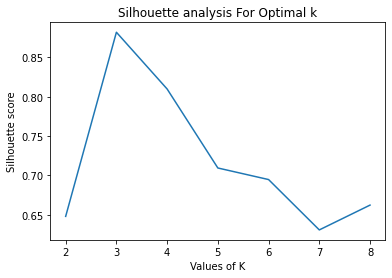

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(X)
 cluster_labels = kmeans.labels_
 silhouette_avg.append(silhouette_score(X, cluster_labels))

plt.plot(range_n_clusters, silhouette_avg)
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

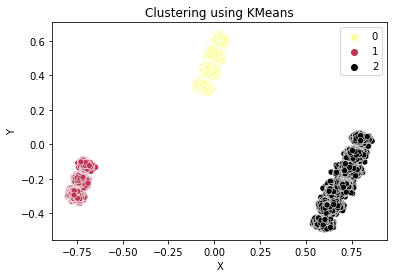

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
kmeans_labels = kmeans.labels_
plt.xlabel('X') 
plt.ylabel('Y') 
plt.title('Clustering using KMeans')
sns.scatterplot(x=X[0], y=X[1], hue=kmeans_labels, palette='inferno_r')
plt.show()

In [ ]:
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

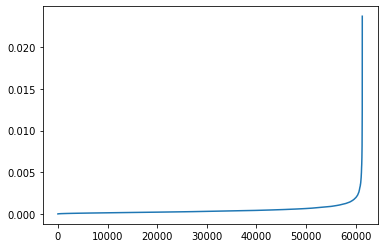

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [ ]:
eps_list=np.arange(start=0.005, stop=0.1, step=0.01)
min_sample_list=np.arange(start=2, stop=5, step=1)
 
silhouette_scores_data = pd.DataFrame(columns=['score', 'eps', 'min_sample'])
 
for eps_trial in eps_list:
  for min_sample_trial in min_sample_list:    
    db = DBSCAN(eps=eps_trial, min_samples=min_sample_trial)
    db.fit(X)
    cluster_labels = db.labels_
    sil_score = silhouette_score(X, cluster_labels)
    silhouette_scores_data = silhouette_scores_data.append({'score': sil_score,
                                                             'eps': eps_trial,
                                                              'min_sample': min_sample_trial
                                                              }, ignore_index=True)

In [ ]:
silhouette_scores_data

,score,eps,min_sample
0,0.263244,0.005,2.0
1,0.314300,0.005,3.0
2,0.393404,0.005,4.0
3,0.438578,0.015,2.0
4,0.438578,0.015,3.0
5,0.438578,0.015,4.0
6,0.761094,0.025,2.0
7,0.761094,0.025,3.0
8,0.761094,0.025,4.0
9,0.882074,0.035,2.0


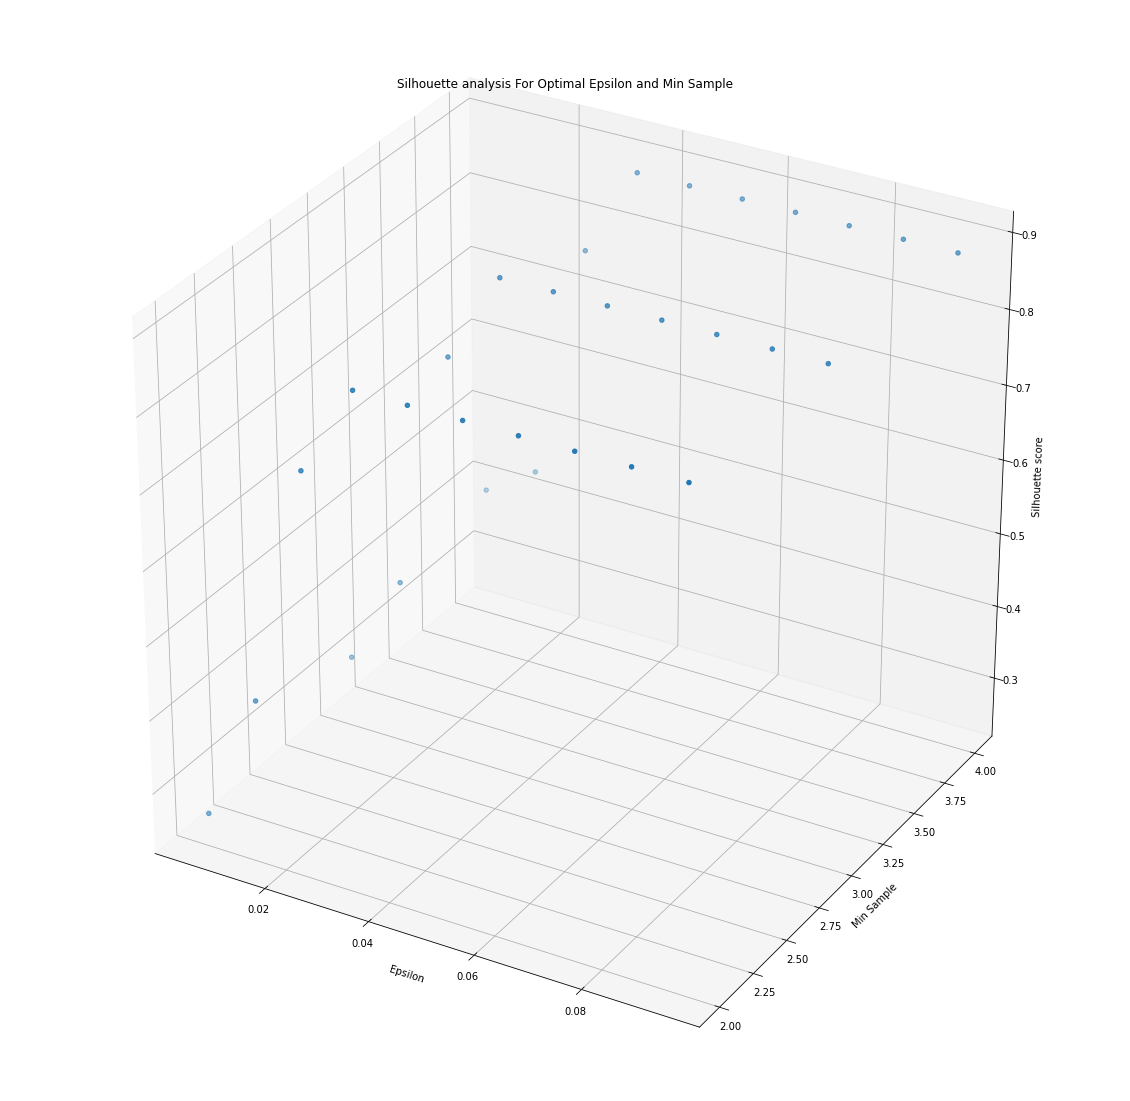

In [ ]:
fig = plt.figure(figsize=(20, 20)).gca(projection='3d')
fig.scatter(silhouette_scores_data['eps'], silhouette_scores_data['min_sample'], silhouette_scores_data['score'])
plt.title('Silhouette analysis For Optimal Epsilon and Min Sample')
fig.set_xlabel('Epsilon')
fig.set_ylabel('Min Sample')
fig.set_zlabel('Silhouette score')
plt.show()

In [ ]:
silhouette_scores_data.sort_values(by='score', ascending=False).head(1)

,score,eps,min_sample
15,0.882074,0.055,2.0


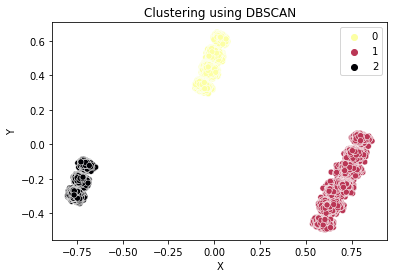

In [ ]:
dbscan = DBSCAN(eps=0.055, min_samples=2)
dbscan.fit(X)
dbscan_labels = dbscan.labels_
plt.xlabel('X') 
plt.ylabel('Y') 
plt.title('Clustering using DBSCAN')
sns.scatterplot(x=X[0], y=X[1], hue=dbscan_labels, palette='inferno_r')
plt.show()

In [ ]:
results = pd.DataFrame({
    'encounter_id': ids,
    'kmean_label': kmeans_labels,
    'dbscan_label': dbscan_labels
})

In [ ]:
results

,encounter_id,kmean_label,dbscan_label
2,64410,0,0
3,500364,2,1
4,16680,2,1
5,35754,0,0
7,63768,0,0
...,...,...,...
101759,443842778,2,1
101761,443847548,2,1
101762,443847782,0,0
101763,443854148,2,1


In [ ]:
results.to_csv('results.csv', index=False)